# F1 Exploratory Data Analysis

### To Do List


- Add intro and Learning information
- blank race times ... create a model to impute? region/convert time to time zone/region information ... or can we scrape the information from somewhere?

## Accessing the data

The first thing that needs doing, is to import the data that we want to use. For this project, the data is part of a [Kaggle Competition data set](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020). Download the data to your working directory before you begin. 

Before you start, take a look at [this](https://learn.datacamp.com/courses/importing-data-in-python-part-1) data camp course that goes into detail on importing data into python, and tick it off your E-Grade learning path in Degreed.

In the below code sections, we will define the URL of a dataset, and load that into a pandas dataframe. 


In [1]:
# Read the circuits CSV into a dataframe using Pandas

import pandas as pd

circuits = pd.read_csv("circuits.csv")

In [2]:
# Looking at  the data that has been imported.
print(circuits)

    circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul                         Istanbul Park   
..        ...          ...                                   ...   
72         73          BAK                     Baku City Circuit   
73         74        hanoi                  Hanoi Street Circuit   
74         75     portimao    Autódromo Internacional do Algarve   
75         76      mugello  Autodromo Internazionale del Mugello   
76         77       jeddah                 Jeddah Street Circuit   

        location       country       lat        lng  alt  \
0      Melbourne     Australia -37.84970  144.96800   10   
1   Kuala Lumpur      Malaysia   2.76083  101.73800   18   
2  

As there are a lot of datasets within this Kaggle competition, we'll look at a more succinct way of importing this data using a For Loop. 
- first create a series of the file names to be used ... link to pandas series information? 
- then we create a for loop (link to for loop learning) that uses 'global' to define the name of the variable being created in a dynamic way.

***add in more learning links for for loops etc***


In [3]:
# Define a series containing the names of the dataset

file_names = pd.Series(['circuits', 'constructor_results', 'constructor_standings', 'constructors', 'driver_standings', 'drivers', 'lap_times', 'pit_stops', 'qualifying', 'races', 'results', 'seasons', 'status'])
print(file_names)

0                  circuits
1       constructor_results
2     constructor_standings
3              constructors
4          driver_standings
5                   drivers
6                 lap_times
7                 pit_stops
8                qualifying
9                     races
10                  results
11                  seasons
12                   status
dtype: object


In [4]:
# Read CSV's into dataframes using Pandas

files = {}
for x in file_names: # for each of the files names in the 'file_names' list we created above 
    globals()[x] = pd.read_csv(x + '.csv') # create a variable with the name in 'file_names' and read in the csv calls 'filename.csv'

In [5]:
# Check that it's worked by typing the name of one of your expected files...
drivers

driverId          driverRef number code  forename     surname  \
0           1           hamilton     44  HAM     Lewis    Hamilton   
1           2           heidfeld     \N  HEI      Nick    Heidfeld   
2           3            rosberg      6  ROS      Nico     Rosberg   
3           4             alonso     14  ALO  Fernando      Alonso   
4           5         kovalainen     \N  KOV    Heikki  Kovalainen   
..        ...                ...    ...  ...       ...         ...   
848       850  pietro_fittipaldi     51  FIT    Pietro  Fittipaldi   
849       851             aitken     89  AIT      Jack      Aitken   
850       852            tsunoda     22  TSU      Yuki     Tsunoda   
851       853            mazepin      9  MAZ    Nikita     Mazepin   
852       854    mick_schumacher     47  MSC      Mick  Schumacher   

            dob nationality                                             url  
0    1985-01-07     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1    1977-05-10      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2    1985-06-27      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3    1981-07-29     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4    1981-10-19     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
..          ...         ...                                             ...  
848  1996-06-25   Brazilian  http://en.wikipedia.org/wiki/Pietro_Fittipaldi  
849  1995-09-23     British        http://en.wikipedia.org/wiki/Jack_Aitken  
850  2000-05-11    Japanese       http://en.wikipedia.org/wiki/Yuki_Tsunoda  
851  1999-03-02     Russian     http://en.wikipedia.org/wiki/Nikita_Mazepin  
852  1999-03-22      German    http://en.wikipedia.org/wiki/Mick_Schumacher  

[853 rows x 9 columns]

## Exploratory Data Analysis: data types and completeness

Now that we have accessed the data, it's time to start exploring it. 

In [6]:
file_names

0                  circuits
1       constructor_results
2     constructor_standings
3              constructors
4          driver_standings
5                   drivers
6                 lap_times
7                 pit_stops
8                qualifying
9                     races
10                  results
11                  seasons
12                   status
dtype: object

As we have a lot of files here, its key to understand which of our tables is a dimension table and which is a fact table. 

A very simple breakdown of this is:
- **Fact Table**: contains the numbers or key changing values. In this case, an example would be lap times, numbers in milliseconds for every lap at every race for every driver: 

In [7]:
lap_times

raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
495539    1055       853   60        19  1:27.116         87116
495540    1055       853   61        19  1:30.047         90047
495541    1055       853   62        19  1:27.399         87399
495542    1055       853   63        19  1:24.739         84739
495543    1055       853   64        19  1:24.471         84471

[495544 rows x 6 columns]

- **Dimension Table**: these tables have descriptive information held within them. In the case, a good example of this would be the drivers table, where we have a driverId that relates to a number of descriptive properties about that driver (e.g. name, date of birth, nationality, driver number etc.) 

In [8]:
drivers

driverId          driverRef number code  forename     surname  \
0           1           hamilton     44  HAM     Lewis    Hamilton   
1           2           heidfeld     \N  HEI      Nick    Heidfeld   
2           3            rosberg      6  ROS      Nico     Rosberg   
3           4             alonso     14  ALO  Fernando      Alonso   
4           5         kovalainen     \N  KOV    Heikki  Kovalainen   
..        ...                ...    ...  ...       ...         ...   
848       850  pietro_fittipaldi     51  FIT    Pietro  Fittipaldi   
849       851             aitken     89  AIT      Jack      Aitken   
850       852            tsunoda     22  TSU      Yuki     Tsunoda   
851       853            mazepin      9  MAZ    Nikita     Mazepin   
852       854    mick_schumacher     47  MSC      Mick  Schumacher   

            dob nationality                                             url  
0    1985-01-07     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1    1977-05-10      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2    1985-06-27      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3    1981-07-29     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4    1981-10-19     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
..          ...         ...                                             ...  
848  1996-06-25   Brazilian  http://en.wikipedia.org/wiki/Pietro_Fittipaldi  
849  1995-09-23     British        http://en.wikipedia.org/wiki/Jack_Aitken  
850  2000-05-11    Japanese       http://en.wikipedia.org/wiki/Yuki_Tsunoda  
851  1999-03-02     Russian     http://en.wikipedia.org/wiki/Nikita_Mazepin  
852  1999-03-22      German    http://en.wikipedia.org/wiki/Mick_Schumacher  

[853 rows x 9 columns]

These two tables can be linked, on their driverId, that way, we don't have to keep all the information about a driver in each of our fact tables - we can have a reference table that holds all of the information. 

Before we do that though, it's important to look at the data tables we're combining to ensure the data is complete and has been 'typed' correctly. 

In [9]:
file_names

0                  circuits
1       constructor_results
2     constructor_standings
3              constructors
4          driver_standings
5                   drivers
6                 lap_times
7                 pit_stops
8                qualifying
9                     races
10                  results
11                  seasons
12                   status
dtype: object

In [10]:
circuits

circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul                         Istanbul Park   
..        ...          ...                                   ...   
72         73          BAK                     Baku City Circuit   
73         74        hanoi                  Hanoi Street Circuit   
74         75     portimao    Autódromo Internacional do Algarve   
75         76      mugello  Autodromo Internazionale del Mugello   
76         77       jeddah                 Jeddah Street Circuit   

        location       country       lat        lng  alt  \
0      Melbourne     Australia -37.84970  144.96800   10   
1   Kuala Lumpur      Malaysia   2.76083  101.73800   18   
2         Sakhir       Bahrain  26.03250   50.51060    7   
3       Montmeló         Spain  41.57000    2.26111  109   
4       Istanbul        Turkey  40.95170   29.40500  130   
..           ...           ...       ...        ...  ...   
72          Baku    Azerbaijan  40.37250   49.85330   -7   
73         Hanoi       Vietnam  21.01660  105.76600    9   
74      Portimão      Portugal  37.22700   -8.62670  108   
75       Mugello         Italy  43.99750   11.37190  255   
76        Jeddah  Saudi Arabia  21.54330   39.17280   15   

                                                  url  
0   http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1   http://en.wikipedia.org/wiki/Sepang_Internatio...  
2   http://en.wikipedia.org/wiki/Bahrain_Internati...  
3   http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4          http://en.wikipedia.org/wiki/Istanbul_Park  
..                                                ...  
72     http://en.wikipedia.org/wiki/Baku_City_Circuit  
73  http://en.wikipedia.org/wiki/Hanoi_Street_Circuit  
74  http://en.wikipedia.org/wiki/Algarve_Internati...  
75       http://en.wikipedia.org/wiki/Mugello_Circuit  
76  http://en.wikipedia.org/wiki/Jeddah_Street_Cir...  

[77 rows x 9 columns]

In [11]:
circuits.dtypes

circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt             int64
url            object
dtype: object

In [12]:
circuits.isna().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

In [13]:
constructor_results

constructorResultsId  raceId  constructorId  points status
0                         1      18              1    14.0     \N
1                         2      18              2     8.0     \N
2                         3      18              3     9.0     \N
3                         4      18              4     5.0     \N
4                         5      18              5     2.0     \N
...                     ...     ...            ...     ...    ...
11765                 16265    1055            213     1.0     \N
11766                 16266    1055            117     0.0     \N
11767                 16267    1055             51     0.0     \N
11768                 16268    1055              3     0.0     \N
11769                 16269    1055            210     0.0     \N

[11770 rows x 5 columns]

In [14]:
# Checking what results are in the 'status' column
pd.unique(constructor_results['status'])

array(['\\N', 'D'], dtype=object)

In [15]:
# Trying to get an understanding of what a status or 'D' would mean. Assuming (based on other tables, that '\\N' is null)
constructor_results[constructor_results['status'] == 'D']

constructorResultsId  raceId  constructorId  points status
185                   186      36              1    14.0      D
195                   196      37              1    18.0      D
207                   208      38              1    12.0      D
218                   219      39              1    14.0      D
228                   229      40              1    18.0      D
239                   240      41              1    12.0      D
250                   251      42              1    18.0      D
262                   263      43              1     8.0      D
273                   274      44              1    14.0      D
283                   284      45              1    10.0      D
294                   295      46              1    15.0      D
306                   307      47              1    10.0      D
316                   317      48              1    18.0      D
328                   329      49              1    11.0      D
338                   339      50              1    10.0      D
350                   351      51              1     8.0      D
361                   362      52              1     8.0      D

In [16]:
# D only seems to apply to one constructor "1" - which is ... 
constructors[constructors['constructorId']==1]

constructorId constructorRef     name nationality  \
0              1        mclaren  McLaren     British   

                                    url  
0  http://en.wikipedia.org/wiki/McLaren

In [17]:
# For a small number of races (36 - 52) - which are ... 
races[(races['raceId'] >= 36) & (races['raceId']<=52)]

raceId  year  round  circuitId                      name        date  \
35      36  2007      1          1     Australian Grand Prix  2007-03-18   
36      37  2007      2          2      Malaysian Grand Prix  2007-04-08   
37      38  2007      3          3        Bahrain Grand Prix  2007-04-15   
38      39  2007      4          4        Spanish Grand Prix  2007-05-13   
39      40  2007      5          6         Monaco Grand Prix  2007-05-27   
40      41  2007      6          7       Canadian Grand Prix  2007-06-10   
41      42  2007      7         19  United States Grand Prix  2007-06-17   
42      43  2007      8          8         French Grand Prix  2007-07-01   
43      44  2007      9          9        British Grand Prix  2007-07-08   
44      45  2007     10         20       European Grand Prix  2007-07-22   
45      46  2007     11         11      Hungarian Grand Prix  2007-08-05   
46      47  2007     12          5        Turkish Grand Prix  2007-08-26   
47      48  2007     13         14        Italian Grand Prix  2007-09-09   
48      49  2007     14         13        Belgian Grand Prix  2007-09-16   
49      50  2007     15         16       Japanese Grand Prix  2007-09-30   
50      51  2007     16         17        Chinese Grand Prix  2007-10-07   
51      52  2007     17         18      Brazilian Grand Prix  2007-10-21   

        time                                                url  
35  03:00:00  http://en.wikipedia.org/wiki/2007_Australian_G...  
36  07:00:00  http://en.wikipedia.org/wiki/2007_Malaysian_Gr...  
37  11:30:00  http://en.wikipedia.org/wiki/2007_Bahrain_Gran...  
38  12:00:00  http://en.wikipedia.org/wiki/2007_Spanish_Gran...  
39  12:00:00  http://en.wikipedia.org/wiki/2007_Monaco_Grand...  
40  17:00:00  http://en.wikipedia.org/wiki/2007_Canadian_Gra...  
41  17:00:00  http://en.wikipedia.org/wiki/2007_United_State...  
42  12:00:00  http://en.wikipedia.org/wiki/2007_French_Grand...  
43  12:00:00  http://en.wikipedia.org/wiki/2007_British_Gran...  
44  12:00:00  http://en.wikipedia.org/wiki/2007_European_Gra...  
45  12:00:00  http://en.wikipedia.org/wiki/2007_Hungarian_Gr...  
46  12:00:00  http://en.wikipedia.org/wiki/2007_Turkish_Gran...  
47  12:00:00  http://en.wikipedia.org/wiki/2007_Italian_Gran...  
48  12:00:00  http://en.wikipedia.org/wiki/2007_Belgian_Gran...  
49  04:30:00  http://en.wikipedia.org/wiki/2007_Japanese_Gra...  
50  06:00:00  http://en.wikipedia.org/wiki/2007_Chinese_Gran...  
51  16:00:00  http://en.wikipedia.org/wiki/2007_Brazilian_Gr...

Having narrowed this 'D' down to McLaren in the 2007 season, we can see that it relates to a scandal within the McLaren F1 team, where they were found to be spying on Ferrari and were subsequently banned from the constructors championship: 

*Subsequently, the McLaren team were investigated by the FIA for being in possession of proprietary technical blueprints of Ferrari's car – the so-called "Spygate" controversy. At the first hearing, McLaren management consistently denied all knowledge, blaming a single "rogue engineer". However, in the final hearing, McLaren were found guilty and the team were excluded from the Constructors' Championship and fined $100 million.*

Therefore, D = Disqualified

We'll continue checking this table to ensure the data types and completeness are present. 

In [18]:
constructor_results.dtypes

constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

In [19]:
constructor_results.isna().sum()

constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

Now - technically, we know this to be false, as there are results listed as '\\N' which denote missing data, however, these are being missed by our 'isna' question. So we may need to look for the occurance of '\\N' as well when looking for completeness. 

We'll quickly run this check on both constructor_results and circuits ... 

In [20]:
(constructor_results == '\\N').sum()

constructorResultsId        0
raceId                      0
constructorId               0
points                      0
status                  11753
dtype: int64

In [21]:
len(constructor_results)

11770

In [22]:
(circuits == '\\N').sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

As we're doing the same commands for a number of tables, we'll create a function to simplify this.

In [23]:
# Function for looking at data types and completeness

# Define the function
def completeness(dataframe):
    print("Data Types:")
    print(dataframe.dtypes)
    print("\nNumber of values that are listed as NA")
    print(dataframe.isna().sum())
    print("\nNumber of values that are lised as \\N")
    print((dataframe == "\\N").sum())

In [24]:
constructor_standings

constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18              4     5.0         4   
4                           5      18              5     2.0         5   
...                       ...     ...            ...     ...       ...   
12531                   27728    1055            117     5.0         7   
12532                   27729    1055             51     0.0         8   
12533                   27730    1055            214    15.0         5   
12534                   27731    1055              3     0.0         9   
12535                   27732    1055            210     0.0        10   

      positionText  wins  
0                1     1  
1                3     0  
2                2     0  
3                4     0  
4                5     0  
...            ...   ...  
12531            7     0  
12532            8     0  
12533            5     0  
12534            9     0  
12535           10     0  

[12536 rows x 7 columns]

In [25]:
completeness(constructor_standings)

Data Types:
constructorStandingsId      int64
raceId                      int64
constructorId               int64
points                    float64
position                    int64
positionText               object
wins                        int64
dtype: object

Number of values that are listed as NA
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

Number of values that are lised as \N
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64


In [26]:
constructors

constructorId constructorRef            name nationality  \
0                1        mclaren         McLaren     British   
1                2     bmw_sauber      BMW Sauber      German   
2                3       williams        Williams     British   
3                4        renault         Renault      French   
4                5     toro_rosso      Toro Rosso     Italian   
..             ...            ...             ...         ...   
206            209          manor  Manor Marussia     British   
207            210           haas    Haas F1 Team    American   
208            211   racing_point    Racing Point     British   
209            213     alphatauri      AlphaTauri     Italian   
210            214         alpine  Alpine F1 Team      French   

                                                   url  
0                 http://en.wikipedia.org/wiki/McLaren  
1              http://en.wikipedia.org/wiki/BMW_Sauber  
2    http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3    http://en.wikipedia.org/wiki/Renault_in_Formul...  
4     http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
..                                                 ...  
206      http://en.wikipedia.org/wiki/Manor_Motorsport  
207          http://en.wikipedia.org/wiki/Haas_F1_Team  
208  http://en.wikipedia.org/wiki/Racing_Point_F1_Team  
209   http://en.wikipedia.org/wiki/Scuderia_AlphaTauri  
210        http://en.wikipedia.org/wiki/Alpine_F1_Team  

[211 rows x 5 columns]

In [27]:
completeness(constructors)

Data Types:
constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
dtype: object

Number of values that are listed as NA
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

Number of values that are lised as \N
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64


In [28]:
driver_standings

driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
33020              70346    1055       854     0.0        18           18   
33021              70347    1055       842     8.0        10           10   
33022              70348    1055       849     0.0        19           19   
33023              70349    1055         4     5.0        12           12   
33024              70350    1055       853     0.0        20           20   

       wins  
0         1  
1         0  
2         0  
3         0  
4         0  
...     ...  
33020     0  
33021     0  
33022     0  
33023     0  
33024     0  

[33025 rows x 7 columns]

In [29]:
completeness(driver_standings)

Data Types:
driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object

Number of values that are listed as NA
driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

Number of values that are lised as \N
driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64


In [30]:
drivers

driverId          driverRef number code  forename     surname  \
0           1           hamilton     44  HAM     Lewis    Hamilton   
1           2           heidfeld     \N  HEI      Nick    Heidfeld   
2           3            rosberg      6  ROS      Nico     Rosberg   
3           4             alonso     14  ALO  Fernando      Alonso   
4           5         kovalainen     \N  KOV    Heikki  Kovalainen   
..        ...                ...    ...  ...       ...         ...   
848       850  pietro_fittipaldi     51  FIT    Pietro  Fittipaldi   
849       851             aitken     89  AIT      Jack      Aitken   
850       852            tsunoda     22  TSU      Yuki     Tsunoda   
851       853            mazepin      9  MAZ    Nikita     Mazepin   
852       854    mick_schumacher     47  MSC      Mick  Schumacher   

            dob nationality                                             url  
0    1985-01-07     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1    1977-05-10      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2    1985-06-27      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3    1981-07-29     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4    1981-10-19     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
..          ...         ...                                             ...  
848  1996-06-25   Brazilian  http://en.wikipedia.org/wiki/Pietro_Fittipaldi  
849  1995-09-23     British        http://en.wikipedia.org/wiki/Jack_Aitken  
850  2000-05-11    Japanese       http://en.wikipedia.org/wiki/Yuki_Tsunoda  
851  1999-03-02     Russian     http://en.wikipedia.org/wiki/Nikita_Mazepin  
852  1999-03-22      German    http://en.wikipedia.org/wiki/Mick_Schumacher  

[853 rows x 9 columns]

In [31]:
completeness(drivers)

Data Types:
driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object

Number of values that are listed as NA
driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

Number of values that are lised as \N
driverId         0
driverRef        0
number         803
code           757
forename         0
surname          0
dob              0
nationality      0
url              0
dtype: int64


There are a few things that our 'completeness' function picks up in this table.

Firstly, with the datatypes we have 'number' being represented as an 'object' instead of 'int64'. We can see this is due to a large number of missing values in this field (803). This is due to the fact driver numbers were only introduced in 2014. Drivers who took part in and left F1 prior to 2014 would not have a number associated with them.  We could look to replace the '\N' value with blank to ensure we can have the correct data type for this field.

Secondly, the driver date of birth is not represented as a date. This will need to be addressed.

Finally, there are a large number of '\N' values in the driver 'code'. This again is a significant number of 'null' values which could relate to when these were brought in. Given the number of null values in this field, it makes sense to discount this field and use another field to identify the driver (e.g driverRef).

In [32]:
import numpy as np

# Replacing '\\N' values with null in driver number
drivers['number'] = drivers['number'].replace(['\\N'], np.nan)

# Changing the 'dob' to a date field
drivers['dob'] = pd.to_datetime(drivers['dob'])

In [33]:
completeness(drivers)

Data Types:
driverId                int64
driverRef              object
number                 object
code                   object
forename               object
surname                object
dob            datetime64[ns]
nationality            object
url                    object
dtype: object

Number of values that are listed as NA
driverId         0
driverRef        0
number         803
code             0
forename         0
surname          0
dob              0
nationality      0
url              0
dtype: int64

Number of values that are lised as \N
driverId         0
driverRef        0
number           0
code           757
forename         0
surname          0
dob              0
nationality      0
url              0
dtype: int64


In [34]:
lap_times

raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
495539    1055       853   60        19  1:27.116         87116
495540    1055       853   61        19  1:30.047         90047
495541    1055       853   62        19  1:27.399         87399
495542    1055       853   63        19  1:24.739         84739
495543    1055       853   64        19  1:24.471         84471

[495544 rows x 6 columns]

In [35]:
completeness(lap_times)

Data Types:
raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

Number of values that are listed as NA
raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

Number of values that are lised as \N
raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64


In [36]:
pit_stops

raceId  driverId  stop  lap      time duration  milliseconds
0        841       153     1    1  17:05:23   26.898         26898
1        841        30     1    1  17:05:52   25.021         25021
2        841        17     1   11  17:20:48   23.426         23426
3        841         4     1   12  17:22:34   23.251         23251
4        841        13     1   13  17:24:10   23.842         23842
...      ...       ...   ...  ...       ...      ...           ...
8218    1055       822     2   53  16:18:52   21.638         21638
8219    1055       815     2   57  16:24:55   21.345         21345
8220    1055       844     2   58  16:26:05   22.292         22292
8221    1055       830     2   60  16:28:18   21.592         21592
8222    1055         4     2   61  16:31:41   23.479         23479

[8223 rows x 7 columns]

In [37]:
completeness(pit_stops)

Data Types:
raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

Number of values that are listed as NA
raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

Number of values that are lised as \N
raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64


In [38]:
qualifying

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0             1      18         1              1      22         1  1:26.572   
1             2      18         9              2       4         2  1:26.103   
2             3      18         5              1      23         3  1:25.664   
3             4      18        13              6       2         4  1:25.994   
4             5      18         2              2       3         5  1:25.960   
...         ...     ...       ...            ...     ...       ...       ...   
8769       8810    1055       852            213      22        16  1:18.556   
8770       8811    1055         8             51       7        17  1:18.917   
8771       8812    1055       854            210      47        18  1:19.117   
8772       8813    1055       849              3       6        19  1:19.219   
8773       8814    1055       853            210       9        20  1:19.807   

            q2        q3  
0     1:25.187  1:26.714  
1     1:25.315  1:26.869  
2     1:25.452  1:27.079  
3     1:25.691  1:27.178  
4     1:25.518  1:27.236  
...        ...       ...  
8769        \N        \N  
8770        \N        \N  
8771        \N        \N  
8772        \N        \N  
8773        \N        \N  

[8774 rows x 9 columns]

In [39]:
completeness(qualifying)

Data Types:
qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

Number of values that are listed as NA
qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               134
q3               255
dtype: int64

Number of values that are lised as \N
qualifyId           0
raceId              0
driverId            0
constructorId       0
number              0
position            0
q1                128
q2               4067
q3               5729
dtype: int64


Again, the output of this investigation throws up a few things that might be worth looking at before continuing. 

Firstly, the qualifying times (q1, q2 and q3) are listed as objects - it might be worth converting these into milliseconds so they can be utilised more easily in future investigations.

Also, there are a number of '\N' values again in the q1, q2 and q3 times as well as blank. It would be worth understanding whether these represent different information, so we'll look into the 8 blank values of q1 to see if we can get an understanding of why these are blank, compared to the 128 listed as '\\N'

In [40]:
blank_q1 = qualifying[qualifying['q1'].isna()]
blank_q1

qualifyId  raceId  driverId  constructorId  number  position   q1   q2  \
7401       7424     983        20              6       5        20  NaN  NaN   
7615       7639     993       843              5      28        20  NaN  NaN   
7632       7656     994       830              9      33        20  NaN  NaN   
7653       7677     995       154            210       8        20  NaN  NaN   
8012       8036    1013         8             51       7        19  NaN  NaN   
8013       8037    1013       842              9      10        20  NaN  NaN   
8153       8177    1020        20              6       5        20  NaN  NaN   
8233       8257    1024       817              4       3        20  NaN  NaN   

       q3  
7401  NaN  
7615  NaN  
7632  NaN  
7653  NaN  
8012  NaN  
8013  NaN  
8153  NaN  
8233  NaN

In [41]:
race_id = blank_q1['raceId'].tolist()
races[races.raceId.isin(race_id)]

raceId  year  round  circuitId                   name        date  \
970      983  2017     15          2   Malaysian Grand Prix  2017-10-01   
980      993  2018      5          4     Spanish Grand Prix  2018-05-13   
981      994  2018      6          6      Monaco Grand Prix  2018-05-27   
982      995  2018      7          7    Canadian Grand Prix  2018-06-10   
1000    1013  2019      4         73  Azerbaijan Grand Prix  2019-04-28   
1007    1020  2019     11         10      German Grand Prix  2019-07-28   
1011    1024  2019     15         15   Singapore Grand Prix  2019-09-22   

          time                                                url  
970   07:00:00  https://en.wikipedia.org/wiki/2017_Malaysian_G...  
980   13:10:00  https://en.wikipedia.org/wiki/2018_Spanish_Gra...  
981   13:10:00  https://en.wikipedia.org/wiki/2018_Monaco_Gran...  
982   18:10:00  https://en.wikipedia.org/wiki/2018_Canadian_Gr...  
1000  12:10:00  https://en.wikipedia.org/wiki/2019_Azerbaijan_...  
1007  13:10:00  https://en.wikipedia.org/wiki/2019_German_Gran...  
1011  12:10:00  https://en.wikipedia.org/wiki/2019_Singapore_G...

In [42]:
driver_id = blank_q1['driverId'].tolist()
drivers[drivers.driverId.isin(driver_id)]

driverId        driverRef number code   forename     surname        dob  \
7           8        raikkonen      7  RAI       Kimi   Räikkönen 1979-10-17   
19         20           vettel      5  VET  Sebastian      Vettel 1987-07-03   
153       154         grosjean      8  GRO     Romain    Grosjean 1986-04-17   
452       842            gasly     10  GAS     Pierre       Gasly 1996-02-07   
816       817        ricciardo      3  RIC     Daniel   Ricciardo 1989-07-01   
829       830   max_verstappen     33  VER        Max  Verstappen 1997-09-30   
841       843  brendon_hartley     28  HAR    Brendon     Hartley 1989-11-10   

       nationality                                                url  
7          Finnish  http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...  
19          German      http://en.wikipedia.org/wiki/Sebastian_Vettel  
153         French       http://en.wikipedia.org/wiki/Romain_Grosjean  
452         French          http://en.wikipedia.org/wiki/Pierre_Gasly  
816     Australian      http://en.wikipedia.org/wiki/Daniel_Ricciardo  
829          Dutch        http://en.wikipedia.org/wiki/Max_Verstappen  
841  New Zealander       http://en.wikipedia.org/wiki/Brendon_Hartley

So we have blank results for:
- Vettel at the 2017 Malaysian GP -- no time set, replacement engine did not run properly
- Hartley at the 2018 Spanish GP -- no time set, reason not given
- Verstappen at the 2018 Monaco GP -- no time set, mechanics unable to repair the car after crash in final practice
- Grosjean at the 2018 Canadian GP -- no time set, major engine failure as left pit lane in Q1
- Raikkonen at the 2019 Azerbaijan GP -- excluded from qualifying as his car failed a front wing deflection test
- Gasly at the 2019 Azerbaijan GP -- excluded from qualifying for exceeding the low fuel limit 
- Vettel at the 2019 German GP -- failed to set a time within the 107% requirement.
- Ricciardo at the 2019 Singapore GP -- disqualified for exceeding the power limit allowed.

No we'll take a look at a few of the '\\N' values to see if there is a notable difference in what information they're representing.

In [43]:
N_q1 = qualifying[qualifying['q1'] == '\\N']
N_q1

qualifyId  raceId  driverId  constructorId  number  position  q1  q2  q3
147         148      24        20              5      15        20  \N  \N  \N
307         308      32        21             10      21        20  \N  \N  \N
455         456      39        26              5      19        22  \N  \N  \N
477         478      40        27             12      21        22  \N  \N  \N
763         764      53         8              1       3        22  \N  \N  \N
...         ...     ...       ...            ...     ...       ...  ..  ..  ..
8272       8296    1026       825            210      20        19  \N  \N  \N
8273       8297    1026         9              3      88        20  \N  \N  \N
8333       8357    1029       832              1      55        20  \N  \N  \N
8393       8417    1032       154            210       8        20  \N  \N  \N
8733       8774    1053       852            213      22        20  \N  \N  \N

[128 rows x 9 columns]

In [44]:
print(races[races['raceId']==1029])
print(drivers[drivers['driverId']==832])

      raceId  year  round  circuitId                  name        date  \
1016    1029  2019     20         18  Brazilian Grand Prix  2019-11-17   

          time                                                url  
1016  17:10:00  https://en.wikipedia.org/wiki/2019_Brazilian_G...  
     driverId driverRef number code forename surname        dob nationality  \
831       832     sainz     55  SAI   Carlos   Sainz 1994-09-01     Spanish   

                                               url  
831  http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.  


So we have '\\N' values for: 
- Vettel at the 2008 Canadian GP
- Fisichella at the 2008 Singapore GP -- listed as DNF for Q1, 2 laps completed
- Speed at the 2007 Spanish GP -- listed as DNF for Q1, 2 laps completed
- Albers at the 2007 Monaco GP -- listed as DNF for Q1, 3 laps completed
- Raikkonen at the 2006 Bahrain GP -- listed as DNF for Q1, 2 laps completed
- Magnussen at the 2019 Japanese GP -- listed as DNF for Q1, 2 laps completed
- Kubica at the 2019 Japanese GP -- listed as DNS for Q1, 1 lap completed
- Sainz at the 2019 Brazilian GP -- listed as DNF for Q1, 2 laps completed

So the difference seems to be in how this data is represented on formula1.com - for those with blank values these are not listed within the qualifying information, instead listed as a footnote stating 'failed to meet the 107% Q1 requirement'. 

So there does seem to be a difference between these, however, the information seems to remain the same (i.e. no time set). So we will replace the '\\N' values with NaN to represent these as the same. 

In [45]:
# Replacing '\\N' values with null in qualifying times
qualifying['q1'] = qualifying['q1'].replace(['\\N'], np.nan)
qualifying['q2'] = qualifying['q2'].replace(['\\N'], np.nan)
qualifying['q3'] = qualifying['q3'].replace(['\\N'], np.nan)

completeness(qualifying)

Data Types:
qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

Number of values that are listed as NA
qualifyId           0
raceId              0
driverId            0
constructorId       0
number              0
position            0
q1                136
q2               4201
q3               5984
dtype: int64

Number of values that are lised as \N
qualifyId        0
raceId           0
driverId         0
constructorId    0
number           0
position         0
q1               0
q2               0
q3               0
dtype: int64


In [46]:
# Making sure the qualifying times are in the correct format i.e. minutes, seconds and milliseconds.
qualifying['q1'] = pd.to_datetime(qualifying['q1'], format='%M:%S.%f')
qualifying['q2'] = pd.to_datetime(qualifying['q2'], format='%M:%S.%f')
qualifying['q3'] = pd.to_datetime(qualifying['q3'], format='%M:%S.%f')


In [47]:
# Converting the qualifying times to milliseconds (minutes * 60,000 + seconds * 1000 + microseconds / 1000) 
qualifying['q1_ms'] = ((pd.DatetimeIndex(qualifying['q1']).minute)*60000)+((pd.DatetimeIndex(qualifying['q1']).second)*1000)+((pd.DatetimeIndex(qualifying['q1']).microsecond)/1000)
qualifying['q2_ms'] = ((pd.DatetimeIndex(qualifying['q2']).minute)*60000)+((pd.DatetimeIndex(qualifying['q2']).second)*1000)+((pd.DatetimeIndex(qualifying['q2']).microsecond)/1000)
qualifying['q3_ms'] = ((pd.DatetimeIndex(qualifying['q3']).minute)*60000)+((pd.DatetimeIndex(qualifying['q3']).second)*1000)+((pd.DatetimeIndex(qualifying['q3']).microsecond)/1000)

qualifying

qualifyId  raceId  driverId  constructorId  number  position  \
0             1      18         1              1      22         1   
1             2      18         9              2       4         2   
2             3      18         5              1      23         3   
3             4      18        13              6       2         4   
4             5      18         2              2       3         5   
...         ...     ...       ...            ...     ...       ...   
8769       8810    1055       852            213      22        16   
8770       8811    1055         8             51       7        17   
8771       8812    1055       854            210      47        18   
8772       8813    1055       849              3       6        19   
8773       8814    1055       853            210       9        20   

                          q1                      q2                      q3  \
0    1900-01-01 00:01:26.572 1900-01-01 00:01:25.187 1900-01-01 00:01:26.714   
1    1900-01-01 00:01:26.103 1900-01-01 00:01:25.315 1900-01-01 00:01:26.869   
2    1900-01-01 00:01:25.664 1900-01-01 00:01:25.452 1900-01-01 00:01:27.079   
3    1900-01-01 00:01:25.994 1900-01-01 00:01:25.691 1900-01-01 00:01:27.178   
4    1900-01-01 00:01:25.960 1900-01-01 00:01:25.518 1900-01-01 00:01:27.236   
...                      ...                     ...                     ...   
8769 1900-01-01 00:01:18.556                     NaT                     NaT   
8770 1900-01-01 00:01:18.917                     NaT                     NaT   
8771 1900-01-01 00:01:19.117                     NaT                     NaT   
8772 1900-01-01 00:01:19.219                     NaT                     NaT   
8773 1900-01-01 00:01:19.807                     NaT                     NaT   

        q1_ms    q2_ms    q3_ms  
0     86572.0  85187.0  86714.0  
1     86103.0  85315.0  86869.0  
2     85664.0  85452.0  87079.0  
3     85994.0  85691.0  87178.0  
4     85960.0  85518.0  87236.0  
...       ...      ...      ...  
8769  78556.0      NaN      NaN  
8770  78917.0      NaN      NaN  
8771  79117.0      NaN      NaN  
8772  79219.0      NaN      NaN  
8773  79807.0      NaN      NaN  

[8774 rows x 12 columns]

In [48]:
completeness(qualifying)

Data Types:
qualifyId                 int64
raceId                    int64
driverId                  int64
constructorId             int64
number                    int64
position                  int64
q1               datetime64[ns]
q2               datetime64[ns]
q3               datetime64[ns]
q1_ms                   float64
q2_ms                   float64
q3_ms                   float64
dtype: object

Number of values that are listed as NA
qualifyId           0
raceId              0
driverId            0
constructorId       0
number              0
position            0
q1                136
q2               4201
q3               5984
q1_ms             136
q2_ms            4201
q3_ms            5984
dtype: int64

Number of values that are lised as \N
qualifyId        0
raceId           0
driverId         0
constructorId    0
number           0
position         0
q1               0
q2               0
q3               0
q1_ms            0
q2_ms            0
q3_ms            0
dtype:

In [49]:
races

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1053    1069  2021     18         69  United States Grand Prix  2021-10-24   
1054    1070  2021     19         32    Mexico City Grand Prix  2021-10-31   
1055    1071  2021     20         18      Brazilian Grand Prix  2021-11-07   
1056    1072  2021     22         77  Saudi Arabian Grand Prix  2021-12-05   
1057    1073  2021     23         24      Abu Dhabi Grand Prix  2021-12-12   

          time                                                url  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...  
...        ...                                                ...  
1053  19:00:00  http://en.wikipedia.org/wiki/2021_United_State...  
1054  19:00:00  http://en.wikipedia.org/wiki/2021_Mexican_Gran...  
1055  17:00:00  http://en.wikipedia.org/wiki/2021_Brazilian_Gr...  
1056  16:00:00  http://en.wikipedia.org/wiki/2021_Saudi_Arabia...  
1057  13:00:00  http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...  

[1058 rows x 8 columns]

In [50]:
completeness(races)

Data Types:
raceId        int64
year          int64
round         int64
circuitId     int64
name         object
date         object
time         object
url          object
dtype: object

Number of values that are listed as NA
raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64

Number of values that are lised as \N
raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time         731
url            0
dtype: int64


In [51]:
# Changing the data type of the date column to a date field. 
races['date'] = pd.to_datetime(races['date'])

# Replacing '\\N' values for race time with null values
races['time'] = races['time'].replace(['\\N'], np.nan)

# Adding a field that reflects the time of the race as an integer (e.g. 2:30 pm would read 14.5)
races['time_value'] = pd.DatetimeIndex(races['time']).hour + ((pd.DatetimeIndex(races['time']).minute) / 60)

completeness(races)

Data Types:
raceId                 int64
year                   int64
round                  int64
circuitId              int64
name                  object
date          datetime64[ns]
time                  object
url                   object
time_value           float64
dtype: object

Number of values that are listed as NA
raceId          0
year            0
round           0
circuitId       0
name            0
date            0
time          731
url             0
time_value    731
dtype: int64

Number of values that are lised as \N
raceId        0
year          0
round         0
circuitId     0
name          0
date          0
time          0
url           0
time_value    0
dtype: int64


In [52]:
races

raceId  year  round  circuitId                      name       date  \
0          1  2009      1          1     Australian Grand Prix 2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix 2009-04-05   
2          3  2009      3         17        Chinese Grand Prix 2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix 2009-04-26   
4          5  2009      5          4        Spanish Grand Prix 2009-05-10   
...      ...   ...    ...        ...                       ...        ...   
1053    1069  2021     18         69  United States Grand Prix 2021-10-24   
1054    1070  2021     19         32    Mexico City Grand Prix 2021-10-31   
1055    1071  2021     20         18      Brazilian Grand Prix 2021-11-07   
1056    1072  2021     22         77  Saudi Arabian Grand Prix 2021-12-05   
1057    1073  2021     23         24      Abu Dhabi Grand Prix 2021-12-12   

          time                                                url  time_value  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...         6.0  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...         9.0  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...         7.0  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...        12.0  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...        12.0  
...        ...                                                ...         ...  
1053  19:00:00  http://en.wikipedia.org/wiki/2021_United_State...        19.0  
1054  19:00:00  http://en.wikipedia.org/wiki/2021_Mexican_Gran...        19.0  
1055  17:00:00  http://en.wikipedia.org/wiki/2021_Brazilian_Gr...        17.0  
1056  16:00:00  http://en.wikipedia.org/wiki/2021_Saudi_Arabia...        16.0  
1057  13:00:00  http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...        13.0  

[1058 rows x 9 columns]

In [53]:
results

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25035     25041    1055       849              3      6    19       16   
25036     25042    1055         4            214     14    10       17   
25037     25043    1055       854            210     47    18       18   
25038     25044    1055       853            210      9    20       19   
25039     25045    1055       852            213     22    16       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1    10.0    58  1:34:50.616      5690616   
1                2              2     8.0    58       +5.478      5696094   
2                3              3     6.0    58       +8.163      5698779   
3                4              4     5.0    58      +17.181      5707797   
4                5              5     4.0    58      +18.014      5708630   
...            ...            ...     ...   ...          ...          ...   
25035           16             16     0.0    65           \N           \N   
25036           17             17     0.0    65           \N           \N   
25037           18             18     0.0    64           \N           \N   
25038           19             19     0.0    64           \N           \N   
25039            R             20     0.0     6           \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0             39    2       1:27.452         218.300         1  
1             41    3       1:27.739         217.586         1  
2             41    5       1:28.090         216.719         1  
3             58    7       1:28.603         215.464         1  
4             43    1       1:27.418         218.385         1  
...          ...  ...            ...             ...       ...  
25035         57   16       1:22.905         203.003        11  
25036         63    6       1:21.182         207.311        11  
25037         54   12       1:22.637         203.661        12  
25038         45   19       1:24.040         200.261        12  
25039          5   20       1:24.825         198.408        10  

[25040 rows x 18 columns]

In [54]:
completeness(results)


Data Types:
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

Number of values that are listed as NA
resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

Number of values that are lised as \N
resultId          

In [55]:
len(results)

25040

Quite a lot can be seen in this dataframe.

- **number** is listed as an **object** as we have **6** entries which are listed as '\\N'
- **position** is listed as an **object** as we have **10742** entries which are listed as '\\N' (note - this is ~43% of the data!)
- **milliseconds** is listed as an **object** as we have **18406** entries which are listed as '\\N' (note - this is ~74% of the data!)
- there is a lot of **missing data** in time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed

Also, there are a number of fields that are not entirely straight forward to intepret.
- position vs positionOrder -- do we expect these to be the same? 
- fastestLap -- is this the fastest lap of the race, or fastest lap of each driver for that race.
- does this dataframe show information for each lap of each race for each driver? 
- what does rank relate to? 
- we have fastestLapTime and fastestLapSpeed for some of the records - could we determine track length for each circuit/race to be used in future calculations (e.g. normalising lap times to an average speed of the lap.

We'll work our way through these questions and observations ... 

In [56]:
results[results['number']=='\\N']

resultId  raceId  driverId  constructorId number  grid position  \
17715     17716     732       459             66     \N     0       \N   
17716     17717     732       462             95     \N     0       \N   
17717     17718     732       446            172     \N     0       \N   
17718     17719     732       437            170     \N     0       \N   
17939     17940     741       485            172     \N     0       \N   
20319     20322     728       305             26     \N     0       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
17715            W             19     0.0     0   \N           \N         \N   
17716            W             20     0.0     0   \N           \N         \N   
17717            W             21     0.0     0   \N           \N         \N   
17718            W             22     0.0     0   \N           \N         \N   
17939            W             28     0.0     0   \N           \N         \N   
20319            W             23     0.0     0   \N           \N         \N   

      rank fastestLapTime fastestLapSpeed  statusId  
17715   \N             \N              \N        54  
17716   \N             \N              \N        54  
17717   \N             \N              \N        54  
17718   \N             \N              \N        54  
17939   \N             \N              \N        54  
20319   \N             \N              \N        54

In [57]:
# All these relate to a statusId of '54' which is ... 
status[status['statusId']==54]

statusId    status
53        54  Withdrew

In [58]:
results[results['statusId']==54]

resultId  raceId  driverId  constructorId number  grid position  \
1300       1301      79        15              7     16     1       \N   
1301       1302      79         8              1      9     2       \N   
1302       1303      79        18             16      3     3       \N   
1303       1304      79        21              4      6     4       \N   
1304       1305      79         4              4      5     6       \N   
...         ...     ...       ...            ...    ...   ...      ...   
22551     22555     926       822              3     77     0       \N   
23241     23246     962       154            210      8    20       \N   
23351     23356     967       154            210      8     7       \N   
24559     24565    1027       846              1      4     8       \N   
24896     24902    1044       825            210     20    13       17   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
1300             W              7     0.0     0   \N           \N         \N   
1301             W              8     0.0     0   \N           \N         \N   
1302             W              9     0.0     0   \N           \N         \N   
1303             W             10     0.0     0   \N           \N         \N   
1304             W             11     0.0     0   \N           \N         \N   
...            ...            ...     ...   ...  ...          ...        ...   
22551            W             18     0.0     0   \N           \N         \N   
23241            W             22     0.0     0   \N           \N         \N   
23351            W             22     0.0     0   \N           \N         \N   
24559            R             20     0.0    48   \N           \N         46   
24896           17             17     0.0    55   \N           \N         45   

      rank fastestLapTime fastestLapSpeed  statusId  
1300    \N             \N              \N        54  
1301    \N             \N              \N        54  
1302    \N             \N              \N        54  
1303    \N             \N              \N        54  
1304    \N             \N              \N        54  
...    ...            ...             ...       ...  
22551    0             \N              \N        54  
23241    0             \N              \N        54  
23351    0             \N              \N        54  
24559   19       1:21.643         189.782        54  
24896   15       1:40.948         190.363        54  

[243 rows x 18 columns]

In [59]:
# Still not sure what number relates to
# As not all 'withdrew' have a blank number, we'll take a look at a particular race where a number withdrew but still have numbers.

races[races['raceId']==79]

raceId  year  round  circuitId                      name       date  \
78      79  2005      9         19  United States Grand Prix 2005-06-19   

        time                                                url  time_value  
78  14:00:00  http://en.wikipedia.org/wiki/2005_United_State...        14.0

In [60]:
results[results['raceId']==79]

resultId  raceId  driverId  constructorId number  grid position  \
1294      1295      79        30              6      1     5        1   
1295      1296      79        22              6      2     7        2   
1296      1297      79        33             17     18    17        3   
1297      1298      79        39             17     19    19        4   
1298      1299      79        27             18     21    18        5   
1299      1300      79        40             18     20    20        6   
1300      1301      79        15              7     16     1       \N   
1301      1302      79         8              1      9     2       \N   
1302      1303      79        18             16      3     3       \N   
1303      1304      79        21              4      6     4       \N   
1304      1305      79         4              4      5     6       \N   
1305      1306      79        11             16      4     8       \N   
1306      1307      79        17              3      7     9       \N   
1307      1308      79        13             15     12    10       \N   
1308      1309      79        31              1     10    11       \N   
1309      1310      79        35             15     11    12       \N   
1310      1311      79        41              7     17    13       \N   
1311      1312      79        32              9     15    14       \N   
1312      1313      79         2              3      8    15       \N   
1313      1314      79        14              9     14    16       \N   

     positionText  positionOrder  points  laps         time milliseconds  \
1294            1              1    10.0    73  1:29:43.181      5383181   
1295            2              2     8.0    73         +1.5      5384681   
1296            3              3     6.0    72           \N           \N   
1297            4              4     5.0    72           \N           \N   
1298            5              5     4.0    71           \N           \N   
1299            6              6     3.0    71           \N           \N   
1300            W              7     0.0     0           \N           \N   
1301            W              8     0.0     0           \N           \N   
1302            W              9     0.0     0           \N           \N   
1303            W             10     0.0     0           \N           \N   
1304            W             11     0.0     0           \N           \N   
1305            W             12     0.0     0           \N           \N   
1306            W             13     0.0     0           \N           \N   
1307            W             14     0.0     0           \N           \N   
1308            W             15     0.0     0           \N           \N   
1309            W             16     0.0     0           \N           \N   
1310            W             17     0.0     0           \N           \N   
1311            W             18     0.0     0           \N           \N   
1312            W             19     0.0     0           \N           \N   
1313            W             20     0.0     0           \N           \N   

     fastestLap rank fastestLapTime fastestLapSpeed  statusId  
1294         48    1       1:11.497         211.074         1  
1295         48    2       1:11.649         210.626         1  
1296         44    3       1:13.237         206.059        11  
1297         65    4       1:13.370         205.686        11  
1298          2    5       1:13.907         204.191        12  
1299         43    6       1:14.490         202.593        12  
1300         \N   \N             \N              \N        54  
1301         \N   \N             \N              \N        54  
1302         \N   \N             \N              \N        54  
1303         \N   \N             \N              \N        54  
1304         \N   \N             \N              \N        54  
1305         \N   \N             \N              \N        54  
1306         \N   \N             \N        

During the 2005 US GP all seven Michelin teams withdrew from the race after the formation lap due to fears over tyre safety. Leaving only 6 drivers in the race. 

This actually helps with a lot of questions, or at least gives us some ideas.

- Could number may relate to driver number, which changed year on year up until 2014 where drivers picked a single number. The driver numbers related to the previous seasons constructors performance. So we can look into this in further detail to help understand the 6 cars without a number.
- position and positionOrder are not the same, as positionOrder appears to still attribute a value to those who have withdrawn from the race. This could suggest that positionOrder takes into account other factors. However, rank and position seem to give similar information in this sub section of the data - worth investigating further. 
- It looks like there is a fastest lap for each driver who took part in the race, so this seems to relate to the driver and race. 

So, taking raceId 79 we'll look into number a little more, to understand where this comes from.

In [61]:
# Looking at what the last race of 2004 was
races[races['year']==2004]

raceId  year  round  circuitId                      name       date time  \
89       90  2004      1          1     Australian Grand Prix 2004-03-07  NaN   
90       91  2004      2          2      Malaysian Grand Prix 2004-03-21  NaN   
91       92  2004      3          3        Bahrain Grand Prix 2004-04-04  NaN   
92       93  2004      4         21     San Marino Grand Prix 2004-04-25  NaN   
93       94  2004      5          4        Spanish Grand Prix 2004-05-09  NaN   
94       95  2004      6          6         Monaco Grand Prix 2004-05-23  NaN   
95       96  2004      7         20       European Grand Prix 2004-05-30  NaN   
96       97  2004      8          7       Canadian Grand Prix 2004-06-13  NaN   
97       98  2004      9         19  United States Grand Prix 2004-06-20  NaN   
98       99  2004     10          8         French Grand Prix 2004-07-04  NaN   
99      100  2004     11          9        British Grand Prix 2004-07-11  NaN   
100     101  2004     12         10         German Grand Prix 2004-07-25  NaN   
101     102  2004     13         11      Hungarian Grand Prix 2004-08-15  NaN   
102     103  2004     14         13        Belgian Grand Prix 2004-08-29  NaN   
103     104  2004     15         14        Italian Grand Prix 2004-09-12  NaN   
104     105  2004     16         17        Chinese Grand Prix 2004-09-26  NaN   
105     106  2004     17         22       Japanese Grand Prix 2004-10-10  NaN   
106     107  2004     18         18      Brazilian Grand Prix 2004-10-24  NaN   

                                                   url  time_value  
89   http://en.wikipedia.org/wiki/2004_Australian_G...         NaN  
90   http://en.wikipedia.org/wiki/2004_Malaysian_Gr...         NaN  
91   http://en.wikipedia.org/wiki/2004_Bahrain_Gran...         NaN  
92   http://en.wikipedia.org/wiki/2004_San_Marino_G...         NaN  
93   http://en.wikipedia.org/wiki/2004_Spanish_Gran...         NaN  
94   http://en.wikipedia.org/wiki/2004_Monaco_Grand...         NaN  
95   http://en.wikipedia.org/wiki/2004_European_Gra...         NaN  
96   http://en.wikipedia.org/wiki/2004_Canadian_Gra...         NaN  
97   http://en.wikipedia.org/wiki/2004_United_State...         NaN  
98   http://en.wikipedia.org/wiki/2004_French_Grand...         NaN  
99   http://en.wikipedia.org/wiki/2004_British_Gran...         NaN  
100  http://en.wikipedia.org/wiki/2004_German_Grand...         NaN  
101  http://en.wikipedia.org/wiki/2004_Hungarian_Gr...         NaN  
102  http://en.wikipedia.org/wiki/2004_Belgian_Gran...         NaN  
103  http://en.wikipedia.org/wiki/2004_Italian_Gran...         NaN  
104  http://en.wikipedia.org/wiki/2004_Chinese_Gran...         NaN  
105  http://en.wikipedia.org/wiki/2004_Japanese_Gra...         NaN  
106  http://en.wikipedia.org/wiki/2004_Brazilian_Gr...         NaN

In [62]:
# Looking at the constructor standings at the end of the 2004 season
constructor_standings[constructor_standings['raceId']==107]

constructorStandingsId  raceId  constructorId  points  position  \
899                    6316     107             18     1.0        10   
900                    6315     107             17     5.0         9   
901                    6314     107              7     9.0         8   
902                    6313     107             19    10.0         7   
903                    6312     107             15    34.0         6   
904                    6311     107              1    69.0         5   
905                    6310     107             16   119.0         2   
906                    6309     107              3    88.0         4   
907                    6308     107              4   105.0         3   
908                    6307     107              6   262.0         1   

    positionText  wins  
899           10     0  
900            9     0  
901            8     0  
902            7     0  
903            6     0  
904            5     1  
905            2     0  
906            4     1  
907            3     1  
908            1    15

From this we would expect ...
- Racers with constructorId 6 to be either #1 or #2
- Racers with constructorId 4 to be either #3 or #4 
- Racers with constructorId 3 to be either #5 or #6 
and so on.

In [63]:
results[results['raceId']==79]

resultId  raceId  driverId  constructorId number  grid position  \
1294      1295      79        30              6      1     5        1   
1295      1296      79        22              6      2     7        2   
1296      1297      79        33             17     18    17        3   
1297      1298      79        39             17     19    19        4   
1298      1299      79        27             18     21    18        5   
1299      1300      79        40             18     20    20        6   
1300      1301      79        15              7     16     1       \N   
1301      1302      79         8              1      9     2       \N   
1302      1303      79        18             16      3     3       \N   
1303      1304      79        21              4      6     4       \N   
1304      1305      79         4              4      5     6       \N   
1305      1306      79        11             16      4     8       \N   
1306      1307      79        17              3      7     9       \N   
1307      1308      79        13             15     12    10       \N   
1308      1309      79        31              1     10    11       \N   
1309      1310      79        35             15     11    12       \N   
1310      1311      79        41              7     17    13       \N   
1311      1312      79        32              9     15    14       \N   
1312      1313      79         2              3      8    15       \N   
1313      1314      79        14              9     14    16       \N   

     positionText  positionOrder  points  laps         time milliseconds  \
1294            1              1    10.0    73  1:29:43.181      5383181   
1295            2              2     8.0    73         +1.5      5384681   
1296            3              3     6.0    72           \N           \N   
1297            4              4     5.0    72           \N           \N   
1298            5              5     4.0    71           \N           \N   
1299            6              6     3.0    71           \N           \N   
1300            W              7     0.0     0           \N           \N   
1301            W              8     0.0     0           \N           \N   
1302            W              9     0.0     0           \N           \N   
1303            W             10     0.0     0           \N           \N   
1304            W             11     0.0     0           \N           \N   
1305            W             12     0.0     0           \N           \N   
1306            W             13     0.0     0           \N           \N   
1307            W             14     0.0     0           \N           \N   
1308            W             15     0.0     0           \N           \N   
1309            W             16     0.0     0           \N           \N   
1310            W             17     0.0     0           \N           \N   
1311            W             18     0.0     0           \N           \N   
1312            W             19     0.0     0           \N           \N   
1313            W             20     0.0     0           \N           \N   

     fastestLap rank fastestLapTime fastestLapSpeed  statusId  
1294         48    1       1:11.497         211.074         1  
1295         48    2       1:11.649         210.626         1  
1296         44    3       1:13.237         206.059        11  
1297         65    4       1:13.370         205.686        11  
1298          2    5       1:13.907         204.191        12  
1299         43    6       1:14.490         202.593        12  
1300         \N   \N             \N              \N        54  
1301         \N   \N             \N              \N        54  
1302         \N   \N             \N              \N        54  
1303         \N   \N             \N              \N        54  
1304         \N   \N             \N              \N        54  
1305         \N   \N             \N              \N        54  
1306         \N   \N             \N        

This seems to follow the logic we expect, working through the top few rows ... 
- constructorId 6 who came 1st in the 2014 championship has cars numbered 1 and 2 
- constructorId 17 who came 9th in the 2014 championship has cars numbered 18 and 19
- constructorId 18 who came 10th in the 2014 championship has cars numbered 20 and 21.

If this logic follows, after 2014 we should see different, higher driver numbers coming into play. e.g. Hamilton #44

Lets see if that's true ... 

In [64]:
races[races['year']==2015]

raceId  year  round  circuitId                      name       date  \
916     931  2015      6          6         Monaco Grand Prix 2015-05-24   
917     932  2015      7          7       Canadian Grand Prix 2015-06-07   
918     929  2015      4          3        Bahrain Grand Prix 2015-04-19   
919     930  2015      5          4        Spanish Grand Prix 2015-05-10   
920     928  2015      3         17        Chinese Grand Prix 2015-04-12   
921     926  2015      1          1     Australian Grand Prix 2015-03-15   
922     927  2015      2          2      Malaysian Grand Prix 2015-03-29   
923     933  2015      8         70       Austrian Grand Prix 2015-06-21   
924     934  2015      9          9        British Grand Prix 2015-07-05   
925     936  2015     10         11      Hungarian Grand Prix 2015-07-26   
926     937  2015     11         13        Belgian Grand Prix 2015-08-23   
927     938  2015     12         14        Italian Grand Prix 2015-09-06   
928     939  2015     13         15      Singapore Grand Prix 2015-09-20   
929     940  2015     14         22       Japanese Grand Prix 2015-09-27   
930     941  2015     15         71        Russian Grand Prix 2015-10-11   
931     942  2015     16         69  United States Grand Prix 2015-10-25   
932     943  2015     17         32        Mexican Grand Prix 2015-11-01   
933     944  2015     18         18      Brazilian Grand Prix 2015-11-15   
934     945  2015     19         24      Abu Dhabi Grand Prix 2015-11-29   

         time                                                url  time_value  
916  12:00:00  http://en.wikipedia.org/wiki/2015_Monaco_Grand...        12.0  
917  18:00:00  http://en.wikipedia.org/wiki/2015_Canadian_Gra...        18.0  
918  15:00:00  http://en.wikipedia.org/wiki/2015_Bahrain_Gran...        15.0  
919  12:00:00  http://en.wikipedia.org/wiki/2015_Spanish_Gran...        12.0  
920  06:00:00  http://en.wikipedia.org/wiki/2015_Chinese_Gran...         6.0  
921  05:00:00  http://en.wikipedia.org/wiki/2015_Australian_G...         5.0  
922  07:00:00  http://en.wikipedia.org/wiki/2015_Malaysian_Gr...         7.0  
923  12:00:00  http://en.wikipedia.org/wiki/2015_Austrian_Gra...        12.0  
924  12:00:00  http://en.wikipedia.org/wiki/2015_British_Gran...        12.0  
925  12:00:00  http://en.wikipedia.org/wiki/2015_Hungarian_Gr...        12.0  
926  12:00:00  http://en.wikipedia.org/wiki/2015_Belgian_Gran...        12.0  
927  12:00:00  http://en.wikipedia.org/wiki/2015_Italian_Gran...        12.0  
928  12:00:00  https://en.wikipedia.org/wiki/2015_Singapore_G...        12.0  
929  05:00:00  https://en.wikipedia.org/wiki/2015_Japanese_Gr...         5.0  
930  11:00:00  https://en.wikipedia.org/wiki/2015_Russian_Gra...        11.0  
931  19:00:00  https://en.wikipedia.org/wiki/2015_United_Stat...        19.0  
932  19:00:00  https://en.wikipedia.org/wiki/2015_Mexican_Gra...        19.0  
933  16:00:00  https://en.wikipedia.org/wiki/2015_Brazilian_G...        16.0  
934  13:00:00  https://en.wikipedia.org/wiki/2015_Abu_Dhabi_G...        13.0

In [65]:
results[results['raceId']==931]

resultId  raceId  driverId  constructorId number  grid position  \
22632     22636     931         3            131      6     2        1   
22633     22637     931        20              6      5     3        2   
22634     22638     931         1            131     44     1        3   
22635     22639     931       826              9     26     5        4   
22636     22640     931       817              9      3     4        5   
22637     22641     931         8              6      7     6        6   
22638     22642     931       815             10     11     7        7   
22639     22643     931        18              1     22    10        8   
22640     22644     931       831             15     12    14        9   
22641     22645     931       832              5     55     0       10   
22642     22646     931       807             10     27    11       11   
22643     22647     931       154            208      8    15       12   
22644     22648     931       828             15      9    17       13   
22645     22649     931       822              3     77    16       14   
22646     22650     931        13              3     19    12       15   
22647     22651     931       833            209     98    19       16   
22648     22652     931       829            209     28    18       17   
22649     22653     931       830              5     33     9       \N   
22650     22654     931         4              1     14    13       \N   
22651     22655     931       813            208     13     8       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
22632            1              1    25.0    78  1:49:18.420      6558420   
22633            2              2    18.0    78       +4.486      6562906   
22634            3              3    15.0    78       +6.053      6564473   
22635            4              4    12.0    78      +11.965      6570385   
22636            5              5    10.0    78      +13.608      6572028   
22637            6              6     8.0    78      +14.345      6572765   
22638            7              7     6.0    78      +15.013      6573433   
22639            8              8     4.0    78      +16.063      6574483   
22640            9              9     2.0    78      +23.626      6582046   
22641           10             10     1.0    78      +25.056      6583476   
22642           11             11     0.0    78      +26.232      6584652   
22643           12             12     0.0    78      +28.415      6586835   
22644           13             13     0.0    78      +31.159      6589579   
22645           14             14     0.0    78      +45.789      6604209   
22646           15             15     0.0    77           \N           \N   
22647           16             16     0.0    76           \N           \N   
22648           17             17     0.0    76           \N           \N   
22649            R             18     0.0    62           \N           \N   
22650            R             19     0.0    41           \N           \N   
22651            R             20     0.0     5           \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
22632         76    2       1:18.599         152.841         1  
22633         75    4       1:18.854         152.347         1  
22634         42    3       1:18.676         152.692         1  
22635         75    7       1:19.130         151.815         1  
22636         74    1       1:18.063         153.891         1  
22637         74   10       1:19.651         150.822         1  
22638         74   11       1:19.657         150.811         1  
22639         76    9       1:19.490         151.128         1  
22640         76   15       1:20.017         150.133         1  
22641         48   13       1:19.816         150.511         1  
22642         46   14       1:19.921         150.313         1  
22643         40   17       1:20.483         149.263  

That seems to hold true. So lets take a look at our drivers without a number to understand why this could happen ... 

In [66]:
results[results['number']=='\\N']

resultId  raceId  driverId  constructorId number  grid position  \
17715     17716     732       459             66     \N     0       \N   
17716     17717     732       462             95     \N     0       \N   
17717     17718     732       446            172     \N     0       \N   
17718     17719     732       437            170     \N     0       \N   
17939     17940     741       485            172     \N     0       \N   
20319     20322     728       305             26     \N     0       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
17715            W             19     0.0     0   \N           \N         \N   
17716            W             20     0.0     0   \N           \N         \N   
17717            W             21     0.0     0   \N           \N         \N   
17718            W             22     0.0     0   \N           \N         \N   
17939            W             28     0.0     0   \N           \N         \N   
20319            W             23     0.0     0   \N           \N         \N   

      rank fastestLapTime fastestLapSpeed  statusId  
17715   \N             \N              \N        54  
17716   \N             \N              \N        54  
17717   \N             \N              \N        54  
17718   \N             \N              \N        54  
17939   \N             \N              \N        54  
20319   \N             \N              \N        54

In [67]:
# Taking the first constructor in this list 
constructors[constructors['constructorId']==66]

constructorId constructorRef name nationality  \
64             66            brm  BRM     British   

                                 url  
64  http://en.wikipedia.org/wiki/BRM

In [68]:
# Looking at when they first joined F1
results[results['constructorId']==66].sort_values(by=['raceId'])

resultId  raceId  driverId  constructorId number  grid position  \
13292     13293     544       256             66     14    22       \N   
13307     13308     545       256             66     14    22       15   
13368     13369     547       260             66     35     0       \N   
13423     13424     549       260             66     35     0       \N   
13455     13456     550       260             66     35     0       \N   
...         ...     ...       ...            ...    ...   ...      ...   
19007     19008     789       541             66     25    17       \N   
19944     19945     829       686             66      6    20        5   
19946     19947     829       661             66      7    19        7   
20002     20003     831       686             66     30     8       \N   
20003     20004     831       781             66     32    10       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
13292            R             22     0.0     1   \N           \N         \N   
13307           15             15     0.0    73   \N           \N         \N   
13368            F             31     0.0     0   \N           \N         \N   
13423            F             29     0.0     0   \N           \N         \N   
13455            F             30     0.0     0   \N           \N         \N   
...            ...            ...     ...   ...  ...          ...        ...   
19007            R             27     0.0     2   \N           \N         \N   
19944            5              5     2.0    85   \N           \N         \N   
19946            7              7     0.0    84   \N           \N         \N   
20002            W             21     0.0     0   \N           \N         \N   
20003            W             22     0.0     0   \N           \N         \N   

      rank fastestLapTime fastestLapSpeed  statusId  
13292   \N             \N              \N        25  
13307   \N             \N              \N        15  
13368   \N             \N              \N        81  
13423   \N             \N              \N        81  
13455   \N             \N              \N        81  
...    ...            ...             ...       ...  
19007   \N             \N              \N         5  
19944   \N             \N              \N        15  
19946   \N             \N              \N        16  
20002   \N             \N              \N        54  
20003   \N             \N              \N        54  

[562 rows x 18 columns]

In [69]:
# Looking for the data they first raced
races[races['raceId']==544]

raceId  year  round  circuitId                  name       date time  \
543     544  1977      2         18  Brazilian Grand Prix 1977-01-23  NaN   

                                                   url  time_value  
543  http://en.wikipedia.org/wiki/1977_Brazilian_Gr...         NaN

In [70]:
# Looking at when the driver had no number listed
races[races['raceId']==732]

raceId  year  round  circuitId               name       date time  \
731     732  1962      4         53  French Grand Prix 1962-07-08  NaN   

                                                   url  time_value  
731  http://en.wikipedia.org/wiki/1962_French_Grand...         NaN

In [71]:
# Seems the raceId's aren't ordered by date ... hmmmmm ... time to do some merging ... 
race_and_results = pd.merge(results, races, on='raceId', how='left') 
race_and_results[race_and_results['constructorId']==66].sort_values(by='year')

resultId  raceId  driverId  constructorId number  grid position  \
20003     20004     831       781             66     32    10       \N   
20002     20003     831       686             66     30     8       \N   
19946     19947     829       661             66      7    19        7   
19944     19945     829       686             66      6    20        5   
18910     18911     785       578             66     10     0       \N   
...         ...     ...       ...            ...    ...   ...      ...   
13455     13456     550       260             66     35     0       \N   
13423     13424     549       260             66     35     0       \N   
13368     13369     547       260             66     35     0       \N   
13307     13308     545       256             66     14    22       15   
13292     13293     544       256             66     14    22       \N   

      positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
20003            W             22     0.0  ...               \N       54   
20002            W             21     0.0  ...               \N       54   
19946            7              7     0.0  ...               \N       16   
19944            5              5     2.0  ...               \N       15   
18910            W             16     0.0  ...               \N        5   
...            ...            ...     ...  ...              ...      ...   
13455            F             30     0.0  ...               \N       81   
13423            F             29     0.0  ...               \N       81   
13368            F             31     0.0  ...               \N       81   
13307           15             15     0.0  ...               \N       15   
13292            R             22     0.0  ...               \N       25   

       year round circuitId                      name       date  time_y  \
20003  1951     7        14        Italian Grand Prix 1951-09-16     NaN   
20002  1951     7        14        Italian Grand Prix 1951-09-16     NaN   
19946  1951     5         9        British Grand Prix 1951-07-14     NaN   
19944  1951     5         9        British Grand Prix 1951-07-14     NaN   
18910  1956     2         6         Monaco Grand Prix 1956-05-13     NaN   
...     ...   ...       ...                       ...        ...     ...   
13455  1977     8        47        Swedish Grand Prix 1977-06-19     NaN   
13423  1977     7        40        Belgian Grand Prix 1977-06-05     NaN   
13368  1977     5        45        Spanish Grand Prix 1977-05-08     NaN   
13307  1977     3        30  South African Grand Prix 1977-03-05     NaN   
13292  1977     2        18      Brazilian Grand Prix 1977-01-23     NaN   

                                                     url  time_value  
20003  http://en.wikipedia.org/wiki/1951_Italian_Gran...         NaN  
20002  http://en.wikipedia.org/wiki/1951_Italian_Gran...         NaN  
19946  http://en.wikipedia.org/wiki/1951_British_Gran...         NaN  
19944  http://en.wikipedia.org/wiki/1951_British_Gran...         NaN  
18910  http://en.wikipedia.org/wiki/1956_Monaco_Grand...         NaN  
...                                                  ...         ...  
13455  http://en.wikipedia.org/wiki/1977_Swedish_Gran...         NaN  
13423  http://en.wikipedia.org/wiki/1977_Belgian_Gran...         NaN  
13368  http://en.wikipedia.org/wiki/1977_Spanish_Gran...         NaN  
13307  http://en.wikipedia.org/wiki/1977_South_Africa...         NaN  
13292  http://en.wikipedia.org/wiki/1977_Brazilian_Gr...         NaN  

[562 rows x 26 columns]

In [72]:
race_and_results[(race_and_results['constructorId']==66) & (race_and_results['year']==1961)]

resultId  raceId  driverId  constructorId number  grid position  \
17860     17861     738       479             66     16     8       13   
17863     17864     738       289             66     18     4       \N   
17876     17877     739       289             66      4     5        8   
17877     17878     739       479             66      5     8        9   
17898     17899     740       479             66     38     7       13   
17899     17900     740       289             66     36     6       \N   
17917     17918     741       289             66     22     6        6   
17936     17937     741       479             66     24    11       \N   
17951     17952     742       479             66     22     6        9   
17964     17965     742       289             66     20    11       \N   
17994     17995     743       479             66     16     9       \N   
17997     17998     743       289             66     17    16       \N   
18011     18012     744       479             66     26    13        5   
18027     18028     744       289             66     24     5       \N   
18048     18049     745       479             66      5     5        3   
18050     18051     745       289             66      4     2        5   

      positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
17860           13             13     0.0  ...               \N        5   
17863            R             16     0.0  ...               \N       48   
17876            8              8     0.0  ...               \N        1   
17877            9              9     0.0  ...               \N       11   
17898           13             13     0.0  ...               \N       16   
17899            R             14     0.0  ...               \N       80   
17917            6              6     1.0  ...               \N        1   
17936            R             25     0.0  ...               \N       25   
17951            9              9     0.0  ...               \N       12   
17964            R             22     0.0  ...               \N        5   
17994            R             21     0.0  ...               \N        5   
17997            R             24     0.0  ...               \N        3   
18011            5              5     2.0  ...               \N        1   
18027            R             21     0.0  ...               \N        5   
18048            3              3     4.0  ...               \N        1   
18050            5              5     2.0  ...               \N       11   

       year round circuitId                      name       date  time_y  \
17860  1961     1         6         Monaco Grand Prix 1961-05-14     NaN   
17863  1961     1         6         Monaco Grand Prix 1961-05-14     NaN   
17876  1961     2        39          Dutch Grand Prix 1961-05-22     NaN   
17877  1961     2        39          Dutch Grand Prix 1961-05-22     NaN   
17898  1961     3        13        Belgian Grand Prix 1961-06-18     NaN   
17899  1961     3        13        Belgian Grand Prix 1961-06-18     NaN   
17917  1961     4        55         French Grand Prix 1961-07-02     NaN   
17936  1961     4        55         French Grand Prix 1961-07-02     NaN   
17951  1961     5        58        British Grand Prix 1961-07-15     NaN   
17964  1961     5        58        British Grand Prix 1961-07-15     NaN   
17994  1961     6        20         German Grand Prix 1961-08-06     NaN   
17997  1961     6        20         German Grand Prix 1961-08-06     NaN   
18011  1961     7        14        Italian Grand Prix 1961-09-10     NaN   
18027  1961     7        14        Italian Grand Prix 1961-09-10     NaN   
18048  1961     8        46  United States Grand Prix 1961-10-08     NaN   
18050  1961     8        46  United States Grand Prix 1961-10-08     NaN   

                                                     url  time_value  
17860  http://en.wikipedia.org/wiki/1961_Monaco_Grand...         NaN  
17863  http://en.wik

In [73]:
# The constructor definitely took place in the 1961 championship, so we're left wondering about the driver now ... 
drivers[drivers['driverId']==459]

driverId driverRef number code forename surname        dob nationality  \
459       459     marsh    NaN   \N     Tony   Marsh 1931-07-20     British   

                                                   url  
459  http://en.wikipedia.org/wiki/Tony_Marsh_(racin...

In [74]:
race_and_results[(race_and_results['driverId']==459) & (race_and_results['year']==1961)]

resultId  raceId  driverId  constructorId number  grid position  \
17907     17908     740       459            172     42     0       \N   
17966     17967     742       459            172     48    27       \N   
17988     17989     743       459            172     37    20       15   

      positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
17907            W             22     0.0  ...               \N       54   
17966            R             24     0.0  ...               \N       80   
17988           15             15     0.0  ...               \N       12   

       year round circuitId                name       date  time_y  \
17907  1961     3        13  Belgian Grand Prix 1961-06-18     NaN   
17966  1961     5        58  British Grand Prix 1961-07-15     NaN   
17988  1961     6        20   German Grand Prix 1961-08-06     NaN   

                                                     url  time_value  
17907  http://en.wikipedia.org/wiki/1961_Belgian_Gran...         NaN  
17966  http://en.wikipedia.org/wiki/1961_British_Gran...         NaN  
17988  http://en.wikipedia.org/wiki/1961_German_Grand...         NaN  

[3 rows x 26 columns]

The numbering doesn't seem to be consistent with the thoughts that it is based on the constructor standings in the previous season, as this drivers number changes across the GP's he's driven in. 

We'll take a look at the races that had the driver numbers missing and see if there's anything we can see from that ... 

In [75]:
race_id_blank = [732, 741, 728]
races[races['raceId'].isin(race_id_blank)]

raceId  year  round  circuitId                      name       date time  \
727     728  1963     10         56  South African Grand Prix 1963-12-28  NaN   
731     732  1962      4         53         French Grand Prix 1962-07-08  NaN   
740     741  1961      4         55         French Grand Prix 1961-07-02  NaN   

                                                   url  time_value  
727  http://en.wikipedia.org/wiki/1963_South_Africa...         NaN  
731  http://en.wikipedia.org/wiki/1962_French_Grand...         NaN  
740  http://en.wikipedia.org/wiki/1961_French_Grand...         NaN

There is no clear information around these drivers in these races, and as there are only 6 records that are missing, with a large proportion of data associated to this record also missing, I think these records should remain blank and be removed where necessary in the analysis.   

In [76]:
results['number'] = results['number'].replace(['\\N'], np.nan)
results['number'] = pd.to_numeric(results['number'])
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

So, now lets look at the blank values we see in 'position' and whether this is expected or not.

In [77]:
results[results['position']== '\\N']

resultId  raceId  driverId  constructorId  number  grid position  \
8             9      18         9              2     4.0     2       \N   
9            10      18        10              7    12.0    18       \N   
10           11      18        11              8    18.0    19       \N   
11           12      18        12              4     6.0    20       \N   
12           13      18        13              6     2.0     4       \N   
...         ...     ...       ...            ...     ...   ...      ...   
24997     25003    1053       822            131    77.0     8       \N   
24998     25004    1053       847              3    63.0    12       \N   
24999     25005    1053       849              3     6.0    14       \N   
25019     25025    1054         8             51     7.0    15       \N   
25039     25045    1055       852            213    22.0    16       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
8                R              9     0.0    47   \N           \N         15   
9                R             10     0.0    43   \N           \N         23   
10               R             11     0.0    32   \N           \N         24   
11               R             12     0.0    30   \N           \N         20   
12               R             13     0.0    29   \N           \N         23   
...            ...            ...     ...   ...  ...          ...        ...   
24997            R             18     0.0    30   \N           \N         30   
24998            R             19     0.0    30   \N           \N         28   
24999            R             20     0.0     0   \N           \N         \N   
25019            R             20     0.0     1   \N           \N         \N   
25039            R             20     0.0     6   \N           \N          5   

      rank fastestLapTime fastestLapSpeed  statusId  
8        9       1:28.753         215.100         4  
9       13       1:29.558         213.166         3  
10      15       1:30.892         210.038         7  
11      16       1:31.384         208.907         8  
12       6       1:28.175         216.510         5  
...    ...            ...             ...       ...  
24997   19       1:28.485         199.721         4  
24998   18       1:26.543         204.203         4  
24999    0             \N              \N         4  
25019    0             \N              \N       130  
25039   20       1:24.825         198.408        10  

[10742 rows x 18 columns]

In [78]:
# Taking one race where there are a number of '\\N' positions. 
results[results['raceId']==18]

resultId  raceId  driverId  constructorId  number  grid position  \
0          1      18         1              1    22.0     1        1   
1          2      18         2              2     3.0     5        2   
2          3      18         3              3     7.0     7        3   
3          4      18         4              4     5.0    11        4   
4          5      18         5              1    23.0     3        5   
5          6      18         6              3     8.0    13        6   
6          7      18         7              5    14.0    17        7   
7          8      18         8              6     1.0    15        8   
8          9      18         9              2     4.0     2       \N   
9         10      18        10              7    12.0    18       \N   
10        11      18        11              8    18.0    19       \N   
11        12      18        12              4     6.0    20       \N   
12        13      18        13              6     2.0     4       \N   
13        14      18        14              9     9.0     8       \N   
14        15      18        15              7    11.0     6       \N   
15        16      18        16             10    20.0    22       \N   
16        17      18        17              9    10.0    14       \N   
17        18      18        18             11    16.0    12       \N   
18        19      18        19              8    19.0    21       \N   
19        20      18        20              5    15.0     9       \N   
20        21      18        21             10    21.0    16       \N   
21        22      18        22             11    17.0    10       \N   

   positionText  positionOrder  points  laps         time milliseconds  \
0             1              1    10.0    58  1:34:50.616      5690616   
1             2              2     8.0    58       +5.478      5696094   
2             3              3     6.0    58       +8.163      5698779   
3             4              4     5.0    58      +17.181      5707797   
4             5              5     4.0    58      +18.014      5708630   
5             6              6     3.0    57           \N           \N   
6             7              7     2.0    55           \N           \N   
7             8              8     1.0    53           \N           \N   
8             R              9     0.0    47           \N           \N   
9             R             10     0.0    43           \N           \N   
10            R             11     0.0    32           \N           \N   
11            R             12     0.0    30           \N           \N   
12            R             13     0.0    29           \N           \N   
13            R             14     0.0    25           \N           \N   
14            R             15     0.0    19           \N           \N   
15            R             16     0.0     8           \N           \N   
16            R             17     0.0     0           \N           \N   
17            R             18     0.0     0           \N           \N   
18            R             19     0.0     0           \N           \N   
19            R             20     0.0     0           \N           \N   
20            R             21     0.0     0           \N           \N   
21            D             22     0.0    58           \N           \N   

   fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0          39    2       1:27.452         218.300         1  
1          41    3       1:27.739         217.586         1  
2          41    5       1:28.090         216.719         1  
3          58    7       1:28.603         215.464         1  
4          43    1       1:27.418         218.385         1  
5          50   14       1:29.639         212.974        11  
6          22   12       1:29.534         213.224         5  
7          20    4       1:27.903         217.180         5  
8          15    9       1:28.753         215.100         4  
9          23   13      

In [79]:
races[races['raceId']==18]

raceId  year  round  circuitId                   name       date  \
17      18  2008      1          1  Australian Grand Prix 2008-03-16   

        time                                                url  time_value  
17  04:30:00  http://en.wikipedia.org/wiki/2008_Australian_G...         4.5

In [80]:
driver_id_list_0 = [17, 18, 19, 20, 21]
drivers[drivers['driverId'].isin(driver_id_list_0)]

driverId   driverRef number code   forename     surname        dob  \
16        17      webber    NaN  WEB       Mark      Webber 1976-08-27   
17        18      button     22  BUT     Jenson      Button 1980-01-19   
18        19    davidson    NaN  DAV    Anthony    Davidson 1979-04-18   
19        20      vettel      5  VET  Sebastian      Vettel 1987-07-03   
20        21  fisichella    NaN  FIS  Giancarlo  Fisichella 1973-01-14   

   nationality                                                url  
16  Australian           http://en.wikipedia.org/wiki/Mark_Webber  
17     British         http://en.wikipedia.org/wiki/Jenson_Button  
18     British      http://en.wikipedia.org/wiki/Anthony_Davidson  
19      German      http://en.wikipedia.org/wiki/Sebastian_Vettel  
20     Italian  http://en.wikipedia.org/wiki/Giancarlo_Fisichella

So, with regards to blank positions, this is due to retirements or disqualifications (R or D in the positionText field). Position order, looks to be taking into account number of laps completed. Although, for those who did not complete a lap during the race, it is unclear how they have been ranked in the positionOrder field. 

Looking at a race report for this race, Fisichella crashed out first so is listed last out of those who completed 0 laps. Webber, Davidson, Button and Vettel all crashed in the same incident - looking at [the footage](https://www.dailymotion.com/video/x23gxbz) they seem to be listed in order that they retired, which makes sense. 

As such, I feel the blank values within the position field can remain blank, as we have positionOrder to give further information if needed. The '\\N' values will be replaced with blanks to ensure the position field can be a numeric field.

In [81]:
results['position'] = results['position'].replace(['\\N'], np.nan)
results['position'] = pd.to_numeric(results['position'])
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

Next up, we have the 'time' and 'milliseconds' fields with a number of '\\N' fields. 

Interestingly, as these fields are dependent on each other, you would assume these would have the same number of '\\N' values - which isn't the case (difference of 1). So we'll first look at that, then we'll look at why they're blank and whether this is expected given other information in the dataset. 

In [82]:
results[(results['time'] != '\\N') & (results['milliseconds']=='\\N')]

resultId  raceId  driverId  constructorId  number  grid  position  \
19301     19302     803       578              6    11.0     3       2.0   

      positionText  positionOrder  points  laps   time milliseconds  \
19301            2              2    6.14    90  +1:10           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
19301         \N   \N             \N              \N         1

In [83]:
results[results['raceId']==803]

resultId  raceId  driverId  constructorId  number  grid  position  \
19300     19301     803       498              6     9.0     2       1.0   
19301     19302     803       578              6    11.0     3       2.0   
19302     19303     803       670            105    33.0    28       3.0   
19303     19304     803       579            131     1.0     1       4.0   
19304     19305     803       427              6    10.0     8       5.0   
19305     19306     803       643            105     4.0    32       6.0   
19306     19307     803       648            131     2.0     6       7.0   
19307     19308     803       663            105     8.0     9       8.0   
19308     19309     803       429            128    19.0    12       9.0   
19309     19310     803       619             87    29.0    18      10.0   
19310     19311     803       682            125    25.0    17      11.0   
19311     19312     803       501            105     3.0    16      12.0   
19312     19313     803       665            125    23.0    22      13.0   
19313     19314     803       683            125    26.0    23      14.0   
19314     19315     803       547             87    28.0    20      15.0   
19315     19316     803       475            105     7.0     4       NaN   
19316     19317     803       684            125    22.0    19       NaN   
19317     19318     803       554            128    17.0     5       NaN   
19318     19319     803       456            105     5.0     7       NaN   
19319     19320     803       669            105     6.0    10       NaN   
19320     19321     803       633            105    32.0    27       NaN   
19321     19322     803       685            125    24.0    21       NaN   
19322     19323     803       686              6    12.0    14       NaN   
19323     19324     803       647            105    31.0    30       NaN   
19324     19325     803       645            128    18.0    13       NaN   
19325     19326     803       581            118    20.0    11       NaN   
19326     19327     803       626              6    14.0    15       NaN   
19327     19328     803       687             87    21.0    24       NaN   
19328     19329     803       688             87    30.0    25       NaN   
19329     19330     803       627              6    15.0    31       NaN   
19330     19331     803       689             87    27.0    26       NaN   
19331     19332     803       690             87    30.0    29       NaN   
20238     20239     803       541            105     6.0    10       NaN   
20239     20240     803       647            105    32.0    27       NaN   

      positionText  positionOrder  points  laps       time milliseconds  \
19300            1              1    8.14    90  2:56:14.0     10574000   
19301            2              2    6.14    90      +1:10           \N   
19302            3              3    4.14    89         \N           \N   
19303            4              4    3.14    89         \N           \N   
19304            5              5    2.00    87         \N           \N   
19305            6              6    0.00    87         \N           \N   
19306            7              7    0.00    87         \N           \N   
19307            8              8    0.00    86         \N           \N   
19308            9              9    0.00    86         \N           \N   
19309           10             10    0.00    85         \N           \N   
19310           11             11    0.00    84         \N           \N   
19311           12             12    0.00    83         \N           \N   
19312           13             13    0.00    82         \N           \N   
19313           14             14    0.00    78         \N           \N   
19314           15             15    0.00    44         \N           \N   
19315            R             16    0.00    80         \N           \N   
19316            R             17    0.00    63         \N           \N

In [84]:
# replacing the value in row 19301 and column 12 (i.e. milliseconds) with the appropriate value
results.iloc[19301, 12] = (10574000 + 60000 + 10000)
results[results['resultId'] > 19300]

resultId  raceId  driverId  constructorId  number  grid  position  \
19300     19301     803       498              6     9.0     2       1.0   
19301     19302     803       578              6    11.0     3       2.0   
19302     19303     803       670            105    33.0    28       3.0   
19303     19304     803       579            131     1.0     1       4.0   
19304     19305     803       427              6    10.0     8       5.0   
...         ...     ...       ...            ...     ...   ...       ...   
25035     25041    1055       849              3     6.0    19      16.0   
25036     25042    1055         4            214    14.0    10      17.0   
25037     25043    1055       854            210    47.0    18      18.0   
25038     25044    1055       853            210     9.0    20      19.0   
25039     25045    1055       852            213    22.0    16       NaN   

      positionText  positionOrder  points  laps       time milliseconds  \
19300            1              1    8.14    90  2:56:14.0     10574000   
19301            2              2    6.14    90      +1:10     10644000   
19302            3              3    4.14    89         \N           \N   
19303            4              4    3.14    89         \N           \N   
19304            5              5    2.00    87         \N           \N   
...            ...            ...     ...   ...        ...          ...   
25035           16             16    0.00    65         \N           \N   
25036           17             17    0.00    65         \N           \N   
25037           18             18    0.00    64         \N           \N   
25038           19             19    0.00    64         \N           \N   
25039            R             20    0.00     6         \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
19300         \N   \N             \N              \N         1  
19301         \N   \N             \N              \N         1  
19302         \N   \N             \N              \N        11  
19303         \N   \N             \N              \N        11  
19304         \N   \N             \N              \N        13  
...          ...  ...            ...             ...       ...  
25035         57   16       1:22.905         203.003        11  
25036         63    6       1:21.182         207.311        11  
25037         54   12       1:22.637         203.661        12  
25038         45   19       1:24.040         200.261        12  
25039          5   20       1:24.825         198.408        10  

[5740 rows x 18 columns]

Time/milliseconds doesn't seem to give us a huge amount of information, as this only gives times/deltas for those who complete all the laps for a race. Any lapped cars will not have a time listed. 

We could perhaps use this as a method to feature engineer to create a true/false field for 'lapped car' or detail the number of times a car has been lapped by the front runner.

We'll now take a look at why there are so many missing records for the fields relating to fastest lap. 

In [85]:
# merging with races to look to see if this is something that was only captured after a certain data
results_with_year = pd.merge(results, races, on='raceId', how='left') 

# identifying those without a 'fastestLapTime' despite running for more than 1 lap
results_with_year_noFL = results_with_year[(results_with_year['fastestLapTime']=='\\N') & (results_with_year['laps'] > 1)].sort_values(by='year')

# looking at what years this happened across. 
results_with_year_noFL.year.unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2007,
       2012, 2014, 2015, 2016, 2017, 2018, 2020])

This looks like it may be something that only started to be recorded in the early 2000's. We'll look into those years a little closer to see if that's true.

In [86]:
results_with_year_noFL[results_with_year_noFL['year'] >= 2000].groupby('year').count()

resultId  raceId  driverId  constructorId  number  grid  position  \
year                                                                      
2000       350     350       350            350     350   350       230   
2001       349     349       349            349     349   349       226   
2002       341     341       341            341     341   341       212   
2003       305     305       305            305     305   305       212   
2007         1       1         1              1       1     1         0   
2012         1       1         1              1       1     1         0   
2014         2       2         2              2       2     2         0   
2015         2       2         2              2       2     2         1   
2016         1       1         1              1       1     1         0   
2017         2       2         2              2       2     2         0   
2018         4       4         4              4       4     4         0   
2020         1       1         1              1       1     1         0   

      positionText  positionOrder  points  ...  fastestLapTime  \
year                                       ...                   
2000           350            350     350  ...             350   
2001           349            349     349  ...             349   
2002           341            341     341  ...             341   
2003           305            305     305  ...             305   
2007             1              1       1  ...               1   
2012             1              1       1  ...               1   
2014             2              2       2  ...               2   
2015             2              2       2  ...               2   
2016             1              1       1  ...               1   
2017             2              2       2  ...               2   
2018             4              4       4  ...               4   
2020             1              1       1  ...               1   

      fastestLapSpeed  statusId  round  circuitId  name  date  time_y  url  \
year                                                                         
2000              350       350    350        350   350   350       0  350   
2001              349       349    349        349   349   349       0  349   
2002              341       341    341        341   341   341       0  341   
2003              305       305    305        305   305   305       0  305   
2007                1         1      1          1     1     1       1    1   
2012                1         1      1          1     1     1       1    1   
2014                2         2      2          2     2     2       2    2   
2015                2         2      2          2     2     2       2    2   
2016                1         1      1          1     1     1       1    1   
2017                2         2      2          2     2     2       2    2   
2018                4         4      4          4     4     4       4    4   
2020                1         1      1          1     1     1       1    1   

      time_value  
year              
2000           0  
2001           0  
2002           0  
2003           0  
2007           1  
2012           1  
2014           2  
2015           2  
2016           1  
2017           2  
2018           4  
2020           1  

[12 rows x 25 columns]

In [87]:
results_with_year[(results_with_year['year'] >= 2000) & (results_with_year['laps'] > 1)].groupby('year').count()

resultId  raceId  driverId  constructorId  number  grid  position  \
year                                                                      
2000       350     350       350            350     350   350       230   
2001       349     349       349            349     349   349       226   
2002       341     341       341            341     341   341       212   
2003       305     305       305            305     305   305       212   
2004       347     347       347            347     347   347       261   
2005       354     354       354            354     354   354       279   
2006       368     368       368            368     368   368       274   
2007       361     361       361            361     361   361       281   
2008       350     350       350            350     350   350       287   
2009       322     322       322            322     322   322       279   
2010       429     429       429            429     429   429       347   
2011       445     445       445            445     445   445       374   
2012       459     459       459            459     459   459       402   
2013       410     410       410            410     410   410       369   
2014       392     392       392            392     392   392       327   
2015       355     355       355            355     355   355       303   
2016       445     445       445            445     445   445       383   
2017       378     378       378            378     378   378       314   
2018       401     401       401            401     401   401       340   
2019       416     416       416            416     416   416       370   
2020       329     329       329            329     329   329       287   
2021        77      77        77             77      77    77        73   

      positionText  positionOrder  points  ...  fastestLapTime  \
year                                       ...                   
2000           350            350     350  ...             350   
2001           349            349     349  ...             349   
2002           341            341     341  ...             341   
2003           305            305     305  ...             305   
2004           347            347     347  ...             347   
2005           354            354     354  ...             354   
2006           368            368     368  ...             368   
2007           361            361     361  ...             361   
2008           350            350     350  ...             350   
2009           322            322     322  ...             322   
2010           429            429     429  ...             429   
2011           445            445     445  ...             445   
2012           459            459     459  ...             459   
2013           410            410     410  ...             410   
2014           392            392     392  ...             392   
2015           355            355     355  ...             355   
2016           445            445     445  ...             445   
2017           378            378     378  ...             378   
2018           401            401     401  ...             401   
2019           416            416     416  ...             416   
2020           329            329     329  ...             329   
2021            77             77      77  ...              77   

      fastestLapSpeed  statusId  round  circuitId  name  date  time_y  url  \
year                                                                         
2000              350       350    350        350   350   350       0  350   
2001              349       349    349        349   349   349       0  349   
2002              341       341    341        341   341   341       0  341   
2003              305       305    305        305   305   305       0  305   
2004              347       347    347        347   347   347       0  347   
2005              354       354    354        354   354   354     354  354

Looking at the tables above, it seems clear that this is something that began being recorded in 2004. After that point, the number of null values are relatively minimal. So this may be something that is only taken into account if we're looking at a smaller subset of the data. 

Finally, I wanted to take a quick look at what rank related to. It seems to relate to the fastest lap in some cases, however, the number of '\\N' values are not equivalent between these two fields.

In [88]:
results[results['raceId']==2].sort_values(by='fastestLapSpeed', ascending=False)

resultId  raceId  driverId  constructorId  number  grid  position  \
7592      7593       2         5              1     2.0    14       NaN   
7591      7592       2         9              2     5.0     6       NaN   
7573      7574       2        18             23    22.0     1       1.0   
7577      7578       2        22             23    23.0     8       5.0   
7576      7577       2        15              7     9.0     2       4.0   
7580      7581       2         3              3    16.0     4       8.0   
7578      7579       2        17              9    14.0     5       6.0   
7587      7588       2        20              9    15.0    13      15.0   
7586      7587       2         8              6     4.0     7      14.0   
7588      7589       2        67              5    12.0    20      16.0   
7583      7584       2         4              4     7.0     9      11.0   
7574      7575       2         2              2     6.0    10       2.0   
7579      7580       2         1              1     1.0    12       7.0   
7582      7583       2         7              5    11.0    15      10.0   
7581      7582       2        13              6     3.0    16       9.0   
7585      7586       2        12              4     8.0    17      13.0   
7584      7585       2         6              3    17.0    11      12.0   
7575      7576       2        10              7    10.0     3       3.0   
7590      7591       2        21             10    21.0    18      18.0   
7589      7590       2        16             10    20.0    19      17.0   

     positionText  positionOrder  points  laps         time milliseconds  \
7592            R             20     0.0     0           \N           \N   
7591            R             19     0.0     1           \N           \N   
7573            1              1     5.0    31  1:10:52.092      4252092   
7577            5              5     2.0    31      +47.360      4299452   
7576            4              4     2.5    31      +46.173      4298265   
7580            8              8     0.5    31    +1:11.576      4323668   
7578            6              6     1.5    31      +52.333      4304425   
7587           15             15     0.0    30           \N           \N   
7586           14             14     0.0    31           \N           \N   
7588           16             16     0.0    30           \N           \N   
7583           11             11     0.0    31           \N           \N   
7574            2              2     4.0    31      +22.722      4274814   
7579            7              7     1.0    31    +1:00.733      4312825   
7582           10             10     0.0    31    +1:42.164      4354256   
7581            9              9     0.0    31    +1:16.932      4329024   
7585           13             13     0.0    31           \N           \N   
7584           12             12     0.0    31           \N           \N   
7575            3              3     3.0    31      +23.513      4275605   
7590           18             18     0.0    29           \N           \N   
7589           17             17     0.0    30           \N           \N   

     fastestLap rank fastestLapTime fastestLapSpeed  statusId  
7592         \N   \N             \N              \N        20  
7591         \N   \N             \N              \N         5  
7573         18    1       1:36.641         206.483         1  
7577         17    2       1:37.484         204.698         1  
7576         12    3       1:37.591         204.473         1  
7580         13    4       1:37.598         204.459         1  
7578         14    5       1:37.672         204.304         1  
7587         10    6       1:38.427         202.737        20  
7586         17    7       1:38.453         202.683        11  
7588         16    8       1:38.938         201.689        20  
7583         17    9       1:39.006         201.551        11  
7574         17   10       1:39.084         201.392         1  
7

Traversing through a few race's, we can see that there seems to be a pretty clear relationship between 'rank' and 'fastestLapSpeed'. So it's interesting that there are a different number of blank values across these two fields. We'll take a look at those.  

In [89]:
results[(results['fastestLap']=='\\N') & (results['rank']!= '\\N')]

resultId  raceId  driverId  constructorId  number  grid  position  \
20869     20872     844        10            166    24.0    21       NaN   
21060     21063     852       153              5    19.0     6       NaN   
21081     21084     853       816            166    25.0    22       NaN   
21082     21085     853       808              4    10.0     7       NaN   
21083     21086     853         3            131     8.0     9       NaN   
...         ...     ...       ...            ...     ...   ...       ...   
24938     24944    1046       830              9    33.0     3       NaN   
24939     24945    1046       844              6    16.0     4       NaN   
24979     24985    1052       853            210     9.0    19       NaN   
24999     25005    1053       849              3     6.0    14       NaN   
25019     25025    1054         8             51     7.0    15       NaN   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
20869            W             24     0.0     0   \N           \N         \N   
21060            R             24     0.0     0   \N           \N         \N   
21081            R             21     0.0     1   \N           \N         \N   
21082            R             22     0.0     0   \N           \N         \N   
21083            R             23     0.0     0   \N           \N         \N   
...            ...            ...     ...   ...  ...          ...        ...   
24938            R             19     0.0     0   \N           \N         \N   
24939            R             20     0.0     0   \N           \N         \N   
24979            R             20     0.0     0   \N           \N         \N   
24999            R             20     0.0     0   \N           \N         \N   
25019            R             20     0.0     1   \N           \N         \N   

      rank fastestLapTime fastestLapSpeed  statusId  
20869    0             \N              \N         6  
21060    0             \N              \N         4  
21081    0             \N              \N         6  
21082    0             \N              \N         4  
21083    0             \N              \N         4  
...    ...            ...             ...       ...  
24938    0             \N              \N         3  
24939    0             \N              \N         4  
24979    0             \N              \N         3  
24999    0             \N              \N         4  
25019    0             \N              \N       130  

[164 rows x 18 columns]

In [90]:
# Also doesn't equal 0 ... 
results[(results['fastestLap']=='\\N') & (results['rank']!= '\\N') & (results['rank'] != '0')]

Empty DataFrame
Columns: [resultId, raceId, driverId, constructorId, number, grid, position, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed, statusId]
Index: []

In [91]:
# looking up specific information about individual records

races[races['raceId']==844]
#drivers[drivers['driverId']==10]

raceId  year  round  circuitId                name       date      time  \
842     844  2011      4          5  Turkish Grand Prix 2011-05-08  12:00:00   

                                                   url  time_value  
842  http://en.wikipedia.org/wiki/2011_Turkish_Gran...        12.0

164 recrods appear to have a rank of 0 which makes up the difference in the number of blank records. When specific records were investigated through an [F1 archive of data](https://www.formula1.com/en/results.html/2011/races/31/turkey/fastest-laps.html) there is no record of a 'fastest lap' for those searched. 

As such, I think we can consider rank 0 as 'null'. 

So looking back through our thoughts on the 'results' dataframe ... 

- **[RESOLVED]** **number** is listed as an **object** as we have **6** entries which are listed as '\\N'
- **[RESOLVED]** **position** is listed as an **object** as we have **10742** entries which are listed as '\\N' (note - this is ~43% of the data!)
- **[INVESTIGATED]** **milliseconds** is listed as an **object** as we have **18406** entries which are listed as '\\N' (note - this is ~74% of the data!)
    - Extra missing record between 'time' and 'milliseconds' has been resolved
    - Left with a large proportion of '\\N' records, as at this time it does not seem to be useful in it's current state. Feature engineering could be done to extract whether drivers have been lapped and if so, how many times.
- **[INVESTIGATED]** there is a lot of **missing data** in time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed
    - Data only captured from 2004 onwards, as such, this field may not be useful if taking into account the whole data set. 
    - If only data from 2004 onwards is being used, this could prove useful and features could be engineered which look at the fastest lap for each driver as a proportion of the race winner. 

- **[RESOLVED]** position vs positionOrder - these are not the same. position only records the position of those cars that finish the race, detailing if the driver has retired (R) or been disqualified (D). positionOrder gives information on all cars, with those that have crashed or DNF given an order based on the number of laps completed and the order in which they retired from the race. 
- **[RESOLVED]** fastestLap - this relates to the fastest lap each driver has performed for a given race.
- **[RESOLVED]** does this dataframe show information for each lap of each race for each driver? No, this dataframe gives information relating to the overall race result of a driver for each race. 
- **[RESOLVED]** - what does rank relate to? This relates to the fastest lap recorded for a race. The driver with the fastest lap of the race is ranked #1, the driver who has the next fastest lap of the race is ranked #2 and so on. 
- we have fastestLapTime and fastestLapSpeed for some of the records - could we determine track length for each circuit/race to be used in future calculations (e.g. normalising lap times to an average speed of the lap.

We'll now move onto looking into the data types and completeness of the remaining dataframes...

In [92]:
seasons

year                                                url
0   2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1   2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2   2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3   2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4   2005  https://en.wikipedia.org/wiki/2005_Formula_One...
..   ...                                                ...
67  2017  https://en.wikipedia.org/wiki/2017_Formula_One...
68  2018  https://en.wikipedia.org/wiki/2018_Formula_One...
69  2019  https://en.wikipedia.org/wiki/2019_Formula_One...
70  2020  https://en.wikipedia.org/wiki/2020_Formula_One...
71  2021  https://en.wikipedia.org/wiki/2021_Formula_One...

[72 rows x 2 columns]

In [93]:
completeness(seasons)

Data Types:
year     int64
url     object
dtype: object

Number of values that are listed as NA
year    0
url     0
dtype: int64

Number of values that are lised as \N
year    0
url     0
dtype: int64


In [94]:
status

statusId        status
0           1      Finished
1           2  Disqualified
2           3      Accident
3           4     Collision
4           5        Engine
..        ...           ...
132       135    Brake duct
133       136          Seat
134       137        Damage
135       138        Debris
136       139       Illness

[137 rows x 2 columns]

In [95]:
completeness(status)

Data Types:
statusId     int64
status      object
dtype: object

Number of values that are listed as NA
statusId    0
status      0
dtype: int64

Number of values that are lised as \N
statusId    0
status      0
dtype: int64


This concludes our work looking into the data types and completeness of the data sets. We'll now start bringing together the data we have to give a better picture of what information we have to work with. 

## Exporatory Data Analysis: Data wrangling

Now that we've assessed the data for it's completeness, we'll start looking at the data with a more specific focus. One problem I'm kean to explore is looking into whether we can predict lap time evolution, both through a race and over the seasons. 

As one of the key tables we're interested in initially, is the 'lap_times' table, we'll need to start using some of the dimension tables to build a better picture of the data. We'll first start exploring the data and datatypes in the tables that we may want to connect, checking that the data types are what we'd expect them to be.

In [96]:
lap_times

raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
495539    1055       853   60        19  1:27.116         87116
495540    1055       853   61        19  1:30.047         90047
495541    1055       853   62        19  1:27.399         87399
495542    1055       853   63        19  1:24.739         84739
495543    1055       853   64        19  1:24.471         84471

[495544 rows x 6 columns]

In [97]:
races

raceId  year  round  circuitId                      name       date  \
0          1  2009      1          1     Australian Grand Prix 2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix 2009-04-05   
2          3  2009      3         17        Chinese Grand Prix 2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix 2009-04-26   
4          5  2009      5          4        Spanish Grand Prix 2009-05-10   
...      ...   ...    ...        ...                       ...        ...   
1053    1069  2021     18         69  United States Grand Prix 2021-10-24   
1054    1070  2021     19         32    Mexico City Grand Prix 2021-10-31   
1055    1071  2021     20         18      Brazilian Grand Prix 2021-11-07   
1056    1072  2021     22         77  Saudi Arabian Grand Prix 2021-12-05   
1057    1073  2021     23         24      Abu Dhabi Grand Prix 2021-12-12   

          time                                                url  time_value  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...         6.0  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...         9.0  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...         7.0  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...        12.0  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...        12.0  
...        ...                                                ...         ...  
1053  19:00:00  http://en.wikipedia.org/wiki/2021_United_State...        19.0  
1054  19:00:00  http://en.wikipedia.org/wiki/2021_Mexican_Gran...        19.0  
1055  17:00:00  http://en.wikipedia.org/wiki/2021_Brazilian_Gr...        17.0  
1056  16:00:00  http://en.wikipedia.org/wiki/2021_Saudi_Arabia...        16.0  
1057  13:00:00  http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...        13.0  

[1058 rows x 9 columns]

In [98]:
# Merging the 'races' information into the 'lap_times' file
lap_times_extended = pd.merge(lap_times, races, on='raceId', how='left') 

# Note: a left join will keep all of the records from the first dataframe (lap_times) and add only the corresponding records of the second dataframe (races) into it.
lap_times_extended

raceId  driverId  lap  position    time_x  milliseconds  year  round  \
0          841        20    1         1  1:38.109         98109  2011      1   
1          841        20    2         1  1:33.006         93006  2011      1   
2          841        20    3         1  1:32.713         92713  2011      1   
3          841        20    4         1  1:32.803         92803  2011      1   
4          841        20    5         1  1:32.342         92342  2011      1   
...        ...       ...  ...       ...       ...           ...   ...    ...   
495539    1055       853   60        19  1:27.116         87116  2021      4   
495540    1055       853   61        19  1:30.047         90047  2021      4   
495541    1055       853   62        19  1:27.399         87399  2021      4   
495542    1055       853   63        19  1:24.739         84739  2021      4   
495543    1055       853   64        19  1:24.471         84471  2021      4   

        circuitId                   name       date    time_y  \
0               1  Australian Grand Prix 2011-03-27  06:00:00   
1               1  Australian Grand Prix 2011-03-27  06:00:00   
2               1  Australian Grand Prix 2011-03-27  06:00:00   
3               1  Australian Grand Prix 2011-03-27  06:00:00   
4               1  Australian Grand Prix 2011-03-27  06:00:00   
...           ...                    ...        ...       ...   
495539          4     Spanish Grand Prix 2021-05-09  13:00:00   
495540          4     Spanish Grand Prix 2021-05-09  13:00:00   
495541          4     Spanish Grand Prix 2021-05-09  13:00:00   
495542          4     Spanish Grand Prix 2021-05-09  13:00:00   
495543          4     Spanish Grand Prix 2021-05-09  13:00:00   

                                                      url  time_value  
0       http://en.wikipedia.org/wiki/2011_Australian_G...         6.0  
1       http://en.wikipedia.org/wiki/2011_Australian_G...         6.0  
2       http://en.wikipedia.org/wiki/2011_Australian_G...         6.0  
3       http://en.wikipedia.org/wiki/2011_Australian_G...         6.0  
4       http://en.wikipedia.org/wiki/2011_Australian_G...         6.0  
...                                                   ...         ...  
495539  http://en.wikipedia.org/wiki/2021_Spanish_Gran...        13.0  
495540  http://en.wikipedia.org/wiki/2021_Spanish_Gran...        13.0  
495541  http://en.wikipedia.org/wiki/2021_Spanish_Gran...        13.0  
495542  http://en.wikipedia.org/wiki/2021_Spanish_Gran...        13.0  
495543  http://en.wikipedia.org/wiki/2021_Spanish_Gran...        13.0  

[495544 rows x 14 columns]

In [99]:
# Renaming duplicated column names.
lap_times_extended = lap_times_extended.rename(columns={"time_x":"lap_time_mins", "time_y":"time_of_race", 'time_value':'time_of_race_value'})
lap_times_extended

raceId  driverId  lap  position lap_time_mins  milliseconds  year  \
0          841        20    1         1      1:38.109         98109  2011   
1          841        20    2         1      1:33.006         93006  2011   
2          841        20    3         1      1:32.713         92713  2011   
3          841        20    4         1      1:32.803         92803  2011   
4          841        20    5         1      1:32.342         92342  2011   
...        ...       ...  ...       ...           ...           ...   ...   
495539    1055       853   60        19      1:27.116         87116  2021   
495540    1055       853   61        19      1:30.047         90047  2021   
495541    1055       853   62        19      1:27.399         87399  2021   
495542    1055       853   63        19      1:24.739         84739  2021   
495543    1055       853   64        19      1:24.471         84471  2021   

        round  circuitId                   name       date time_of_race  \
0           1          1  Australian Grand Prix 2011-03-27     06:00:00   
1           1          1  Australian Grand Prix 2011-03-27     06:00:00   
2           1          1  Australian Grand Prix 2011-03-27     06:00:00   
3           1          1  Australian Grand Prix 2011-03-27     06:00:00   
4           1          1  Australian Grand Prix 2011-03-27     06:00:00   
...       ...        ...                    ...        ...          ...   
495539      4          4     Spanish Grand Prix 2021-05-09     13:00:00   
495540      4          4     Spanish Grand Prix 2021-05-09     13:00:00   
495541      4          4     Spanish Grand Prix 2021-05-09     13:00:00   
495542      4          4     Spanish Grand Prix 2021-05-09     13:00:00   
495543      4          4     Spanish Grand Prix 2021-05-09     13:00:00   

                                                      url  time_of_race_value  
0       http://en.wikipedia.org/wiki/2011_Australian_G...                 6.0  
1       http://en.wikipedia.org/wiki/2011_Australian_G...                 6.0  
2       http://en.wikipedia.org/wiki/2011_Australian_G...                 6.0  
3       http://en.wikipedia.org/wiki/2011_Australian_G...                 6.0  
4       http://en.wikipedia.org/wiki/2011_Australian_G...                 6.0  
...                                                   ...                 ...  
495539  http://en.wikipedia.org/wiki/2021_Spanish_Gran...                13.0  
495540  http://en.wikipedia.org/wiki/2021_Spanish_Gran...                13.0  
495541  http://en.wikipedia.org/wiki/2021_Spanish_Gran...                13.0  
495542  http://en.wikipedia.org/wiki/2021_Spanish_Gran...                13.0  
495543  http://en.wikipedia.org/wiki/2021_Spanish_Gran...                13.0  

[495544 rows x 14 columns]

In [100]:
lap_times_extended = pd.merge(lap_times_extended, circuits, on='circuitId', how='left') 
lap_times_extended

raceId  driverId  lap  position lap_time_mins  milliseconds  year  \
0          841        20    1         1      1:38.109         98109  2011   
1          841        20    2         1      1:33.006         93006  2011   
2          841        20    3         1      1:32.713         92713  2011   
3          841        20    4         1      1:32.803         92803  2011   
4          841        20    5         1      1:32.342         92342  2011   
...        ...       ...  ...       ...           ...           ...   ...   
495539    1055       853   60        19      1:27.116         87116  2021   
495540    1055       853   61        19      1:30.047         90047  2021   
495541    1055       853   62        19      1:27.399         87399  2021   
495542    1055       853   63        19      1:24.739         84739  2021   
495543    1055       853   64        19      1:24.471         84471  2021   

        round  circuitId                 name_x  ...  \
0           1          1  Australian Grand Prix  ...   
1           1          1  Australian Grand Prix  ...   
2           1          1  Australian Grand Prix  ...   
3           1          1  Australian Grand Prix  ...   
4           1          1  Australian Grand Prix  ...   
...       ...        ...                    ...  ...   
495539      4          4     Spanish Grand Prix  ...   
495540      4          4     Spanish Grand Prix  ...   
495541      4          4     Spanish Grand Prix  ...   
495542      4          4     Spanish Grand Prix  ...   
495543      4          4     Spanish Grand Prix  ...   

                                                    url_x time_of_race_value  \
0       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
1       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
2       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
3       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
4       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
...                                                   ...                ...   
495539  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495540  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495541  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495542  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495543  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   

         circuitRef                          name_y   location    country  \
0       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
1       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
2       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
3       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
4       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
...             ...                             ...        ...        ...   
495539    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495540    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495541    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495542    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495543    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   

            lat        lng  alt  \
0      -37.8497  144.96800   10   
1      -37.8497  144.96800   10   
2      -37.8497  144.96800   10   
3      -37.8497  144.96800   10   
4      -37.8497  144.96800   10   
...         ...        ...  ...   
495539  41.5700    2.26111  109   
495540  41.5700    2.26111  109   
495541  41.5700    2.26111  109   
495542  41.5700    2.26111  109   
495543  41.5700    2.26111  109   

                                                    url_y  
0       http://en.wikipedia.org/wiki/Melbou

In [101]:
lap_times_extended = lap_times_extended.rename(columns={"name_x":"race_name", "url_x":"race_url", "name_y":"circuit_name", "url_y":"circuit_url"})
lap_times_extended

raceId  driverId  lap  position lap_time_mins  milliseconds  year  \
0          841        20    1         1      1:38.109         98109  2011   
1          841        20    2         1      1:33.006         93006  2011   
2          841        20    3         1      1:32.713         92713  2011   
3          841        20    4         1      1:32.803         92803  2011   
4          841        20    5         1      1:32.342         92342  2011   
...        ...       ...  ...       ...           ...           ...   ...   
495539    1055       853   60        19      1:27.116         87116  2021   
495540    1055       853   61        19      1:30.047         90047  2021   
495541    1055       853   62        19      1:27.399         87399  2021   
495542    1055       853   63        19      1:24.739         84739  2021   
495543    1055       853   64        19      1:24.471         84471  2021   

        round  circuitId              race_name  ...  \
0           1          1  Australian Grand Prix  ...   
1           1          1  Australian Grand Prix  ...   
2           1          1  Australian Grand Prix  ...   
3           1          1  Australian Grand Prix  ...   
4           1          1  Australian Grand Prix  ...   
...       ...        ...                    ...  ...   
495539      4          4     Spanish Grand Prix  ...   
495540      4          4     Spanish Grand Prix  ...   
495541      4          4     Spanish Grand Prix  ...   
495542      4          4     Spanish Grand Prix  ...   
495543      4          4     Spanish Grand Prix  ...   

                                                 race_url time_of_race_value  \
0       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
1       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
2       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
3       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
4       http://en.wikipedia.org/wiki/2011_Australian_G...                6.0   
...                                                   ...                ...   
495539  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495540  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495541  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495542  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   
495543  http://en.wikipedia.org/wiki/2021_Spanish_Gran...               13.0   

         circuitRef                    circuit_name   location    country  \
0       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
1       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
2       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
3       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
4       albert_park  Albert Park Grand Prix Circuit  Melbourne  Australia   
...             ...                             ...        ...        ...   
495539    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495540    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495541    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495542    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   
495543    catalunya  Circuit de Barcelona-Catalunya   Montmeló      Spain   

            lat        lng  alt  \
0      -37.8497  144.96800   10   
1      -37.8497  144.96800   10   
2      -37.8497  144.96800   10   
3      -37.8497  144.96800   10   
4      -37.8497  144.96800   10   
...         ...        ...  ...   
495539  41.5700    2.26111  109   
495540  41.5700    2.26111  109   
495541  41.5700    2.26111  109   
495542  41.5700    2.26111  109   
495543  41.5700    2.26111  109   

                                              circuit_url  
0       http://en.wikipedia.org/wiki/Melbou

In [102]:
lap_times_extended = pd.merge(lap_times_extended, drivers, on='driverId', how='left')

In [103]:
lap_times_extended

raceId  driverId  lap  position lap_time_mins  milliseconds  year  \
0          841        20    1         1      1:38.109         98109  2011   
1          841        20    2         1      1:33.006         93006  2011   
2          841        20    3         1      1:32.713         92713  2011   
3          841        20    4         1      1:32.803         92803  2011   
4          841        20    5         1      1:32.342         92342  2011   
...        ...       ...  ...       ...           ...           ...   ...   
495539    1055       853   60        19      1:27.116         87116  2021   
495540    1055       853   61        19      1:30.047         90047  2021   
495541    1055       853   62        19      1:27.399         87399  2021   
495542    1055       853   63        19      1:24.739         84739  2021   
495543    1055       853   64        19      1:24.471         84471  2021   

        round  circuitId              race_name  ...  alt  \
0           1          1  Australian Grand Prix  ...   10   
1           1          1  Australian Grand Prix  ...   10   
2           1          1  Australian Grand Prix  ...   10   
3           1          1  Australian Grand Prix  ...   10   
4           1          1  Australian Grand Prix  ...   10   
...       ...        ...                    ...  ...  ...   
495539      4          4     Spanish Grand Prix  ...  109   
495540      4          4     Spanish Grand Prix  ...  109   
495541      4          4     Spanish Grand Prix  ...  109   
495542      4          4     Spanish Grand Prix  ...  109   
495543      4          4     Spanish Grand Prix  ...  109   

                                              circuit_url driverRef  number  \
0       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel       5   
1       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel       5   
2       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel       5   
3       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel       5   
4       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel       5   
...                                                   ...       ...     ...   
495539  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin       9   
495540  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin       9   
495541  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin       9   
495542  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin       9   
495543  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin       9   

       code   forename  surname        dob  nationality  \
0       VET  Sebastian   Vettel 1987-07-03       German   
1       VET  Sebastian   Vettel 1987-07-03       German   
2       VET  Sebastian   Vettel 1987-07-03       German   
3       VET  Sebastian   Vettel 1987-07-03       German   
4       VET  Sebastian   Vettel 1987-07-03       German   
...     ...        ...      ...        ...          ...   
495539  MAZ     Nikita  Mazepin 1999-03-02      Russian   
495540  MAZ     Nikita  Mazepin 1999-03-02      Russian   
495541  MAZ     Nikita  Mazepin 1999-03-02      Russian   
495542  MAZ     Nikita  Mazepin 1999-03-02      Russian   
495543  MAZ     Nikita  Mazepin 1999-03-02      Russian   

                                                  url  
0       http://en.wikipedia.org/wiki/Sebastian_Vettel  
1       http://en.wikipedia.org/wiki/Sebastian_Vettel  
2       http://en.wikipedia.org/wiki/Sebastian_Vettel  
3       http://en.wikipedia.org/wiki/Sebastian_Vettel  
4       http://en.wikipedia.org/wiki/Sebastian_Vettel  
...                                               ...  
495539    http://en.wikipedia.org/wiki/Nikita_Mazepin  
495540    http://en.wikipedia.org/wiki/Nikita_Mazepin  
495541    http://en.wikipedia.org/wiki/Nikita_Mazepin  
495542    http://en.wikipedia.org/wiki/Nikita_Mazepin  
495543    http://en.wikipedia.org/wiki/Nikita_Mazepin  

[495544 rows x 30 c

As we've joined a number of tables, it's worth renaming some of the columns so it's clear what information they hold. For example, 'milliseconds' is a little vague, so perhaps should instead be named 'lap_time_ms'. 

In [104]:
lap_times_extended.columns

Index(['raceId', 'driverId', 'lap', 'position', 'lap_time_mins',
       'milliseconds', 'year', 'round', 'circuitId', 'race_name', 'date',
       'time_of_race', 'race_url', 'time_of_race_value', 'circuitRef',
       'circuit_name', 'location', 'country', 'lat', 'lng', 'alt',
       'circuit_url', 'driverRef', 'number', 'code', 'forename', 'surname',
       'dob', 'nationality', 'url'],
      dtype='object')

In [105]:
lap_times_extended = lap_times_extended.rename(columns={"milliseconds": "lap_time_ms", "year": "race_year", "date": "date_of_race", "location": "circuit_location", "country": "circuit_country", "lat": "circuit_latitude", "lng": "circuit_longitude", "alt": "circuit_altitude", "number": "driver_number", "code": "driver_code", "forename": "driver_forename", "surname": "driver_surname", "dob": "driver_dob", "nationality": "driver_nationality", "url": "driver_url"})
lap_times_extended

raceId  driverId  lap  position lap_time_mins  lap_time_ms  race_year  \
0          841        20    1         1      1:38.109        98109       2011   
1          841        20    2         1      1:33.006        93006       2011   
2          841        20    3         1      1:32.713        92713       2011   
3          841        20    4         1      1:32.803        92803       2011   
4          841        20    5         1      1:32.342        92342       2011   
...        ...       ...  ...       ...           ...          ...        ...   
495539    1055       853   60        19      1:27.116        87116       2021   
495540    1055       853   61        19      1:30.047        90047       2021   
495541    1055       853   62        19      1:27.399        87399       2021   
495542    1055       853   63        19      1:24.739        84739       2021   
495543    1055       853   64        19      1:24.471        84471       2021   

        round  circuitId              race_name  ... circuit_altitude  \
0           1          1  Australian Grand Prix  ...               10   
1           1          1  Australian Grand Prix  ...               10   
2           1          1  Australian Grand Prix  ...               10   
3           1          1  Australian Grand Prix  ...               10   
4           1          1  Australian Grand Prix  ...               10   
...       ...        ...                    ...  ...              ...   
495539      4          4     Spanish Grand Prix  ...              109   
495540      4          4     Spanish Grand Prix  ...              109   
495541      4          4     Spanish Grand Prix  ...              109   
495542      4          4     Spanish Grand Prix  ...              109   
495543      4          4     Spanish Grand Prix  ...              109   

                                              circuit_url driverRef  \
0       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
1       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
2       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
3       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
4       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
...                                                   ...       ...   
495539  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495540  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495541  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495542  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495543  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   

        driver_number driver_code driver_forename driver_surname driver_dob  \
0                   5         VET       Sebastian         Vettel 1987-07-03   
1                   5         VET       Sebastian         Vettel 1987-07-03   
2                   5         VET       Sebastian         Vettel 1987-07-03   
3                   5         VET       Sebastian         Vettel 1987-07-03   
4                   5         VET       Sebastian         Vettel 1987-07-03   
...               ...         ...             ...            ...        ...   
495539              9         MAZ          Nikita        Mazepin 1999-03-02   
495540              9         MAZ          Nikita        Mazepin 1999-03-02   
495541              9         MAZ          Nikita        Mazepin 1999-03-02   
495542              9         MAZ          Nikita        Mazepin 1999-03-02   
495543              9         MAZ          Nikita        Mazepin 1999-03-02   

        driver_nationality                                     driver_url  
0                   German  http://en.wikipedia.org/wiki/Sebastian_Vettel  
1                   German  http://en.wikipedia.org/wiki/Sebastian_Vettel  
2                   German  http://en.wikipedia.org/wiki/Sebastian_Vettel  
3                   German  http://en.wikipedia.org/

Now that we have expanded the fields referenced in the lap_times table, it would be worth taking a look at the completeness of this information before proceeding. 

In [106]:
lap_times_extended.count()

raceId                495544
driverId              495544
lap                   495544
position              495544
lap_time_mins         495544
lap_time_ms           495544
race_year             495544
round                 495544
circuitId             495544
race_name             495544
date_of_race          495544
time_of_race          344593
race_url              495544
time_of_race_value    344593
circuitRef            495544
circuit_name          495544
circuit_location      495544
circuit_country       495544
circuit_latitude      495544
circuit_longitude     495544
circuit_altitude      495544
circuit_url           495544
driverRef             495544
driver_number         253978
driver_code           495544
driver_forename       495544
driver_surname        495544
driver_dob            495544
driver_nationality    495544
driver_url            495544
dtype: int64

In [107]:
completeness(lap_times_extended)

Data Types:
raceId                         int64
driverId                       int64
lap                            int64
position                       int64
lap_time_mins                 object
lap_time_ms                    int64
race_year                      int64
round                          int64
circuitId                      int64
race_name                     object
date_of_race          datetime64[ns]
time_of_race                  object
race_url                      object
time_of_race_value           float64
circuitRef                    object
circuit_name                  object
circuit_location              object
circuit_country               object
circuit_latitude             float64
circuit_longitude            float64
circuit_altitude               int64
circuit_url                   object
driverRef                     object
driver_number                 object
driver_code                   object
driver_forename               object
driver_surname            

With the exception of a few fields that we were aware of (driver_code, driver_number, time_of_race etc) the data looks to be completed and as expected.

So now we'll see what extra information would be worth adding to our lap_times data. 

In [108]:
file_names

0                  circuits
1       constructor_results
2     constructor_standings
3              constructors
4          driver_standings
5                   drivers
6                 lap_times
7                 pit_stops
8                qualifying
9                     races
10                  results
11                  seasons
12                   status
dtype: object

Looking at the list of files we have, it might be useful to understand whether a driver pitted on a particular lap or not, as this would dramatically affect the lap time. We'll add this in now.

In [109]:
pit_stops

raceId  driverId  stop  lap      time duration  milliseconds
0        841       153     1    1  17:05:23   26.898         26898
1        841        30     1    1  17:05:52   25.021         25021
2        841        17     1   11  17:20:48   23.426         23426
3        841         4     1   12  17:22:34   23.251         23251
4        841        13     1   13  17:24:10   23.842         23842
...      ...       ...   ...  ...       ...      ...           ...
8218    1055       822     2   53  16:18:52   21.638         21638
8219    1055       815     2   57  16:24:55   21.345         21345
8220    1055       844     2   58  16:26:05   22.292         22292
8221    1055       830     2   60  16:28:18   21.592         21592
8222    1055         4     2   61  16:31:41   23.479         23479

[8223 rows x 7 columns]

In [110]:
lap_times_extended

raceId  driverId  lap  position lap_time_mins  lap_time_ms  race_year  \
0          841        20    1         1      1:38.109        98109       2011   
1          841        20    2         1      1:33.006        93006       2011   
2          841        20    3         1      1:32.713        92713       2011   
3          841        20    4         1      1:32.803        92803       2011   
4          841        20    5         1      1:32.342        92342       2011   
...        ...       ...  ...       ...           ...          ...        ...   
495539    1055       853   60        19      1:27.116        87116       2021   
495540    1055       853   61        19      1:30.047        90047       2021   
495541    1055       853   62        19      1:27.399        87399       2021   
495542    1055       853   63        19      1:24.739        84739       2021   
495543    1055       853   64        19      1:24.471        84471       2021   

        round  circuitId              race_name  ... circuit_altitude  \
0           1          1  Australian Grand Prix  ...               10   
1           1          1  Australian Grand Prix  ...               10   
2           1          1  Australian Grand Prix  ...               10   
3           1          1  Australian Grand Prix  ...               10   
4           1          1  Australian Grand Prix  ...               10   
...       ...        ...                    ...  ...              ...   
495539      4          4     Spanish Grand Prix  ...              109   
495540      4          4     Spanish Grand Prix  ...              109   
495541      4          4     Spanish Grand Prix  ...              109   
495542      4          4     Spanish Grand Prix  ...              109   
495543      4          4     Spanish Grand Prix  ...              109   

                                              circuit_url driverRef  \
0       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
1       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
2       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
3       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
4       http://en.wikipedia.org/wiki/Melbourne_Grand_P...    vettel   
...                                                   ...       ...   
495539  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495540  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495541  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495542  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   
495543  http://en.wikipedia.org/wiki/Circuit_de_Barcel...   mazepin   

        driver_number driver_code driver_forename driver_surname driver_dob  \
0                   5         VET       Sebastian         Vettel 1987-07-03   
1                   5         VET       Sebastian         Vettel 1987-07-03   
2                   5         VET       Sebastian         Vettel 1987-07-03   
3                   5         VET       Sebastian         Vettel 1987-07-03   
4                   5         VET       Sebastian         Vettel 1987-07-03   
...               ...         ...             ...            ...        ...   
495539              9         MAZ          Nikita        Mazepin 1999-03-02   
495540              9         MAZ          Nikita        Mazepin 1999-03-02   
495541              9         MAZ          Nikita        Mazepin 1999-03-02   
495542              9         MAZ          Nikita        Mazepin 1999-03-02   
495543              9         MAZ          Nikita        Mazepin 1999-03-02   

        driver_nationality                                     driver_url  
0                   German  http://en.wikipedia.org/wiki/Sebastian_Vettel  
1                   German  http://en.wikipedia.org/wiki/Sebastian_Vettel  
2                   German  http://en.wikipedia.org/wiki/Sebastian_Vettel  
3                   German  http://en.wikipedia.org/

Looking at the data structure, we're going to have to perform a merge using multiple columns, as the pit stop information we have relates to a race, driver and lap. 

In [111]:
lap_times_extended = pd.merge(lap_times_extended, pit_stops, on=['raceId','driverId','lap'], how='left')

In [112]:
lap_times_extended

raceId  driverId  lap  position lap_time_mins  lap_time_ms  race_year  \
0          841        20    1         1      1:38.109        98109       2011   
1          841        20    2         1      1:33.006        93006       2011   
2          841        20    3         1      1:32.713        92713       2011   
3          841        20    4         1      1:32.803        92803       2011   
4          841        20    5         1      1:32.342        92342       2011   
...        ...       ...  ...       ...           ...          ...        ...   
495539    1055       853   60        19      1:27.116        87116       2021   
495540    1055       853   61        19      1:30.047        90047       2021   
495541    1055       853   62        19      1:27.399        87399       2021   
495542    1055       853   63        19      1:24.739        84739       2021   
495543    1055       853   64        19      1:24.471        84471       2021   

        round  circuitId              race_name  ... driver_code  \
0           1          1  Australian Grand Prix  ...         VET   
1           1          1  Australian Grand Prix  ...         VET   
2           1          1  Australian Grand Prix  ...         VET   
3           1          1  Australian Grand Prix  ...         VET   
4           1          1  Australian Grand Prix  ...         VET   
...       ...        ...                    ...  ...         ...   
495539      4          4     Spanish Grand Prix  ...         MAZ   
495540      4          4     Spanish Grand Prix  ...         MAZ   
495541      4          4     Spanish Grand Prix  ...         MAZ   
495542      4          4     Spanish Grand Prix  ...         MAZ   
495543      4          4     Spanish Grand Prix  ...         MAZ   

       driver_forename driver_surname  driver_dob driver_nationality  \
0            Sebastian         Vettel  1987-07-03             German   
1            Sebastian         Vettel  1987-07-03             German   
2            Sebastian         Vettel  1987-07-03             German   
3            Sebastian         Vettel  1987-07-03             German   
4            Sebastian         Vettel  1987-07-03             German   
...                ...            ...         ...                ...   
495539          Nikita        Mazepin  1999-03-02            Russian   
495540          Nikita        Mazepin  1999-03-02            Russian   
495541          Nikita        Mazepin  1999-03-02            Russian   
495542          Nikita        Mazepin  1999-03-02            Russian   
495543          Nikita        Mazepin  1999-03-02            Russian   

                                           driver_url stop time  duration  \
0       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN       NaN   
1       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN       NaN   
2       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN       NaN   
3       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN       NaN   
4       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN       NaN   
...                                               ...  ...  ...       ...   
495539    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN       NaN   
495540    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN       NaN   
495541    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN       NaN   
495542    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN       NaN   
495543    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN       NaN   

        milliseconds  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
495539           NaN  
495540           NaN  
495541           NaN  
495542           NaN  
495543           NaN  

[495544 rows x 34 columns]

You can see that the majority of fields are 'NaN' (blank), which is to be expected, as there will only be one or two pit stops per race for each driver. But it would be worth checking that all our pit stop data has been populated into the dataframe. We can do this by checking counts for our lap_times_extended and comparing that to the number of rows in our pit_stop file.  

In [113]:
lap_times_extended.count()

raceId                495544
driverId              495544
lap                   495544
position              495544
lap_time_mins         495544
lap_time_ms           495544
race_year             495544
round                 495544
circuitId             495544
race_name             495544
date_of_race          495544
time_of_race          344593
race_url              495544
time_of_race_value    344593
circuitRef            495544
circuit_name          495544
circuit_location      495544
circuit_country       495544
circuit_latitude      495544
circuit_longitude     495544
circuit_altitude      495544
circuit_url           495544
driverRef             495544
driver_number         253978
driver_code           495544
driver_forename       495544
driver_surname        495544
driver_dob            495544
driver_nationality    495544
driver_url            495544
stop                    8223
time                    8223
duration                8223
milliseconds            8223
dtype: int64

In [114]:
pit_stops.count()

raceId          8223
driverId        8223
stop            8223
lap             8223
time            8223
duration        8223
milliseconds    8223
dtype: int64

We can see that we have all 8223 rows of data from the pit_stops dataframe populated into our extended lap_times dataframe. Which is great.

It may be worth adding a column with a flag, to let us know if there has been a pit stop or not. To do this, we can define a function ***add in learning links here*** which will look at the fields belonging to the pit_stops table (stop, time, duration and milliseconds) and, if they're listed as NaN, will return a boolean value (true/false). We'll call this 'pit_stop_lap' and so would want a value of False if all the values attributed to a pit stop are blank, as no pit stop occured. 

In [115]:
import numpy as np

# Define the function
def pit_stop_lap(row):
    # Create the IF statement
    if np.isnan(row['stop']) and np.isnan(row['time']) and np.isnan(row['duration']) and np.isnan(row['milliseconds']):
        # Populate a variable with the return you want to see if your IF statement is true. 
        pitstop_flag = 'False'
    else:
        # Populate a variable with the return you want to see if your IF statement is false. 
        pitstop_flag = 'True'
    # Return the variable you have populated by the function.
    return pitstop_flag

# Now apply that function on your dataframe, and select axis=1 so the calculation iterates over each row. 
lap_times_extended['pit_stop_lap'] = lap_times_extended.apply(pit_stop_lap, axis=1)

In [116]:
lap_times_extended

raceId  driverId  lap  position lap_time_mins  lap_time_ms  race_year  \
0          841        20    1         1      1:38.109        98109       2011   
1          841        20    2         1      1:33.006        93006       2011   
2          841        20    3         1      1:32.713        92713       2011   
3          841        20    4         1      1:32.803        92803       2011   
4          841        20    5         1      1:32.342        92342       2011   
...        ...       ...  ...       ...           ...          ...        ...   
495539    1055       853   60        19      1:27.116        87116       2021   
495540    1055       853   61        19      1:30.047        90047       2021   
495541    1055       853   62        19      1:27.399        87399       2021   
495542    1055       853   63        19      1:24.739        84739       2021   
495543    1055       853   64        19      1:24.471        84471       2021   

        round  circuitId              race_name  ... driver_forename  \
0           1          1  Australian Grand Prix  ...       Sebastian   
1           1          1  Australian Grand Prix  ...       Sebastian   
2           1          1  Australian Grand Prix  ...       Sebastian   
3           1          1  Australian Grand Prix  ...       Sebastian   
4           1          1  Australian Grand Prix  ...       Sebastian   
...       ...        ...                    ...  ...             ...   
495539      4          4     Spanish Grand Prix  ...          Nikita   
495540      4          4     Spanish Grand Prix  ...          Nikita   
495541      4          4     Spanish Grand Prix  ...          Nikita   
495542      4          4     Spanish Grand Prix  ...          Nikita   
495543      4          4     Spanish Grand Prix  ...          Nikita   

       driver_surname driver_dob  driver_nationality  \
0              Vettel 1987-07-03              German   
1              Vettel 1987-07-03              German   
2              Vettel 1987-07-03              German   
3              Vettel 1987-07-03              German   
4              Vettel 1987-07-03              German   
...               ...        ...                 ...   
495539        Mazepin 1999-03-02             Russian   
495540        Mazepin 1999-03-02             Russian   
495541        Mazepin 1999-03-02             Russian   
495542        Mazepin 1999-03-02             Russian   
495543        Mazepin 1999-03-02             Russian   

                                           driver_url stop time duration  \
0       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN      NaN   
1       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN      NaN   
2       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN      NaN   
3       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN      NaN   
4       http://en.wikipedia.org/wiki/Sebastian_Vettel  NaN  NaN      NaN   
...                                               ...  ...  ...      ...   
495539    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN      NaN   
495540    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN      NaN   
495541    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN      NaN   
495542    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN      NaN   
495543    http://en.wikipedia.org/wiki/Nikita_Mazepin  NaN  NaN      NaN   

        milliseconds  pit_stop_lap  
0                NaN         False  
1                NaN         False  
2                NaN         False  
3                NaN         False  
4                NaN         False  
...              ...           ...  
495539           NaN         False  
495540           NaN         False  
495541           NaN         False  
495542           NaN         False  
495543           NaN         False  

[495544 rows x 35 columns]

In [117]:
lap_times_extended.groupby(['pit_stop_lap']).count()

raceId  driverId     lap  position  lap_time_mins  lap_time_ms  \
pit_stop_lap                                                                   
False         487321    487321  487321    487321         487321       487321   
True            8223      8223    8223      8223           8223         8223   

              race_year   round  circuitId  race_name  ...  driver_code  \
pit_stop_lap                                           ...                
False            487321  487321     487321     487321  ...       487321   
True               8223    8223       8223       8223  ...         8223   

              driver_forename  driver_surname  driver_dob  driver_nationality  \
pit_stop_lap                                                                    
False                  487321          487321      487321              487321   
True                     8223            8223        8223                8223   

              driver_url  stop  time  duration  milliseconds  
pit_stop_lap                                                  
False             487321     0     0         0             0  
True                8223  8223  8223      8223          8223  

[2 rows x 34 columns]

In [118]:
# Removing redundant columns
lap_times_extended.drop(['duration', 'lap_time_mins'], axis=1, inplace=True)

# duration relates to pit stop and is covered better by the 'milliseconds' column
# lap_time_mins relates to lap time and is covered better by lap_time_ms

## Exploratory Data Analysis: Handling missing data
As we have a number of fields with missing data, we'll now explore the best approaches to dealing with this missing information.  

In [119]:
completeness(lap_times_extended)

Data Types:
raceId                         int64
driverId                       int64
lap                            int64
position                       int64
lap_time_ms                    int64
race_year                      int64
round                          int64
circuitId                      int64
race_name                     object
date_of_race          datetime64[ns]
time_of_race                  object
race_url                      object
time_of_race_value           float64
circuitRef                    object
circuit_name                  object
circuit_location              object
circuit_country               object
circuit_latitude             float64
circuit_longitude            float64
circuit_altitude               int64
circuit_url                   object
driverRef                     object
driver_number                 object
driver_code                   object
driver_forename               object
driver_surname                object
driver_dob            date

The key area's of missing data within our lap_times_extended dataframe are:
- time_of_race & time_of_race_value
- driver_number
- driver_code
- stop, time & milliseconds

driver_number and driver_code have a significant proportion of missing data as these are things that were brought into the sport in 2014. As there are other methods of identifying a driver (e.g. driverRef), these can be ignored, as they do not add sufficient information for the current use case.

stop, time and milliseconds have significant missing data as there is not a pit stop on each lap (unless you're having a REALLY bad race!). These could be used in the feature engineering steps to give us a 'normalised' lap time for these laps (i.e. remove the pit stop duration from the lap time).

time_of_race and time_of_race_value is something that we could look to populate through imputation. We'll explore methods of doing this.  

### Imputing Missing Data: Time of Race

Firstly, we just want to take a look at where there is missing data, and see if there is any obvious options for imputation. For example, if there is a consistent race start time for the circuits that have missing data (i.e. the Australian circuit always starts at 6am) then we can use bulk replacement of missing values for each circuit.

We'll explore that first.

In [120]:
# Filtering the data frame to look at the individual records that do not have a valid 'time_of_race'
filtered_lte_notimeofrace = lap_times_extended[pd.isnull(lap_times_extended['time_of_race'])]
filtered_lte_notimeofrace.groupby(['circuitId']).count()

raceId  driverId    lap  position  lap_time_ms  race_year  round  \
circuitId                                                                     
1            7202      7202   7202      7202         7202       7202   7202   
2            5273      5273   5273      5273         5273       5273   5273   
3            1055      1055   1055      1055         1055       1055   1055   
4            9290      9290   9290      9290         9290       9290   9290   
6            9529      9529   9529      9529         9529       9529   9529   
7            9280      9280   9280      9280         9280       9280   9280   
8           10948     10948  10948     10948        10948      10948  10948   
9            9214      9214   9214      9214         9214       9214   9214   
10           7356      7356   7356      7356         7356       7356   7356   
11          11503     11503  11503     11503        11503      11503  11503   
13           5391      5391   5391      5391         5391       5391   5391   
14           7327      7327   7327      7327         7327       7327   7327   
17           1008      1008   1008      1008         1008       1008   1008   
18           9938      9938   9938      9938         9938       9938   9938   
19           5848      5848   5848      5848         5848       5848   5848   
20           9802      9802   9802      9802         9802       9802   9802   
21           9007      9007   9007      9007         9007       9007   9007   
22           8083      8083   8083      8083         8083       8083   8083   
23           7805      7805   7805      7805         7805       7805   7805   
25           3463      3463   3463      3463         3463       3463   3463   
26           1345      1345   1345      1345         1345       1345   1345   
27           1284      1284   1284      1284         1284       1284   1284   

           race_name  date_of_race  time_of_race  ...  driver_code  \
circuitId                                         ...                
1               7202          7202             0  ...         7202   
2               5273          5273             0  ...         5273   
3               1055          1055             0  ...         1055   
4               9290          9290             0  ...         9290   
6               9529          9529             0  ...         9529   
7               9280          9280             0  ...         9280   
8              10948         10948             0  ...        10948   
9               9214          9214             0  ...         9214   
10              7356          7356             0  ...         7356   
11             11503         11503             0  ...        11503   
13              5391          5391             0  ...         5391   
14              7327          7327             0  ...         7327   
17              1008          1008             0  ...         1008   
18              9938          9938             0  ...         9938   
19              5848          5848             0  ...         5848   
20              9802          9802             0  ...         9802   
21              9007          9007             0  ...         9007   
22              8083          8083             0  ...         8083   
23              7805          7805             0  ...         7805   
25              3463          3463             0  ...         3463   
26              1345          1345             0  ...         1345   
27              1284          1284             0  ...         1284   

           driver_forename  driver_surname  driver_dob  driver_nationality  \
circuitId                                                                    
1                     7202            7202        7202                7202   
2                     5273            5273        5273                5273   
3                     1055            1055        1055                1055   
4                     9290            9290 

In [121]:
circuits_with_missing_data = filtered_lte_notimeofrace['circuitId'].unique()
circuits_with_missing_data = circuits_with_missing_data.tolist()
circuits_with_missing_data

[1,
 18,
 25,
 20,
 21,
 6,
 4,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 27,
 22,
 23,
 26,
 2,
 19,
 3,
 17]

We have 22 circuits where there is no information regarding what time the race took place. We'll explore the data that is present so we can understand the best method of imputing the data. 

In [122]:
# Filtering the races dataframe to show only those races that take place on circuits with missing start times.
races_missing = races[races['circuitId'].isin(circuits_with_missing_data)]
races_missing

raceId  year  round  circuitId                   name       date  \
0          1  2009      1          1  Australian Grand Prix 2009-03-29   
1          2  2009      2          2   Malaysian Grand Prix 2009-04-05   
2          3  2009      3         17     Chinese Grand Prix 2009-04-19   
3          4  2009      4          3     Bahrain Grand Prix 2009-04-26   
4          5  2009      5          4     Spanish Grand Prix 2009-05-10   
...      ...   ...    ...        ...                    ...        ...   
1046    1062  2021     11         11   Hungarian Grand Prix 2021-08-01   
1047    1063  2021     12         13     Belgian Grand Prix 2021-08-29   
1049    1065  2021     14         14     Italian Grand Prix 2021-09-12   
1052    1068  2021     17         22    Japanese Grand Prix 2021-10-10   
1055    1071  2021     20         18   Brazilian Grand Prix 2021-11-07   

          time                                                url  time_value  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...         6.0  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...         9.0  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...         7.0  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...        12.0  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...        12.0  
...        ...                                                ...         ...  
1046  13:00:00  http://en.wikipedia.org/wiki/2021_Hungarian_Gr...        13.0  
1047  13:00:00  http://en.wikipedia.org/wiki/2021_Belgian_Gran...        13.0  
1049  13:00:00  http://en.wikipedia.org/wiki/2021_Italiian_Gra...        13.0  
1052  05:00:00  http://en.wikipedia.org/wiki/2021_Japanese_Gra...         5.0  
1055  17:00:00  http://en.wikipedia.org/wiki/2021_Brazilian_Gr...        17.0  

[712 rows x 9 columns]

In [123]:
# Merging races and circuits 
races_missing_circuits = pd.merge(races_missing, circuits, on='circuitId', how='left')
races_missing_circuits = races_missing_circuits.rename(columns={"name_x":"race_name", "url_x":"race_url", "name_y":"circuit_name", "url_y":"circuit_url"})
races_missing_circuits

raceId  year  round  circuitId              race_name       date  \
0         1  2009      1          1  Australian Grand Prix 2009-03-29   
1         2  2009      2          2   Malaysian Grand Prix 2009-04-05   
2         3  2009      3         17     Chinese Grand Prix 2009-04-19   
3         4  2009      4          3     Bahrain Grand Prix 2009-04-26   
4         5  2009      5          4     Spanish Grand Prix 2009-05-10   
..      ...   ...    ...        ...                    ...        ...   
707    1062  2021     11         11   Hungarian Grand Prix 2021-08-01   
708    1063  2021     12         13     Belgian Grand Prix 2021-08-29   
709    1065  2021     14         14     Italian Grand Prix 2021-09-12   
710    1068  2021     17         22    Japanese Grand Prix 2021-10-10   
711    1071  2021     20         18   Brazilian Grand Prix 2021-11-07   

         time                                           race_url  time_value  \
0    06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...         6.0   
1    09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...         9.0   
2    07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...         7.0   
3    12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...        12.0   
4    12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...        12.0   
..        ...                                                ...         ...   
707  13:00:00  http://en.wikipedia.org/wiki/2021_Hungarian_Gr...        13.0   
708  13:00:00  http://en.wikipedia.org/wiki/2021_Belgian_Gran...        13.0   
709  13:00:00  http://en.wikipedia.org/wiki/2021_Italiian_Gra...        13.0   
710  05:00:00  http://en.wikipedia.org/wiki/2021_Japanese_Gra...         5.0   
711  17:00:00  http://en.wikipedia.org/wiki/2021_Brazilian_Gr...        17.0   

      circuitRef                    circuit_name      location    country  \
0    albert_park  Albert Park Grand Prix Circuit     Melbourne  Australia   
1         sepang    Sepang International Circuit  Kuala Lumpur   Malaysia   
2       shanghai  Shanghai International Circuit      Shanghai      China   
3        bahrain   Bahrain International Circuit        Sakhir    Bahrain   
4      catalunya  Circuit de Barcelona-Catalunya      Montmeló      Spain   
..           ...                             ...           ...        ...   
707  hungaroring                     Hungaroring      Budapest    Hungary   
708          spa    Circuit de Spa-Francorchamps           Spa    Belgium   
709        monza    Autodromo Nazionale di Monza         Monza      Italy   
710       suzuka                  Suzuka Circuit        Suzuka      Japan   
711   interlagos      Autódromo José Carlos Pace     São Paulo     Brazil   

          lat        lng  alt  \
0   -37.84970  144.96800   10   
1     2.76083  101.73800   18   
2    31.33890  121.22000    5   
3    26.03250   50.51060    7   
4    41.57000    2.26111  109   
..        ...        ...  ...   
707  47.57890   19.24860  264   
708  50.43720    5.97139  401   
709  45.61560    9.28111  162   
710  34.84310  136.54100   45   
711 -23.70360  -46.69970  785   

                                           circuit_url  
0    http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1    http://en.wikipedia.org/wiki/Sepang_Internatio...  
2    http://en.wikipedia.org/wiki/Shanghai_Internat...  
3    http://en.wikipedia.org/wiki/Bahrain_Internati...  
4    http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
..                                                 ...  
707           http://en.wikipedia.org/wiki/Hungaroring  
708  http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...  
709  http://en.wikipedia.org/wiki/Autodromo_Naziona...  
710        http://en.wikipedia.org/wiki/Suzuka_Circuit  
711  http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...  

[712 rows x 17 columns]

In [124]:
races_missing_circuits_grouped = races_missing_circuits.groupby(['circuitId', 'circuit_name','time'], dropna=False).count()
races_missing_circuits_grouped

raceId  year  round  \
circuitId circuit_name                   time                            
1         Albert Park Grand Prix Circuit 03:00:00       1     1      1   
                                         04:30:00       1     1      1   
                                         05:00:00       3     3      3   
                                         05:10:00       2     2      2   
                                         06:00:00       7     7      7   
...                                                   ...   ...    ...   
22        Suzuka Circuit                 NaN           18    18     18   
23        A1-Ring                        NaN           25    25     25   
25        Autódromo Juan y Oscar Gálvez  NaN           20    20     20   
26        Circuito de Jerez              NaN            7     7      7   
27        Autódromo do Estoril           NaN           13    13     13   

                                                   race_name  date  race_url  \
circuitId circuit_name                   time                                  
1         Albert Park Grand Prix Circuit 03:00:00          1     1         1   
                                         04:30:00          1     1         1   
                                         05:00:00          3     3         3   
                                         05:10:00          2     2         2   
                                         06:00:00          7     7         7   
...                                                      ...   ...       ...   
22        Suzuka Circuit                 NaN              18    18        18   
23        A1-Ring                        NaN              25    25        25   
25        Autódromo Juan y Oscar Gálvez  NaN              20    20        20   
26        Circuito de Jerez              NaN               7     7         7   
27        Autódromo do Estoril           NaN              13    13        13   

                                                   time_value  circuitRef  \
circuitId circuit_name                   time                               
1         Albert Park Grand Prix Circuit 03:00:00           1           1   
                                         04:30:00           1           1   
                                         05:00:00           3           3   
                                         05:10:00           2           2   
                                         06:00:00           7           7   
...                                                       ...         ...   
22        Suzuka Circuit                 NaN                0          18   
23        A1-Ring                        NaN                0          25   
25        Autódromo Juan y Oscar Gálvez  NaN                0          20   
26        Circuito de Jerez              NaN                0           7   
27        Autódromo do Estoril           NaN                0          13   

                                                   location  country  lat  \
circuitId circuit_name                   time                               
1         Albert Park Grand Prix Circuit 03:00:00         1        1    1   
                                         04:30:00         1        1    1   
                                         05:00:00         3        3    3   
                                         05:10:00         2        2    2   
                                         06:00:00         7        7    7   
...                                                     ...      ...  ...   
22        Suzuka Circuit                 NaN             18       18   18   
23        A1-Ring                        NaN             25       25   25   
25        Autódromo Juan y Oscar Gálvez  NaN             20       20   20   
26        Circuito de Jerez              NaN              7        7    7   
27        Autódromo do Estoril           NaN             13       13   13   

                                           

In [125]:
races_missing_condensed = races_missing_circuits_grouped.drop(columns=['year', 'round', 'date', 'race_name', 'race_url', 'circuitRef', 'location', 'country', 'lat', 'lng', 'alt', 'circuit_url'])
races_missing_condensed

raceId  time_value
circuitId circuit_name                   time                        
1         Albert Park Grand Prix Circuit 03:00:00       1           1
                                         04:30:00       1           1
                                         05:00:00       3           3
                                         05:10:00       2           2
                                         06:00:00       7           7
...                                                   ...         ...
22        Suzuka Circuit                 NaN           18           0
23        A1-Ring                        NaN           25           0
25        Autódromo Juan y Oscar Gálvez  NaN           20           0
26        Circuito de Jerez              NaN            7           0
27        Autódromo do Estoril           NaN           13           0

[92 rows x 2 columns]

In [126]:
# Counting the number of rows for each raceId (i.e. the number of different start times per circuit)
number_circuit_start_times = races_missing_condensed.groupby(['circuitId']).count()
number_circuit_start_times

raceId  time_value
circuitId                    
1               7           7
2               5           5
3               8           8
4               5           5
6               5           5
7               6           6
8               3           3
9               4           4
10              4           4
11              5           5
13              5           5
14              5           5
17              5           5
18              5           5
19              3           3
20              4           4
21              4           4
22              5           5
23              1           1
25              1           1
26              1           1
27              1           1

In [127]:
# Filtering this to show only those that have different start times
morethan2_circuit_start_times = number_circuit_start_times[number_circuit_start_times['raceId']>1]
morethan2_circuit_start_times

raceId  time_value
circuitId                    
1               7           7
2               5           5
3               8           8
4               5           5
6               5           5
7               6           6
8               3           3
9               4           4
10              4           4
11              5           5
13              5           5
14              5           5
17              5           5
18              5           5
19              3           3
20              4           4
21              4           4
22              5           5

In [128]:
# We will not be able to bulk impute race start times for these circuits, as there is not enough information.
# We'll make a not of the circuitId's for now, and look to address them later. 

twoorless_circuit_start_times = number_circuit_start_times[number_circuit_start_times['raceId']<=1]
twoorless_circuit_start_times

raceId  time_value
circuitId                    
23              1           1
25              1           1
26              1           1
27              1           1

In [129]:
morethan2_circuit_start_times.count()

raceId        18
time_value    18
dtype: int64

We have a total of 18 circuits where some start times are missing and where the start time of the race has more than one value. As we're looking through a range of historical data, it would be worth looking into whether this has changed over time, for example with races starting at 5pm for the first 20 years, then changing to 2pm after that point. This exploration could guide us a little better with our imputation of the missing values.

In [130]:
racestart_year_circuit = races_missing_circuits.drop(columns=['raceId', 'round', 'date', 'race_url', 'circuitRef', 'location', 'country', 'lat','lng','alt','circuit_url'])
racestart_year_circuit

year  circuitId              race_name      time  time_value  \
0    2009          1  Australian Grand Prix  06:00:00         6.0   
1    2009          2   Malaysian Grand Prix  09:00:00         9.0   
2    2009         17     Chinese Grand Prix  07:00:00         7.0   
3    2009          3     Bahrain Grand Prix  12:00:00        12.0   
4    2009          4     Spanish Grand Prix  12:00:00        12.0   
..    ...        ...                    ...       ...         ...   
707  2021         11   Hungarian Grand Prix  13:00:00        13.0   
708  2021         13     Belgian Grand Prix  13:00:00        13.0   
709  2021         14     Italian Grand Prix  13:00:00        13.0   
710  2021         22    Japanese Grand Prix  05:00:00         5.0   
711  2021         18   Brazilian Grand Prix  17:00:00        17.0   

                       circuit_name  
0    Albert Park Grand Prix Circuit  
1      Sepang International Circuit  
2    Shanghai International Circuit  
3     Bahrain International Circuit  
4    Circuit de Barcelona-Catalunya  
..                              ...  
707                     Hungaroring  
708    Circuit de Spa-Francorchamps  
709    Autodromo Nazionale di Monza  
710                  Suzuka Circuit  
711      Autódromo José Carlos Pace  

[712 rows x 6 columns]

In [131]:
morethan2_circuit_start_times = morethan2_circuit_start_times.index.tolist()

racestart_year_circuit = racestart_year_circuit[racestart_year_circuit['circuitId'].isin(morethan2_circuit_start_times)]
racestart_year_circuit

year  circuitId              race_name      time  time_value  \
0    2009          1  Australian Grand Prix  06:00:00         6.0   
1    2009          2   Malaysian Grand Prix  09:00:00         9.0   
2    2009         17     Chinese Grand Prix  07:00:00         7.0   
3    2009          3     Bahrain Grand Prix  12:00:00        12.0   
4    2009          4     Spanish Grand Prix  12:00:00        12.0   
..    ...        ...                    ...       ...         ...   
707  2021         11   Hungarian Grand Prix  13:00:00        13.0   
708  2021         13     Belgian Grand Prix  13:00:00        13.0   
709  2021         14     Italian Grand Prix  13:00:00        13.0   
710  2021         22    Japanese Grand Prix  05:00:00         5.0   
711  2021         18   Brazilian Grand Prix  17:00:00        17.0   

                       circuit_name  
0    Albert Park Grand Prix Circuit  
1      Sepang International Circuit  
2    Shanghai International Circuit  
3     Bahrain International Circuit  
4    Circuit de Barcelona-Catalunya  
..                              ...  
707                     Hungaroring  
708    Circuit de Spa-Francorchamps  
709    Autodromo Nazionale di Monza  
710                  Suzuka Circuit  
711      Autódromo José Carlos Pace  

[647 rows x 6 columns]

In [132]:
# Saving those with no time to a dataframe and creating a numerical time (-1) for later use

racestart_year_circuit[['time', 'time_value']] = racestart_year_circuit[['time','time_value']].fillna(-1)
racestart_year_circuit.sort_values(by='time_value')
# racestart_year_circuit_notime = racestart_year_circuit[pd.isna(racestart_year_circuit['time'])]
# racestart_year_circuit_notime[['time', 'time_value']] = racestart_year_circuit_notime[['time', 'time_value']].fillna(-1)
# racestart_year_circuit_notime

/Users/nnatalie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


year  circuitId             race_name      time  time_value  \
348  1987         11  Hungarian Grand Prix        -1   -1.000000   
499  1963          9    British Grand Prix        -1   -1.000000   
500  1963         20     German Grand Prix        -1   -1.000000   
501  1963         14    Italian Grand Prix        -1   -1.000000   
502  1962          6     Monaco Grand Prix        -1   -1.000000   
..    ...        ...                   ...       ...         ...   
643  2016          7   Canadian Grand Prix  18:00:00   18.000000   
657  2017          7   Canadian Grand Prix  18:00:00   18.000000   
589  2012          7   Canadian Grand Prix  18:00:00   18.000000   
683  2019          7   Canadian Grand Prix  18:10:00   18.166667   
670  2018          7   Canadian Grand Prix  18:10:00   18.166667   

                     circuit_name  
348                   Hungaroring  
499           Silverstone Circuit  
500                   Nürburgring  
501  Autodromo Nazionale di Monza  
502             Circuit de Monaco  
..                            ...  
643     Circuit Gilles Villeneuve  
657     Circuit Gilles Villeneuve  
589     Circuit Gilles Villeneuve  
683     Circuit Gilles Villeneuve  
670     Circuit Gilles Villeneuve  

[647 rows x 6 columns]

0    Albert Park Grand Prix Circuit
dtype: object


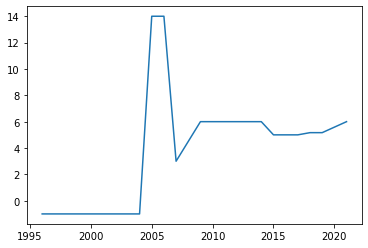

0    Sepang International Circuit
dtype: object


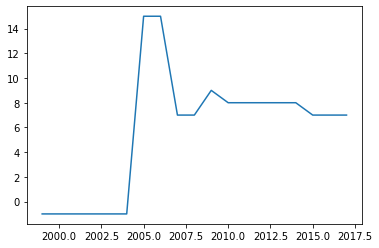

0    Bahrain International Circuit
dtype: object


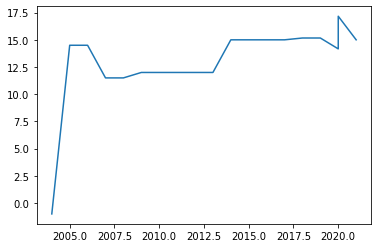

0    Circuit de Barcelona-Catalunya
dtype: object


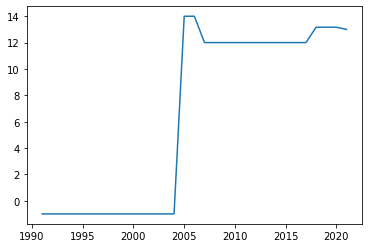

0    Circuit de Monaco
dtype: object


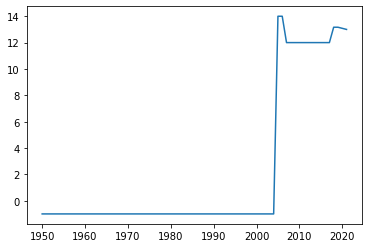

0    Circuit Gilles Villeneuve
dtype: object


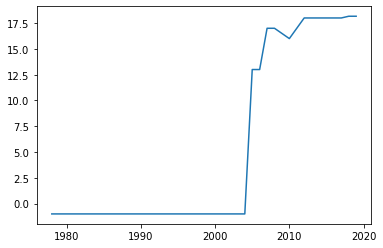

0    Circuit de Nevers Magny-Cours
dtype: object


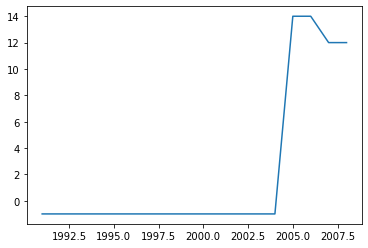

0    Silverstone Circuit
dtype: object


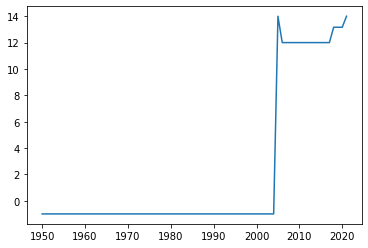

0    Hockenheimring
dtype: object


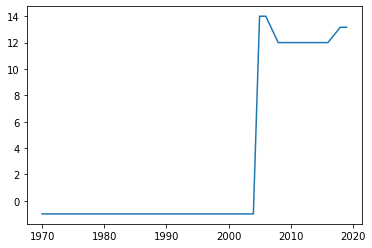

0    Hungaroring
dtype: object


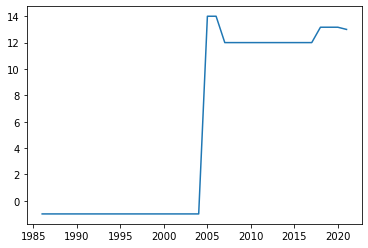

0    Circuit de Spa-Francorchamps
dtype: object


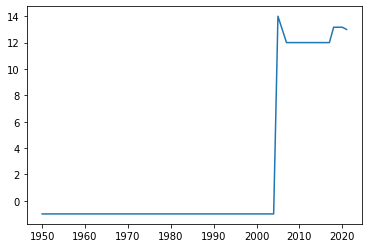

0    Autodromo Nazionale di Monza
dtype: object


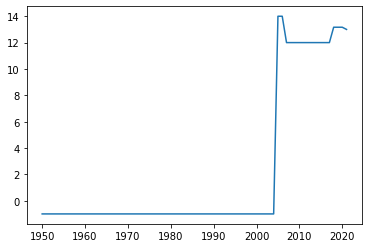

0    Shanghai International Circuit
dtype: object


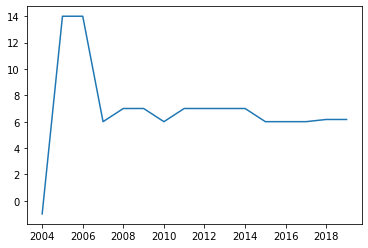

0    Autódromo José Carlos Pace
dtype: object


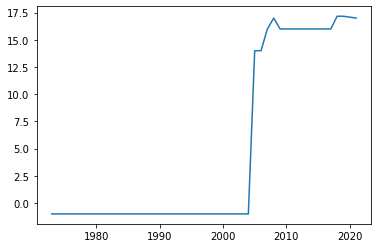

0    Indianapolis Motor Speedway
dtype: object


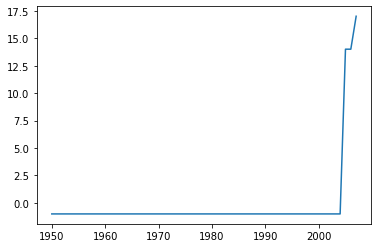

0    Nürburgring
dtype: object


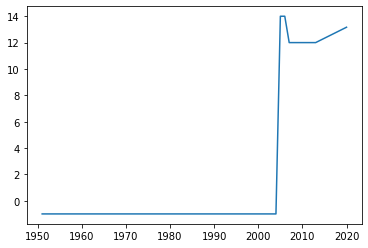

0    Autodromo Enzo e Dino Ferrari
dtype: object


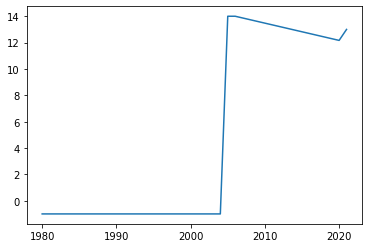

0    Suzuka Circuit
dtype: object


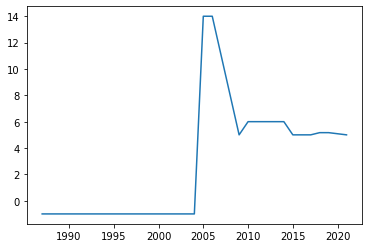

In [133]:
# Look at how these start times change over time. 
import matplotlib
import matplotlib.pyplot as plt

def make_graph(input_dataframe: pd.DataFrame,title: str, plot_count: int):
    plt.subplot(18, 1, plot_count)
    ax.plot(input_dataframe['year'], input_dataframe['time_value'])
    plt.title(title)

plot_total = len(morethan2_circuit_start_times)
plot_count = 1
plot_position = 1
#fig, ax = plt.subplots(figsize=(20,50))

for i in morethan2_circuit_start_times: 
    dataframe = racestart_year_circuit[racestart_year_circuit['circuitId']==i]
    dataframe = dataframe.sort_values(by=['year'])
    title = print(dataframe['circuit_name'].mode())
    plt.figure()
    plt.title(title)
    #plt.subplot(18, 1, plot_count)
    plt.plot(dataframe['year'], dataframe['time_value'])
    #plot_count+=1
    plt.show()

The graphs above show that those races with blank race times don't fall within a period where race times are known. Additionally, there seems to be a trend of all races in 2005 and 2006 starting around 2pm. This raises a few questions:
- Is there information we can scrape from the internet to fill in these gaps in race times? *Having done a search across a number of sites, this information doesn't seem to be available*
- Is the start time information for races in 2005/2006 accurate? *Having done a search across a number of sites, I can't find information listing the start times for these races, further more I can't find TV listing information to understand whether this is the time it was aired in the UK rather than race start time. However, when we look at the race start times for 2005/2006 (below) there does seem to be a trend for races starting around 2pm. Which, if I remember correctly, was usually the time they were aired live in the UK*
- Is there a way we can model the missing values, based on the data we have for all races? 
    - Features to include - longitude, latitude, altitude, time of race, circuit_name, race_name, location 
    - Feature engineering - UK time of race as a normalisation (need information on timezones based on location or long/lat).

In [134]:
racestart_year_circuit[(racestart_year_circuit['year'] == 2005) | (racestart_year_circuit['year'] == 2006)].sort_values(by='time_value')

year  circuitId                 race_name      time  time_value  \
49  2006          9        British Grand Prix  12:00:00        12.0   
50  2006          7       Canadian Grand Prix  13:00:00        13.0   
66  2005          7       Canadian Grand Prix  13:00:00        13.0   
63  2005          4        Spanish Grand Prix  14:00:00        14.0   
64  2005          6         Monaco Grand Prix  14:00:00        14.0   
65  2005         20       European Grand Prix  14:00:00        14.0   
67  2005         19  United States Grand Prix  14:00:00        14.0   
68  2005          8         French Grand Prix  14:00:00        14.0   
59  2005          1     Australian Grand Prix  14:00:00        14.0   
69  2005          9        British Grand Prix  14:00:00        14.0   
70  2005         10         German Grand Prix  14:00:00        14.0   
71  2005         11      Hungarian Grand Prix  14:00:00        14.0   
72  2005         14        Italian Grand Prix  14:00:00        14.0   
73  2005         13        Belgian Grand Prix  14:00:00        14.0   
74  2005         18      Brazilian Grand Prix  14:00:00        14.0   
62  2005         21     San Marino Grand Prix  14:00:00        14.0   
75  2005         22       Japanese Grand Prix  14:00:00        14.0   
76  2005         17        Chinese Grand Prix  14:00:00        14.0   
51  2006         19  United States Grand Prix  14:00:00        14.0   
44  2006          1     Australian Grand Prix  14:00:00        14.0   
57  2006         22       Japanese Grand Prix  14:00:00        14.0   
56  2006         17        Chinese Grand Prix  14:00:00        14.0   
55  2006         14        Italian Grand Prix  14:00:00        14.0   
54  2006         11      Hungarian Grand Prix  14:00:00        14.0   
53  2006         10         German Grand Prix  14:00:00        14.0   
52  2006          8         French Grand Prix  14:00:00        14.0   
58  2006         18      Brazilian Grand Prix  14:00:00        14.0   
48  2006          6         Monaco Grand Prix  14:00:00        14.0   
47  2006          4        Spanish Grand Prix  14:00:00        14.0   
46  2006         20       European Grand Prix  14:00:00        14.0   
45  2006         21     San Marino Grand Prix  14:00:00        14.0   
42  2006          3        Bahrain Grand Prix  14:30:00        14.5   
61  2005          3        Bahrain Grand Prix  14:30:00        14.5   
43  2006          2      Malaysian Grand Prix  15:00:00        15.0   
60  2005          2      Malaysian Grand Prix  15:00:00        15.0   

                      circuit_name  
49             Silverstone Circuit  
50       Circuit Gilles Villeneuve  
66       Circuit Gilles Villeneuve  
63  Circuit de Barcelona-Catalunya  
64               Circuit de Monaco  
65                     Nürburgring  
67     Indianapolis Motor Speedway  
68   Circuit de Nevers Magny-Cours  
59  Albert Park Grand Prix Circuit  
69             Silverstone Circuit  
70                  Hockenheimring  
71                     Hungaroring  
72    Autodromo Nazionale di Monza  
73    Circuit de Spa-Francorchamps  
74      Autódromo José Carlos Pace  
62   Autodromo Enzo e Dino Ferrari  
75                  Suzuka Circuit  
76  Shanghai International Circuit  
51     Indianapolis Motor Speedway  
44  Albert Park Grand Prix Circuit  
57                  Suzuka Circuit  
56  Shanghai International Circuit  
55    Autodromo Nazionale di Monza  
54                     Hungaroring  
53                  Hockenheimring  
52   Circuit de Nevers Magny-Cours  
58      Autódromo José Carlos Pace  
48               Circuit de Monaco  
47  Circuit de Barcelona-Catalunya  
46                     Nürburgring  
45   Autodromo Enzo e Dino Ferrari  
42   Bahrain International Circuit  
61   Bahrain International Circuit  
43    Sepang International Circuit  
60    Sepang International Circuit

In [135]:
races

raceId  year  round  circuitId                      name       date  \
0          1  2009      1          1     Australian Grand Prix 2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix 2009-04-05   
2          3  2009      3         17        Chinese Grand Prix 2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix 2009-04-26   
4          5  2009      5          4        Spanish Grand Prix 2009-05-10   
...      ...   ...    ...        ...                       ...        ...   
1053    1069  2021     18         69  United States Grand Prix 2021-10-24   
1054    1070  2021     19         32    Mexico City Grand Prix 2021-10-31   
1055    1071  2021     20         18      Brazilian Grand Prix 2021-11-07   
1056    1072  2021     22         77  Saudi Arabian Grand Prix 2021-12-05   
1057    1073  2021     23         24      Abu Dhabi Grand Prix 2021-12-12   

          time                                                url  time_value  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...         6.0  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...         9.0  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...         7.0  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...        12.0  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...        12.0  
...        ...                                                ...         ...  
1053  19:00:00  http://en.wikipedia.org/wiki/2021_United_State...        19.0  
1054  19:00:00  http://en.wikipedia.org/wiki/2021_Mexican_Gran...        19.0  
1055  17:00:00  http://en.wikipedia.org/wiki/2021_Brazilian_Gr...        17.0  
1056  16:00:00  http://en.wikipedia.org/wiki/2021_Saudi_Arabia...        16.0  
1057  13:00:00  http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...        13.0  

[1058 rows x 9 columns]

In [136]:
# Removing columns not required for modelling the missing start times. 
races_condensed = races.drop(['round', 'url'], axis='columns')
races_condensed.dtypes

raceId                 int64
year                   int64
circuitId              int64
name                  object
date          datetime64[ns]
time                  object
time_value           float64
dtype: object

In [137]:
# Merging with the circuit file to get greater information on the circuit location
races_circuits = pd.merge(races_condensed, circuits, on='circuitId', how='left')
races_circuits

raceId  year  circuitId                    name_x       date      time  \
0          1  2009          1     Australian Grand Prix 2009-03-29  06:00:00   
1          2  2009          2      Malaysian Grand Prix 2009-04-05  09:00:00   
2          3  2009         17        Chinese Grand Prix 2009-04-19  07:00:00   
3          4  2009          3        Bahrain Grand Prix 2009-04-26  12:00:00   
4          5  2009          4        Spanish Grand Prix 2009-05-10  12:00:00   
...      ...   ...        ...                       ...        ...       ...   
1053    1069  2021         69  United States Grand Prix 2021-10-24  19:00:00   
1054    1070  2021         32    Mexico City Grand Prix 2021-10-31  19:00:00   
1055    1071  2021         18      Brazilian Grand Prix 2021-11-07  17:00:00   
1056    1072  2021         77  Saudi Arabian Grand Prix 2021-12-05  16:00:00   
1057    1073  2021         24      Abu Dhabi Grand Prix 2021-12-12  13:00:00   

      time_value   circuitRef                          name_y      location  \
0            6.0  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1            9.0       sepang    Sepang International Circuit  Kuala Lumpur   
2            7.0     shanghai  Shanghai International Circuit      Shanghai   
3           12.0      bahrain   Bahrain International Circuit        Sakhir   
4           12.0    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
...          ...          ...                             ...           ...   
1053        19.0     americas         Circuit of the Americas        Austin   
1054        19.0    rodriguez    Autódromo Hermanos Rodríguez   Mexico City   
1055        17.0   interlagos      Autódromo José Carlos Pace     São Paulo   
1056        16.0       jeddah           Jeddah Street Circuit        Jeddah   
1057        13.0   yas_marina              Yas Marina Circuit     Abu Dhabi   

           country       lat        lng   alt  \
0        Australia -37.84970  144.96800    10   
1         Malaysia   2.76083  101.73800    18   
2            China  31.33890  121.22000     5   
3          Bahrain  26.03250   50.51060     7   
4            Spain  41.57000    2.26111   109   
...            ...       ...        ...   ...   
1053           USA  30.13280  -97.64110   161   
1054        Mexico  19.40420  -99.09070  2227   
1055        Brazil -23.70360  -46.69970   785   
1056  Saudi Arabia  21.54330   39.17280    15   
1057           UAE  24.46720   54.60310     3   

                                                    url  
0     http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1     http://en.wikipedia.org/wiki/Sepang_Internatio...  
2     http://en.wikipedia.org/wiki/Shanghai_Internat...  
3     http://en.wikipedia.org/wiki/Bahrain_Internati...  
4     http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
...                                                 ...  
1053  http://en.wikipedia.org/wiki/Circuit_of_the_Am...  
1054  http://en.wikipedia.org/wiki/Aut%C3%B3dromo_He...  
1055  http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...  
1056  http://en.wikipedia.org/wiki/Jeddah_Street_Cir...  
1057    http://en.wikipedia.org/wiki/Yas_Marina_Circuit  

[1058 rows x 15 columns]

In [138]:
# Renaming columns
races_circuits = races_circuits.rename(columns={"name_x":"race_name", "name_y":"circuit_name"})

# Removing unnecessary columns
races_circuits = races_circuits.drop(['url'], axis='columns')

races_circuits

raceId  year  circuitId                 race_name       date      time  \
0          1  2009          1     Australian Grand Prix 2009-03-29  06:00:00   
1          2  2009          2      Malaysian Grand Prix 2009-04-05  09:00:00   
2          3  2009         17        Chinese Grand Prix 2009-04-19  07:00:00   
3          4  2009          3        Bahrain Grand Prix 2009-04-26  12:00:00   
4          5  2009          4        Spanish Grand Prix 2009-05-10  12:00:00   
...      ...   ...        ...                       ...        ...       ...   
1053    1069  2021         69  United States Grand Prix 2021-10-24  19:00:00   
1054    1070  2021         32    Mexico City Grand Prix 2021-10-31  19:00:00   
1055    1071  2021         18      Brazilian Grand Prix 2021-11-07  17:00:00   
1056    1072  2021         77  Saudi Arabian Grand Prix 2021-12-05  16:00:00   
1057    1073  2021         24      Abu Dhabi Grand Prix 2021-12-12  13:00:00   

      time_value   circuitRef                    circuit_name      location  \
0            6.0  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1            9.0       sepang    Sepang International Circuit  Kuala Lumpur   
2            7.0     shanghai  Shanghai International Circuit      Shanghai   
3           12.0      bahrain   Bahrain International Circuit        Sakhir   
4           12.0    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
...          ...          ...                             ...           ...   
1053        19.0     americas         Circuit of the Americas        Austin   
1054        19.0    rodriguez    Autódromo Hermanos Rodríguez   Mexico City   
1055        17.0   interlagos      Autódromo José Carlos Pace     São Paulo   
1056        16.0       jeddah           Jeddah Street Circuit        Jeddah   
1057        13.0   yas_marina              Yas Marina Circuit     Abu Dhabi   

           country       lat        lng   alt  
0        Australia -37.84970  144.96800    10  
1         Malaysia   2.76083  101.73800    18  
2            China  31.33890  121.22000     5  
3          Bahrain  26.03250   50.51060     7  
4            Spain  41.57000    2.26111   109  
...            ...       ...        ...   ...  
1053           USA  30.13280  -97.64110   161  
1054        Mexico  19.40420  -99.09070  2227  
1055        Brazil -23.70360  -46.69970   785  
1056  Saudi Arabia  21.54330   39.17280    15  
1057           UAE  24.46720   54.60310     3  

[1058 rows x 14 columns]

In [139]:
completeness(races_circuits)

Data Types:
raceId                   int64
year                     int64
circuitId                int64
race_name               object
date            datetime64[ns]
time                    object
time_value             float64
circuitRef              object
circuit_name            object
location                object
country                 object
lat                    float64
lng                    float64
alt                      int64
dtype: object

Number of values that are listed as NA
raceId            0
year              0
circuitId         0
race_name         0
date              0
time            731
time_value      731
circuitRef        0
circuit_name      0
location          0
country           0
lat               0
lng               0
alt               0
dtype: int64

Number of values that are lised as \N
raceId          0
year            0
circuitId       0
race_name       0
date            0
time            0
time_value      0
circuitRef      0
circuit_name    0
locati

It would be useful to look at timezomes, and see if this has an implication into the race start times. 

[This website](https://www.timeanddate.com/worldclock/full.html) has information on the 'current local times around the world' so it may be a good place to start with regards to looking at the timezones. 

We'll have to use a scraper to get this information, [this course](https://learn.datacamp.com/courses/web-scraping-with-python) takes you through the basics of web scraping in python.  

In [140]:
# Downloading information from the world clock website
import requests
page = requests.get("https://www.timeanddate.com/worldclock/full.html")
page.status_code

200

In [141]:
page.content

b'<!DOCTYPE html><!--\nscripts and programs that download content transparent to the user are not allowed without permission\n--><html lang=en><head><meta http-equiv=Content-Type content="text/html; charset=utf-8"><title>The World Clock (extended version)</title><meta name=description content="Current local time in an extensive selection of cities and countries worldwide, in all time zones with DST accounted for. Links to each city with extensive info on time, weather forecast, Daylight Saving Time changes, sunrise, sunset and moon times and phases. "><meta property="og:image" content="https://www.timeanddate.com/scripts/worldclock_og.php?h1=World%20Clock&amp;h2=Local%20Time%20Around%20the%20World"><meta property="og:image:width" content=1200><meta property="og:image:height" content=630><meta property="og:type" content=website><style>\n@font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v7") format("woff2"),url("/common/fonts/iconfont.woff?v7") format("woff"),url("/co

In [142]:
# Parsing the page information with BeautifulSoup

from bs4 import BeautifulSoup

worldclock = BeautifulSoup(page.content, 'html.parser')

In [143]:
# Printing a slightly easier to view html code
print(worldclock.prettify())

<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
-->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   The World Clock (extended version)
  </title>
  <meta content="Current local time in an extensive selection of cities and countries worldwide, in all time zones with DST accounted for. Links to each city with extensive info on time, weather forecast, Daylight Saving Time changes, sunrise, sunset and moon times and phases. " name="description"/>
  <meta content="https://www.timeanddate.com/scripts/worldclock_og.php?h1=World%20Clock&amp;h2=Local%20Time%20Around%20the%20World" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="website" property="og:type"/>
  <style>
   @font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v7") format("woff2"),url("/comm

From the above, we can see that the html code is formatted in a specific format for each city:
```
<td>
    <a href="/worldclock/australia/melbourne">
     Melbourne
    </a>
    <span class="wds" id="p205s">
    </span>
</td>
<td class="rbi" id="p205">
 Mon 20:46
</td>
```
We can also see that the information is held within the 'table' tags (i.e. <table> and </table>). So we can now use BeautifulSoup to select items within this html code.

In [144]:
# Getting the text from the first value ([0]) from the list created when we select all the <a></a> tagged items within the <table></table>  
worldclock.select("table a")[0].get_text()

'Abidjan'

In [145]:
# Getting the text from the first value ([0]) from the list created when we find all items with a class of 'rbi'
worldclock.find_all(class_='rbi')[0].get_text()


'Mon 09:56'

In [146]:
# Creating a loop to iterate across this html script to pull out all place names
place_names = []

a_list = worldclock.select('table a')

x = 0
for i in a_list: # for each of the files names in the 'file_names' list we created above    
    place_names.append(worldclock.select('table a')[x].get_text())
    x = x+1

place_names


['Abidjan',
 'Denver',
 'Lima',
 'Punta Arenas',
 'Abu Dhabi',
 'Detroit',
 'Lisbon',
 'Pyongyang',
 'Abuja',
 'Dhaka',
 'Ljubljana',
 'Qaanaaq',
 'Accra',
 'Diego Garcia',
 'Lomé',
 'Quito',
 'Adak',
 'Dili',
 'London',
 'Rabat',
 'Adamstown',
 'Djibouti',
 'Longyearbyen',
 'Rarotonga',
 'Addis Ababa',
 'Dnipro',
 'Los Angeles',
 'Regina',
 'Adelaide',
 'Dodoma',
 'Luanda',
 'Resolute Bay',
 'Alert',
 'Doha',
 'Lubumbashi',
 'Reykjavik',
 'Algiers',
 'Douglas',
 'Lusaka',
 'Riga',
 'Alice Springs',
 'Dubai',
 'Luxembourg',
 'Rio Branco',
 'Almaty',
 'Dublin',
 'Madrid',
 'Rio de Janeiro',
 'Alofi',
 'Dushanbe',
 'Magadan',
 'Riyadh',
 'Amman',
 'Easter Island',
 'Majuro',
 'Rome',
 'Amsterdam',
 'Edinburgh',
 'Makassar',
 'Rovaniemi',
 'Amsterdam Island',
 'Edmonton',
 'Malabo',
 'Saint-Denis',
 'Anadyr',
 'El Aaiún',
 'Male',
 'Salt Lake City',
 'Anchorage',
 'Eucla',
 'Managua',
 'Samara',
 'Ankara',
 'Eureka',
 'Manama',
 'San Francisco',
 'Antananarivo',
 'Fairbanks',
 'Manaus',
 

In [147]:
# Creating a loop to iterate across this html script to pull out all times
times = []

time_list = worldclock.find_all(class_='rbi')

x = 0
for i in time_list: # for each of the files names in the 'file_names' list we created above    
    times.append(worldclock.find_all(class_="rbi")[x].get_text())
    x = x+1

times

['Mon 09:56',
 'Mon 03:56',
 'Mon 04:56',
 'Mon 06:56',
 'Mon 13:56',
 'Mon 05:56',
 'Mon 10:56',
 'Mon 18:56',
 'Mon 10:56',
 'Mon 15:56',
 'Mon 11:56',
 'Mon 07:56',
 'Mon 09:56',
 'Mon 15:56',
 'Mon 09:56',
 'Mon 04:56',
 'Mon 00:56',
 'Mon 18:56',
 'Mon 10:56',
 'Mon 10:56',
 'Mon 01:56',
 'Mon 12:56',
 'Mon 11:56',
 'Sun 23:56',
 'Mon 12:56',
 'Mon 12:56',
 'Mon 02:56',
 'Mon 03:56',
 'Mon 19:26',
 'Mon 12:56',
 'Mon 10:56',
 'Mon 04:56',
 'Mon 05:56',
 'Mon 12:56',
 'Mon 11:56',
 'Mon 09:56',
 'Mon 10:56',
 'Mon 10:56',
 'Mon 11:56',
 'Mon 12:56',
 'Mon 19:26',
 'Mon 13:56',
 'Mon 11:56',
 'Mon 04:56',
 'Mon 15:56',
 'Mon 10:56',
 'Mon 11:56',
 'Mon 06:56',
 'Sun 22:56',
 'Mon 14:56',
 'Mon 20:56',
 'Mon 12:56',
 'Mon 12:56',
 'Mon 03:56',
 'Mon 21:56',
 'Mon 11:56',
 'Mon 11:56',
 'Mon 10:56',
 'Mon 17:56',
 'Mon 12:56',
 'Mon 14:56',
 'Mon 03:56',
 'Mon 10:56',
 'Mon 13:56',
 'Mon 21:56',
 'Mon 10:56',
 'Mon 14:56',
 'Mon 03:56',
 'Mon 01:56',
 'Mon 18:41',
 'Mon 03:56',
 'Mon 

In [148]:
# Combining this information into a dataframe to use later. 
world_times = {'Location':place_names, 'Time':times}
world_times_df = pd.DataFrame(world_times)
world_times_df

Location       Time
0         Abidjan  Mon 09:56
1          Denver  Mon 03:56
2            Lima  Mon 04:56
3    Punta Arenas  Mon 06:56
4       Abu Dhabi  Mon 13:56
..            ...        ...
351        Zagreb  Mon 11:56
352      Denpasar  Mon 17:56
353      Lilongwe  Mon 11:56
354      Pretoria  Mon 11:56
355        Zürich  Mon 11:56

[356 rows x 2 columns]

In [149]:
world_times_df[world_times_df['Location']=='London']

Location       Time
18   London  Mon 10:56

In [150]:
world_times_df[['Day', 'Time']] = world_times_df['Time'].str.split(' ', expand=True)

In [151]:
world_times_df['Time_value'] = pd.DatetimeIndex(world_times_df['Time']).hour + ((pd.DatetimeIndex(world_times_df['Time']).minute / 60))
world_times_df

Location   Time  Day  Time_value
0         Abidjan  09:56  Mon    9.933333
1          Denver  03:56  Mon    3.933333
2            Lima  04:56  Mon    4.933333
3    Punta Arenas  06:56  Mon    6.933333
4       Abu Dhabi  13:56  Mon   13.933333
..            ...    ...  ...         ...
351        Zagreb  11:56  Mon   11.933333
352      Denpasar  17:56  Mon   17.933333
353      Lilongwe  11:56  Mon   11.933333
354      Pretoria  11:56  Mon   11.933333
355        Zürich  11:56  Mon   11.933333

[356 rows x 4 columns]

In [152]:
import calendar

# Getting the list of calendar days in the three day abbreviated format to match our world_times_df
Weekdays = list(calendar.day_abbr)

# Creating a dataframe with days of the week and their associated number.
Calendar = {'Day':Weekdays, 'WeekDayNumber':[1,2,3,4,5,6,7]}
Calendar_df = pd.DataFrame(Calendar)
Calendar_df

Day  WeekDayNumber
0  Mon              1
1  Tue              2
2  Wed              3
3  Thu              4
4  Fri              5
5  Sat              6
6  Sun              7

In [153]:
# Merging the week day numbers into our world_times_df
world_times_df = pd.merge(world_times_df, Calendar_df, on='Day', how='left')
world_times_df.sort_values(by='WeekDayNumber')

Location   Time  Day  Time_value  WeekDayNumber
0         Abidjan  09:56  Mon    9.933333              1
241         Kabul  14:26  Mon   14.433333              1
240     Bujumbura  11:56  Mon   11.933333              1
239         Tunis  10:56  Mon   10.933333              1
238          Omsk  15:56  Mon   15.933333              1
..            ...    ...  ...         ...            ...
48          Alofi  22:56  Sun   22.933333              7
112  Baker Island  21:56  Sun   21.933333              7
122        Midway  22:56  Sun   22.933333              7
23      Rarotonga  23:56  Sun   23.933333              7
177      Honolulu  23:56  Sun   23.933333              7

[356 rows x 5 columns]

In [154]:
# Getting time zone information for London 
London = world_times_df[world_times_df['Location']=='London']

# Returning the 1st row and 5th column (i.e. WeekDayNumber)
day_of_week = London.iat[0,4]

# Returning the 1st row and 5th column (i.e. Time_value)
time_of_day = London.iat[0,3]

print('Day of Week:', day_of_week)
print('Time of Day:', time_of_day)

Day of Week: 1
Time of Day: 10.933333333333334


We now need to generate the logic to calculate the time difference. We have three main scenarios to cover ... 

1. The day of the week for London is **a day later** than the city of interest
2. The day of the week for London is **the same** as the city of interest
3. The day of the week for London is **a day earlier** than the city of interest

These scenarios will determine how the calculation is performed:

| Scenario | Calculation | London | City of Interest | Time Difference | Time Diff Calc |
| --- | --- | --- | --- | --- | --- |
| Later; WeekDayNumber < day_of_week | (Time_value - 24) - time_of_day | Fri 10:30 | Thu 23:30 | City 11 hours behind London | (23.5 - 24) - 10.5 = -11 |
| Same; WeekDayNumber = day_of_week | Time_value - time_of_day | Fri 10:30 | Fri 23:30 | City 13 hours ahead of London | 23.5 - 10.5 = 13 |
| Same;WeekDayNumber = day_of_week | Time_value - time_of_day | Fri 10:30 | Fri 09:30 | City 1 hour behind London | 9.5 - 10.5 = -1 |
| Earlier; WeekDayNumber > day_of_week | (24 - time_of_day) + Time_value | Fri 23:30 | Sat 10:30 | City 11 hours ahead of London | (24 - 23.5) + 10.5 = 11 |

***Time_value:*** *time value for city of interest*; ***time_of_day:*** *time value for London*

In [155]:
def time_zone_shift(row):
    if row['WeekDayNumber'] < day_of_week:
        time_zone = (row['Time_value'] - 24) - time_of_day
    elif row['WeekDayNumber'] == day_of_week:
        time_zone = row['Time_value'] - time_of_day
    else:
        time_zone = (24 - time_of_day) + row['Time_value']
    return time_zone

In [156]:
world_times_df['TimeZone'] = world_times_df.apply(time_zone_shift, axis=1)
world_times_df.sort_values(by='TimeZone')

Location   Time  Day  Time_value  WeekDayNumber  TimeZone
16        Adak  00:56  Mon    0.933333              1     -10.0
237     Juneau  01:56  Mon    1.933333              1      -9.0
247   Unalaska  01:56  Mon    1.933333              1      -9.0
68   Anchorage  01:56  Mon    1.933333              1      -9.0
77   Fairbanks  01:56  Mon    1.933333              1      -9.0
..         ...    ...  ...         ...            ...       ...
122     Midway  22:56  Sun   22.933333              7      36.0
48       Alofi  22:56  Sun   22.933333              7      36.0
266    Papeete  23:56  Sun   23.933333              7      37.0
23   Rarotonga  23:56  Sun   23.933333              7      37.0
177   Honolulu  23:56  Sun   23.933333              7      37.0

[356 rows x 6 columns]

In [157]:
wt_condensed = world_times_df.drop(['Time', 'Day', 'Time_value', 'WeekDayNumber'], axis=1)
wt_condensed

Location  TimeZone
0         Abidjan      -1.0
1          Denver      -7.0
2            Lima      -6.0
3    Punta Arenas      -4.0
4       Abu Dhabi       3.0
..            ...       ...
351        Zagreb       1.0
352      Denpasar       7.0
353      Lilongwe       1.0
354      Pretoria       1.0
355        Zürich       1.0

[356 rows x 2 columns]

We'll now merge these timezones into the 'races_circuits' table based on the location.

In [158]:
races_circuits.groupby('country').count()

raceId  year  circuitId  race_name  date  time  time_value  \
country                                                                    
Argentina         20    20         20         20    20     0           0   
Australia         36    36         36         36    36    16          16   
Austria           36    36         36         36    36    10          10   
Azerbaijan         5     5          5          5     5     5           5   
Bahrain           18    18         18         18    18    17          17   
Belgium           66    66         66         66    66    16          16   
Brazil            48    48         48         48    48    16          16   
Canada            50    50         50         50    50    14          14   
China             16    16         16         16    16    15          15   
France            62    62         62         62    62     7           7   
Germany           79    79         79         79    79    16          16   
Hungary           36    36         36         36    36    17          17   
India              3     3          3          3     3     3           3   
Italy            102   102        102        102   102    22          22   
Japan             38    38         38         38    38    16          16   
Korea              4     4          4          4     4     4           4   
Malaysia          19    19         19         19    19    13          13   
Mexico            21    21         21         21    21     6           6   
Monaco            67    67         67         67    67    16          16   
Morocco            1     1          1          1     1     0           0   
Netherlands       31    31         31         31    31     1           1   
Portugal          18    18         18         18    18     2           2   
Russia             8     8          8          8     8     8           8   
Saudi Arabia       1     1          1          1     1     1           1   
Singapore         13    13         13         13    13    13          13   
South Africa      23    23         23         23    23     0           0   
Spain             58    58         58         58    58    22          22   
Sweden             6     6          6          6     6     0           0   
Switzerland        5     5          5          5     5     0           0   
Turkey             8     8          8          8     8     8           8   
UAE               13    13         13         13    13    13          13   
UK                76    76         76         76    76    18          18   
USA               71    71         71         71    71    12          12   

              circuitRef  circuit_name  location  lat  lng  alt  
country                                                          
Argentina             20            20        20   20   20   20  
Australia             36            36        36   36   36   36  
Austria               36            36        36   36   36   36  
Azerbaijan             5             5         5    5    5    5  
Bahrain               18            18        18   18   18   18  
Belgium               66            66        66   66   66   66  
Brazil                48            48        48   48   48   48  
Canada                50            50        50   50   50   50  
China                 16            16        16   16   16   16  
France                62            62        62   62   62   62  
Germany               79            79        79   79   79   79  
Hungary               36            36        36   36   36   36  
India                  3             3         3    3    3    3  
Italy                102           102       102  102  102  102  
Japan                 38            38        38   38   38   38  
Korea                  4             4         4    4    4    4  
Malaysia              19            19        19   19   19   19  
Mexico                21            21        21   21   21   21  
Monaco                67         

In [159]:
races_circuits_test = races_circuits.merge(wt_condensed, how='left', left_on='location', right_on='Location')
races_circuits_test[pd.isnull(races_circuits_test['Location'])].groupby('location').count()

raceId  year  circuitId  race_name  date  time  \
location                                                                
Anderstorp                  6     6          6          6     6     0   
Austin                      9     9          9          9     9     9   
California                  9     9          9          9     9     0   
Castle Donington            1     1          1          1     1     0   
Clermont-Ferrand            4     4          4          4     4     0   
Dijon                       6     6          6          6     6     0   
Eastern Cape Province       3     3          3          3     3     0   
Estoril                    13    13         13         13    13     0   
Florida                     1     1          1          1     1     0   
Heusden-Zolder             10    10         10         10    10     0   
Hockenheim                 37    37         37         37    37     9   
Imola                      29    29         29         29    29     4   
Jeddah                      1     1          1          1     1     1   
Jerez de la Frontera        7     7          7          7     7     0   
Kent                       14    14         14         14    14     0   
Le Castellet               17    17         17         17    17     3   
Le Mans                     1     1          1          1     1     0   
Liverpool                   5     5          5          5     5     0   
Magny Cours                18    18         18         18    18     4   
Marina Bay                 13    13         13         13    13    13   
Midrand                    20    20         20         20    20     0   
Monte-Carlo                67    67         67         67    67    16   
Montmeló                   31    31         31         31    31    17   
Montreal                   40    40         40         40    40    14   
Monza                      71    71         71         71    71    17   
Mugello                     1     1          1          1     1     1   
Nevada                      2     2          2          2     2     0   
New York State             20    20         20         20    20     0   
Nürburg                    41    41         41         41    41     7   
Okayama                     2     2          2          2     2     0   
Ontario                     8     8          8          8     8     0   
Oporto                      2     2          2          2     2     0   
Oyama                       4     4          4          4     4     2   
Pescara                     1     1          1          1     1     0   
Portimão                    2     2          2          2     2     2   
Quebec                      2     2          2          2     2     0   
Reims                      11    11         11         11    11     0   
Rouen                       5     5          5          5     5     0   
Sakhir                     18    18         18         18    18    17   
Silverstone                56    56         56         56    56    18   
Sochi                       8     8          8          8     8     8   
Spa                        54    54         54         54    54    16   
Spielburg                  35    35         35         35    35    10   
Styria                      1     1          1          1     1     0   
Suzuka                     32    32         32         32    32    14   
Uttar Pradesh               3     3          3          3     3     3   
Valencia                    5     5          5          5     5     5   
Yeongam County              4     4          4          4     4     4   
Zandvoort                  31    31         31         31    31     1   

                       time_value  circuitRef  circuit_name  country  lat  \
location                                                                    
Anderstorp                      0           6             6        6    6   
Austin                          9           9             9        9

In [168]:
import requests

r = requests.get('http://api.timezonedb.com/v2.1/list-time-zone?key=S6EUWX1KVESE&format=json')
r_dict = r.json()
r_df = pd.DataFrame.from_dict(r_dict)
r_df

status message                                              zones
0       OK          {'countryCode': 'AD', 'countryName': 'Andorra'...
1       OK          {'countryCode': 'AE', 'countryName': 'United A...
2       OK          {'countryCode': 'AF', 'countryName': 'Afghanis...
3       OK          {'countryCode': 'AG', 'countryName': 'Antigua ...
4       OK          {'countryCode': 'AI', 'countryName': 'Anguilla...
..     ...     ...                                                ...
419     OK          {'countryCode': 'YE', 'countryName': 'Yemen', ...
420     OK          {'countryCode': 'YT', 'countryName': 'Mayotte'...
421     OK          {'countryCode': 'ZA', 'countryName': 'South Af...
422     OK          {'countryCode': 'ZM', 'countryName': 'Zambia',...
423     OK          {'countryCode': 'ZW', 'countryName': 'Zimbabwe...

[424 rows x 3 columns]

In [170]:
r_zones = r_df['zones']
r_expanded_df = pd.json_normalize(r_zones)
r_expanded_df


countryCode           countryName             zoneName  gmtOffset  \
0            AD               Andorra       Europe/Andorra       7200   
1            AE  United Arab Emirates           Asia/Dubai      14400   
2            AF           Afghanistan           Asia/Kabul      16200   
3            AG   Antigua and Barbuda      America/Antigua     -14400   
4            AI              Anguilla     America/Anguilla     -14400   
..          ...                   ...                  ...        ...   
419          YE                 Yemen            Asia/Aden      10800   
420          YT               Mayotte       Indian/Mayotte      10800   
421          ZA          South Africa  Africa/Johannesburg       7200   
422          ZM                Zambia        Africa/Lusaka       7200   
423          ZW              Zimbabwe        Africa/Harare       7200   

      timestamp  
0    1627300960  
1    1627308160  
2    1627309960  
3    1627279360  
4    1627279360  
..          ...  
419  1627304560  
420  1627304560  
421  1627300960  
422  1627300960  
423  1627300960  

[424 rows x 5 columns]

In [176]:
countries = pd.Series(races_circuits.country.unique())
countries

0        Australia
1         Malaysia
2            China
3          Bahrain
4            Spain
5           Monaco
6           Turkey
7               UK
8          Germany
9          Hungary
10         Belgium
11           Italy
12       Singapore
13           Japan
14          Brazil
15             UAE
16          Canada
17          France
18             USA
19         Austria
20       Argentina
21        Portugal
22    South Africa
23          Mexico
24           Korea
25     Netherlands
26          Sweden
27         Morocco
28     Switzerland
29           India
30          Russia
31      Azerbaijan
32    Saudi Arabia
dtype: object

In [180]:
tz_countries = pd.Series(r_expanded_df.countryName.unique())
countries[~countries.isin(tz_countries)]

7        UK
15      UAE
18      USA
24    Korea
dtype: object

In [189]:
r_expanded_df[r_expanded_df['countryName']=='South Korea']

countryCode  countryName    zoneName  gmtOffset   timestamp
211          KR  South Korea  Asia/Seoul      32400  1627326160

In [193]:
races_circuits[races_circuits['country']=='Korea']

raceId  year  circuitId          race_name       date      time  \
352     353  2010         35  Korean Grand Prix 2010-10-24  05:00:00   
854     856  2011         35  Korean Grand Prix 2011-10-16  06:00:00   
873     875  2012         35  Korean Grand Prix 2012-10-14  06:00:00   
891     894  2013         35  Korean Grand Prix 2013-10-06  06:00:00   

     time_value circuitRef                  circuit_name        location  \
352         5.0    yeongam  Korean International Circuit  Yeongam County   
854         6.0    yeongam  Korean International Circuit  Yeongam County   
873         6.0    yeongam  Korean International Circuit  Yeongam County   
891         6.0    yeongam  Korean International Circuit  Yeongam County   

    country      lat      lng  alt updated_country  
352   Korea  34.7333  126.417    0           Korea  
854   Korea  34.7333  126.417    0           Korea  
873   Korea  34.7333  126.417    0           Korea  
891   Korea  34.7333  126.417    0           Korea

In [202]:
races_circuits['updated_country'] = races_circuits['country']
races_circuits['updated_country'] = races_circuits['updated_country'].replace('UK', 'United Kingdom')
races_circuits['updated_country'] = races_circuits['updated_country'].replace('UAE', 'United Arab Emirates')
races_circuits['updated_country'] = races_circuits['updated_country'].replace('Korea', 'South Korea')

In [196]:
races_circuits[races_circuits['country']=='USA'].location.unique()

array(['Indianapolis', 'Phoenix', 'Detroit', 'Dallas', 'California',
       'Nevada', 'New York State', 'Florida', 'Austin'], dtype=object)

- Indianapolis = Eastern Time Zone
- Phoenix = Mountain Time Zone
- Detroit = Eastern Time Zone
- Dallas = Central Time Zone
- California = Pacific Time Zone
- Nevada = Pacific Time Zone
- New York State = Eastern Time Zone
- Florida = Eastern Time Zone
- Austin = Central Time Zone

Using the r_expanded_df list of US zoneNames below, we can use the following zones to cover the locations we have in the USA. 

Eastern = America/Detroit

Central = America/Chicago

Mountain = America/Phoenix

Pacific = America/Los_Angeles


In [201]:
r_expanded_df[r_expanded_df['countryName']=='United States']

countryCode    countryName                        zoneName  gmtOffset  \
378          US  United States                    America/Adak     -32400   
379          US  United States               America/Anchorage     -28800   
380          US  United States                   America/Boise     -21600   
381          US  United States                 America/Chicago     -18000   
382          US  United States                  America/Denver     -21600   
383          US  United States                 America/Detroit     -14400   
384          US  United States    America/Indiana/Indianapolis     -14400   
385          US  United States            America/Indiana/Knox     -18000   
386          US  United States         America/Indiana/Marengo     -14400   
387          US  United States      America/Indiana/Petersburg     -14400   
388          US  United States       America/Indiana/Tell_City     -18000   
389          US  United States           America/Indiana/Vevay     -14400   
390          US  United States       America/Indiana/Vincennes     -14400   
391          US  United States         America/Indiana/Winamac     -14400   
392          US  United States                  America/Juneau     -28800   
393          US  United States     America/Kentucky/Louisville     -14400   
394          US  United States     America/Kentucky/Monticello     -14400   
395          US  United States             America/Los_Angeles     -25200   
396          US  United States               America/Menominee     -18000   
397          US  United States              America/Metlakatla     -28800   
398          US  United States                America/New_York     -14400   
399          US  United States                    America/Nome     -28800   
400          US  United States     America/North_Dakota/Beulah     -18000   
401          US  United States     America/North_Dakota/Center     -18000   
402          US  United States  America/North_Dakota/New_Salem     -18000   
403          US  United States                 America/Phoenix     -25200   
404          US  United States                   America/Sitka     -28800   
405          US  United States                 America/Yakutat     -28800   
406          US  United States                Pacific/Honolulu     -36000   

      timestamp  
378  1627261360  
379  1627264960  
380  1627272160  
381  1627275760  
382  1627272160  
383  1627279360  
384  1627279360  
385  1627275760  
386  1627279360  
387  1627279360  
388  1627275760  
389  1627279360  
390  1627279360  
391  1627279360  
392  1627264960  
393  1627279360  
394  1627279360  
395  1627268560  
396  1627275760  
397  1627264960  
398  1627279360  
399  1627264960  
400  1627275760  
401  1627275760  
402  1627275760  
403  1627268560  
404  1627264960  
405  1627264960  
406  1627257760

In [204]:
races_circuits[races_circuits['country']=='USA']

raceId  year  circuitId                 race_name       date      time  \
41        42  2007         19  United States Grand Prix 2007-06-17  17:00:00   
61        62  2006         19  United States Grand Prix 2006-07-02  14:00:00   
78        79  2005         19  United States Grand Prix 2005-06-19  14:00:00   
97        98  2004         19  United States Grand Prix 2004-06-20       NaN   
121      122  2003         19  United States Grand Prix 2003-09-28       NaN   
...      ...   ...        ...                       ...        ...       ...   
952      965  2016         69  United States Grand Prix 2016-10-23  19:00:00   
972      985  2017         69  United States Grand Prix 2017-10-22  19:00:00   
993     1006  2018         69  United States Grand Prix 2018-10-21  18:10:00   
1015    1028  2019         69  United States Grand Prix 2019-11-03  19:10:00   
1053    1069  2021         69  United States Grand Prix 2021-10-24  19:00:00   

      time_value    circuitRef                 circuit_name      location  \
41     17.000000  indianapolis  Indianapolis Motor Speedway  Indianapolis   
61     14.000000  indianapolis  Indianapolis Motor Speedway  Indianapolis   
78     14.000000  indianapolis  Indianapolis Motor Speedway  Indianapolis   
97           NaN  indianapolis  Indianapolis Motor Speedway  Indianapolis   
121          NaN  indianapolis  Indianapolis Motor Speedway  Indianapolis   
...          ...           ...                          ...           ...   
952    19.000000      americas      Circuit of the Americas        Austin   
972    19.000000      americas      Circuit of the Americas        Austin   
993    18.166667      americas      Circuit of the Americas        Austin   
1015   19.166667      americas      Circuit of the Americas        Austin   
1053   19.000000      americas      Circuit of the Americas        Austin   

     country      lat      lng  alt updated_country  
41       USA  39.7950 -86.2347  223             USA  
61       USA  39.7950 -86.2347  223             USA  
78       USA  39.7950 -86.2347  223             USA  
97       USA  39.7950 -86.2347  223             USA  
121      USA  39.7950 -86.2347  223             USA  
...      ...      ...      ...  ...             ...  
952      USA  30.1328 -97.6411  161             USA  
972      USA  30.1328 -97.6411  161             USA  
993      USA  30.1328 -97.6411  161             USA  
1015     USA  30.1328 -97.6411  161             USA  
1053     USA  30.1328 -97.6411  161             USA  

[71 rows x 15 columns]

In [207]:
ustz = {'location': ['Indianapolis', 'Phoenix', 'Detroit', 'Dallas','California','Nevada','New York State','Florida', 'Austin'], 'TimeZone': ['EST', 'MST', 'EST', 'CT', 'PT', 'PT', 'EST', 'EST', 'CT']}
ustz_df = pd.DataFrame(data=ustz)
ustz_df

location TimeZone
0    Indianapolis      EST
1         Phoenix      MST
2         Detroit      EST
3          Dallas       CT
4      California       PT
5          Nevada       PT
6  New York State      EST
7         Florida      EST
8          Austin       CT

# Current Issue:
- World clock data doesn't cover all cities required. Perhaps need to look at countries/long/lat.

Start gathering more information? 
- look at getting weather reports for the date/location of each race?? 
- add in comparative aggregations 
    - lap time vs fastest qualifying time for that driver, lap time vs fastest qualifying time for that circuit that year?? Does that give us anything as conditions may be very different. 
    - fastest lap time that race vs current lap time ...??? driver vs all drivers
- Look at if it's an overtake lap? i.e. did the driver move up/down in position between laps?? 
- Groupings for round ... quarters? look to see if there is a difference between Q1 and Q4 with regards to improved pace etc. 
- Find lap distance to look at pace rather than lap time? -- webscrape from circuit_url? ... look to see what other information we could get from these?
    - number of turns
    - FIA grading of circuit
    - coordinates
    - extend to other available urls:
        - Race: Course length
        - Race: Distance	
        - Race: Weather
        - Driver information?? 
        
Start looking into completeness and profiles of the data
- driver age at time of race? 